In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import sklearn.preprocessing
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("hcc_dataset.csv")

**DATA PREPROCESSING**

Analisar a percentagem de missing values, representado por "?", de cada atributo.

Gender             0.000000
Symptoms          10.909091
Alcohol            0.000000
HBsAg             10.303030
HBeAg             23.636364
HBcAb             14.545455
HCVAb              5.454545
Cirrhosis          0.000000
Endemic           23.636364
Smoking           24.848485
Diabetes           1.818182
Obesity            6.060606
Hemochro          13.939394
AHT                1.818182
CRI                1.212121
HIV                8.484848
NASH              13.333333
Varices           31.515152
Spleno             9.090909
PHT                6.666667
PVT                1.818182
Metastasis         2.424242
Hallmark           1.212121
Age                0.000000
Grams_day         29.090909
Packs_year        32.121212
PS                 0.000000
Encephalopathy     0.606061
Ascites            1.212121
INR                2.424242
AFP                4.848485
Hemoglobin         1.818182
MCV                1.818182
Leucocytes         1.818182
Platelets          1.818182
 Albumin           3

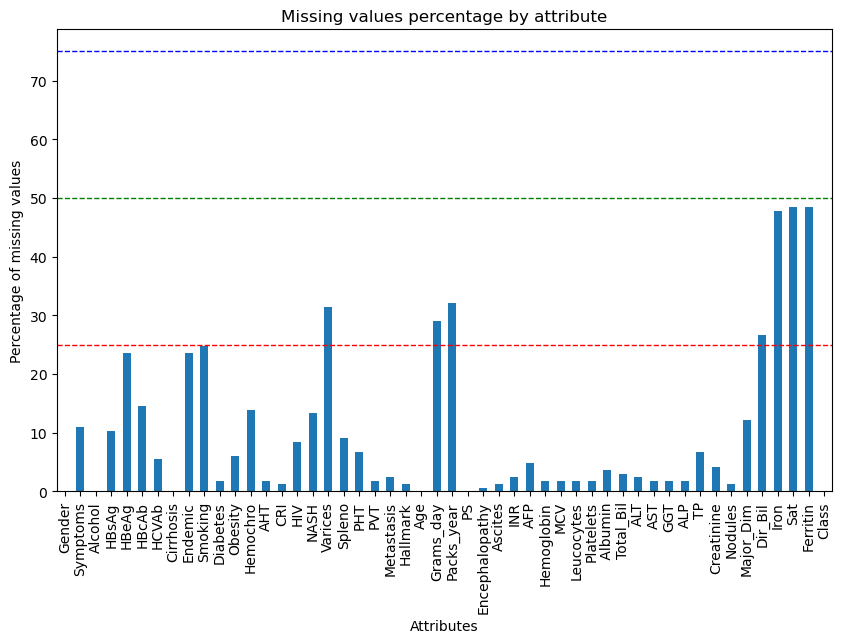

In [5]:
missing_counts = (df == "?").sum()
missing_percentage = (missing_counts / len(df)) * 100
print(missing_percentage)


plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Missing values percentage by attribute')
plt.xlabel('Attributes')
plt.ylabel('Percentage of missing values')

plt.axhline(y=25, color='r', linestyle='--', linewidth=1)
plt.axhline(y=50, color='g', linestyle='--', linewidth=1)
plt.axhline(y=75, color='b', linestyle='--', linewidth=1)

plt.show()

Não eliminamos variáveis pois nenhum atributo excede 50% de valores em falta.

Substituir valores "None" nas variáveis 'Encephalopathy' e 'Ascites' por "No" para não serem substituidos por NaN

In [6]:
df['Encephalopathy'].fillna("No", inplace=True)
df['Ascites'].fillna("No", inplace=True)

/tmp/ipykernel_26884/4110841508.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Encephalopathy'].fillna("No", inplace=True)
/tmp/ipykernel_26884/4110841508.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

Substituir todos os valores em falta ("?") por NaN

In [7]:
df.replace("?", np.nan, inplace=True)


Completar os atributos numéricos usando a mediana

In [8]:
# Lista das colunas numéricas que precisam ser tratadas
cols_to_process = ['Age', 'Grams_day', 'Packs_year', 'INR', 'AFP', 'Hemoglobin', 
                   'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 
                   'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 
                   'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin']

# Converter para tipo numérico e substituir valores NaN pela mediana
for col in cols_to_process:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)



/tmp/ipykernel_26884/3116205539.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


Substituir variáveis binárias por 1 e 0.                                                                                                                       
Nas variáveis avaliadas por estado da doença (Grade I/II, Grade III/IV e Mild, Moderate/Severe) substituir por 1 ou 2, sendo 2 o estado mais avançado(pior).                                                                                                            
Na variável PS, onde é avaliado o estado da pessoa, avaliamos por ordem sendo 0 onde a pessoa está melhor(active) e 4 onde está pior(Disabled)

In [9]:
df.replace({"Yes": 1, "No": 0, "Female": 1, "Male": 0, "Lives": 1, "Dies": 0, "Grade I/II": 1, "Grade III/IV": 2, "Mild":1, "Moderate/Severe":2, "Active":0, "Selfcare":3, "Restricted":1, "Ambulatory": 2, "Disabled": 4}, inplace=True)

/tmp/ipykernel_26884/979509063.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Yes": 1, "No": 0, "Female": 1, "Male": 0, "Lives": 1, "Dies": 0, "Grade I/II": 1, "Grade III/IV": 2, "Mild":1, "Moderate/Severe":2, "Active":0, "Selfcare":3, "Restricted":1, "Ambulatory": 2, "Disabled": 4}, inplace=True)


Preencher os valores ausentes com os valores mais frequentes em cada coluna

In [10]:
df = df.fillna(df.mode().iloc[0])

**Métodos de avaliação da qualidade das variáveis**

1. Feature Importance com Árvores de Decisão ou Random Forests: 
Os modelos baseados em árvores, como Árvores de Decisão e Random Forests, têm métodos embutidos para avaliar a importância das variáveis.
Os valores de importância das características retornados pelo RandomForestClassifier são números entre 0 e 1, e a soma de todas as importâncias é igual a 1. Aqui está um exemplo de como você pode interpretar esses valores:

           Feature  Importance
40             ALP    0.081247
31      Hemoglobin    0.076232
30             AFP    0.074603
46            Iron    0.062784
39             GGT    0.043638
29             INR    0.042665
38             AST    0.038645
26              PS    0.038503
44       Major_Dim    0.038055
34       Platelets    0.037730
33      Leucocytes    0.033110
32             MCV    0.032327
35         Albumin    0.032201
45         Dir_Bil    0.031435
42      Creatinine    0.028762
36       Total_Bil    0.027671
47             Sat    0.026465
23             Age    0.024891
48        Ferritin    0.024809
37             ALT    0.024688
41              TP    0.022666
25      Packs_year    0.017373
24       Grams_day    0.017003
20             PVT    0.015165
28         Ascites    0.014633
21      Metastasis    0.010072
1         Symptoms    0.008231
43         Nodules    0.007569
3            HBsAg    0.007134
10        Diabetes    0.006793
27  Encephalopathy    0.006595
13      

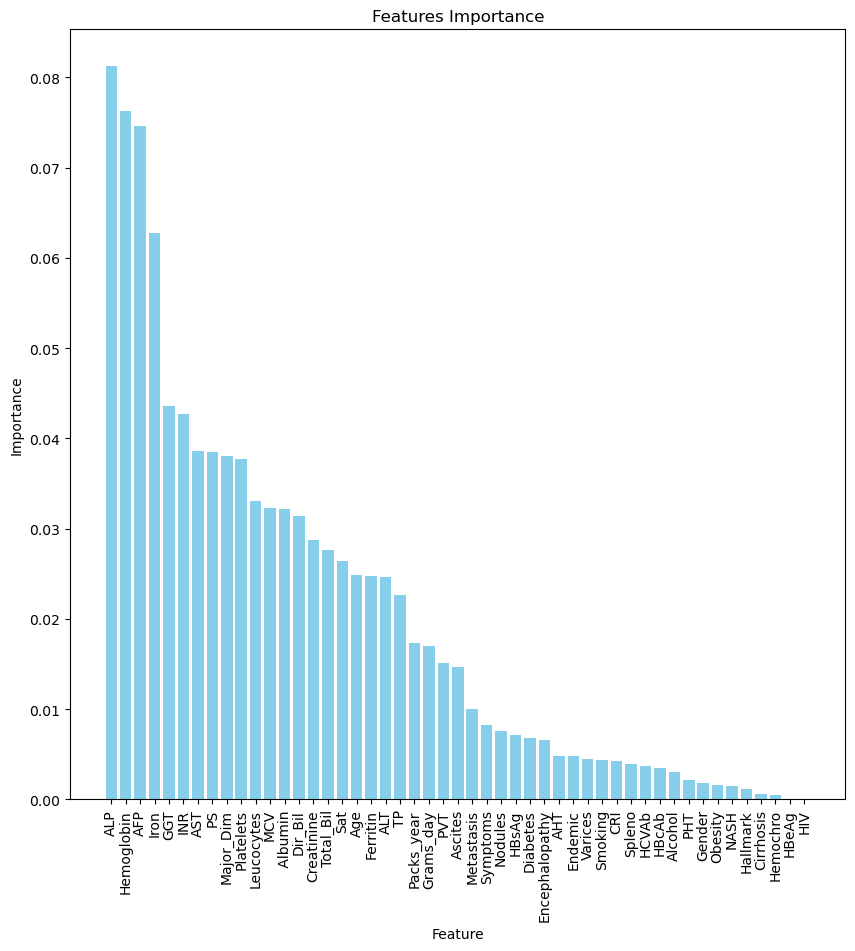

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Definir X (variáveis independentes) e y (variável dependente/target)
X = df.drop(columns=['Class'])  # Assumindo que 'Classe' é a coluna de target
y = df['Class']

# Identificar colunas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Aplicar One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols)

# Dividir o dataset em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar um modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Obter importâncias das características
importances = rf.feature_importances_
feature_names = X.columns

# Criar um DataFrame para visualizar as importâncias
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

#Visualização
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 10))
plt.bar(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Features Importance')
plt.xticks(rotation=90)  # Rotacionar os rótulos no eixo x para melhor legibilidade
plt.show()



2. Seleção de Características com Recursive Feature Elimination (RFE)
O RFE é uma técnica de seleção de características que ajusta o modelo várias vezes, removendo as características menos importantes a cada vez.

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Treinar um modelo de regressão logística
model = LogisticRegression(max_iter=1000)

# Aplicar RFE
rfe = RFE(estimator=model, n_features_to_select=1)
rfe.fit(X_train, y_train)

# Obter ranking das características
ranking = rfe.ranking_
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking})
feature_ranking = feature_ranking.sort_values(by='Ranking')

print(feature_ranking)


/home/carolina/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/carolina/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

           Feature  Ranking
20             PVT        1
1         Symptoms        2
10        Diabetes        3
13             AHT        4
0           Gender        5
19             PHT        6
26              PS        7
28         Ascites        8
14             CRI        9
29             INR       10
42      Creatinine       11
15             HIV       12
31      Hemoglobin       13
8          Endemic       14
18          Spleno       15
9          Smoking       16
22        Hallmark       17
43         Nodules       18
16            NASH       19
11         Obesity       20
7        Cirrhosis       21
2          Alcohol       22
44       Major_Dim       23
6            HCVAb       24
45         Dir_Bil       25
12        Hemochro       26
47             Sat       27
46            Iron       28
32             MCV       29
35         Albumin       30
41              TP       31
3            HBsAg       32
36       Total_Bil       33
37             ALT       34
38             AST  

3. Seleção de Características com SelectKBest:
O SelectKBest pode ser usado com uma função de pontuação para selecionar as melhores características. Para classificação, uma função comum é o chi2.

           Feature          Score
34       Platelets  453453.232501
30             AFP   22555.864043
33      Leucocytes    3568.077384
40             ALP    1699.420612
48        Ferritin     913.960361
39             GGT     595.140211
38             AST     245.121547
25      Packs_year     226.884533
46            Iron     217.601553
36       Total_Bil      51.117084
45         Dir_Bil      50.326209
26              PS      27.323472
44       Major_Dim      25.571515
47             Sat      15.616040
28         Ascites      10.001267
37             ALT       8.014371
20             PVT       7.594392
31      Hemoglobin       5.000520
41              TP       4.928658
21      Metastasis       4.511866
27  Encephalopathy       3.263431
10        Diabetes       2.902118
14             CRI       2.584047
1         Symptoms       2.427078
43         Nodules       2.018691
5            HBcAb       1.792201
0           Gender       1.765274
24       Grams_day       1.621724
32            

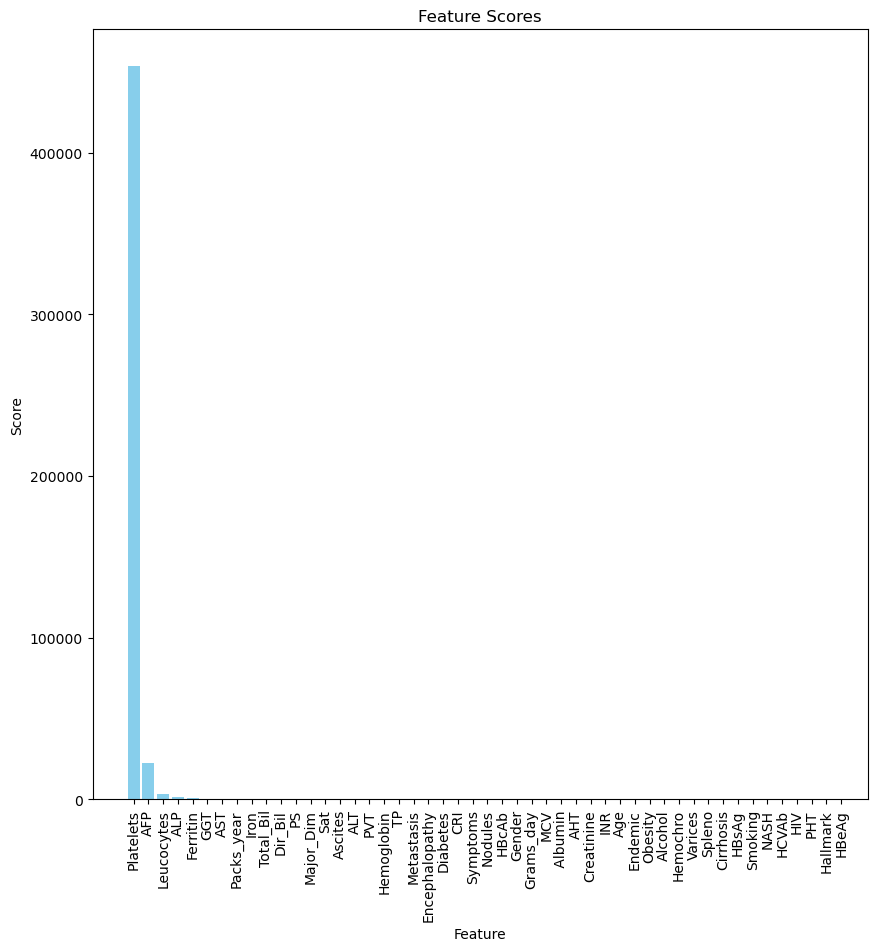

In [13]:
from sklearn.feature_selection import SelectKBest, chi2

# Aplicar SelectKBest
kbest = SelectKBest(score_func=chi2, k='all')
kbest.fit(X_train, y_train)

# Obter pontuações das características
scores = kbest.scores_
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print(feature_scores)

#Visualização
from sklearn.feature_selection import SelectKBest, chi2

kbest = SelectKBest(score_func=chi2, k='all')
kbest.fit(X_train, y_train)

# Obter pontuações das características
scores = kbest.scores_
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Ordenar o DataFrame por pontuação em ordem decrescente
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Criar a tabela
plt.figure(figsize=(10, 10))
plt.bar(feature_scores['Feature'], feature_scores['Score'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Feature Scores')
plt.xticks(rotation=90) 
plt.show()


In [14]:
import pandas as pd
import numpy as np

# Resultados das técnicasambulatorio
feature_importance_rf = pd.DataFrame({
    'Feature' :['ALP', 'AFP', 'Hemoglobin', 'Iron', 'GGT', 'Platelets', 'INR', 'AST', 'MCV', 'Major_Dim', 'Leucocytes', 'Albumin', 'Dir_Bil', 'Age', 'Total_Bil', 'Creatinine', 'ALT', 'Ferritin', 'PS', 'Sat', 'TP', 'Grams_day', 'Packs_year', 'PVT', 'Ascites', 'Metastasis', 'Symptoms', 'Nodules', 'Encephalopathy', 'HBsAg', 'Diabetes', 'Endemic', 'Smoking', 'Varices', 'CRI', 'Alcohol', 'Spleno', 'AHT', 'HCVAb', 'HBcAb', 'Hallmark', 'PHT', 'Cirrhosis', 'Gender', 'Obesity', 'NASH', 'Hemochro', 'HIV', 'HBeAg'],
    'Importance': [0.084795, 0.072460, 0.070927, 0.066636, 0.040003, 0.039688, 0.037464, 0.037307, 0.037105, 0.035314, 0.033237, 0.032853, 0.031938, 0.030341, 0.029758, 0.029640, 0.028214, 0.027715, 0.026128, 0.025600, 0.022502, 0.016429, 0.016191, 0.015120, 0.014709, 0.009974, 0.009289, 0.008589, 0.008507, 0.007267, 0.006778, 0.004740, 0.004491, 0.004233, 0.004121, 0.004017, 0.003985, 0.003951, 0.003383, 0.003105, 0.002659, 0.002533, 0.001901, 0.001676, 0.001132, 0.001071, 0.000524, 0.000000, 0.000000]
})

rfe_ranking = pd.DataFrame({
'Feature' : ['PVT', 'Symptoms', 'Diabetes', 'AHT', 'Ascites', 'CRI', 'PHT', 'Gender', 'Creatinine', 'HIV', 'Hemoglobin', 'Albumin', 'Varices', 'Smoking', 'Cirrhosis', 'Hallmark', 'Obesity', 'Alcohol', 'NASH', 'Major_Dim', 'Encephalopathy', 'PS', 'HCVAb', 'Spleno', 'HBsAg', 'Total_Bil', 'Nodules','Hemochro','Sat', 'Iron', 'TP', 'INR', 'MCV', 'HBcAb', 'ALT', 'AST', 'Metastasis', 'Packs_year', 'Endemic', 'ALP', 'Dir_Bil', 'Grams_day', 'Age', 'GGT', 'Ferritin', 'Leucocytes', 'Platelets', 'AFP', 'HBeAg'],
'Ranking' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
})

select_kbest_scores = pd.DataFrame({
'Feature':['Platelets', 'AFP', 'Leucocytes', 'ALP', 'Ferritin', 'GGT', 'AST', 'Packs_year', 'Iron', 'Total_Bil', 'Dir_Bil', 'Major_Dim', 'Sat', 'PS', 'Ascites', 'ALT', 'PVT', 'Hemoglobin', 'TP', 'Metastasis', 'Encephalopathy' , 'Diabetes', 'CRI','Symptoms', 'Nodules', 'HBcAb', 'Gender', 'Grams_day', 'MCV', 'Albumin', 'AHT', 'Creatinine', 'INR', 'Age', 'Endemic', 'Obesity', 'Alcohol','Hemochro','Varices','Spleno','Cirrhosis' , 'HBsAg', 'Smoking', 'NASH', 'HCVAb', 'HIV', 'PHT', 'Hallmark', 'HBeAg'],
'Score': [453453.232501, 22555.864043, 3568.077384, 1699.420612, 913.960361, 595.140211, 245.121547, 226.884533, 217.601553, 51.117084, 50.326209, 25.571515, 15.616040,12.280817,10.001267,8.014371, 7.594392, 5.000520,4.928658,4.511866, 3.265247, 2.902118, 2.584047, 2.427078, 2.018691, 1.792201, 1.765274, 1.621724, 1.419413, 1.124771, 0.942785, 0.686839, 0.663082, 0.437878, 0.395682, 0.305961, 0.277326, 0.041200, 0.040376, 0.036687, 0.035609, 0.028126, 0.022453, 0.014063, 0.007581, 0.007031, 0.005829, 0.002045, 0.000000]
})

all_features = sorted(set(feature_importance_rf['Feature']).union(rfe_ranking['Feature']).union(select_kbest_scores['Feature']))

# Criar dicionários para mapeamento
feature_importance_dict = dict(zip(feature_importance_rf['Feature'], feature_importance_rf['Importance']))
rfe_ranking_dict = dict(zip(rfe_ranking['Feature'], rfe_ranking['Ranking']))
select_kbest_scores_dict = dict(zip(select_kbest_scores['Feature'], select_kbest_scores['Score']))

# Preencher valores ausentes com NaN
feature_importance_filled = [feature_importance_dict.get(feature, np.nan) for feature in all_features]
rfe_ranking_filled = [rfe_ranking_dict.get(feature, np.nan) for feature in all_features]
select_kbest_scores_filled = [select_kbest_scores_dict.get(feature, np.nan) for feature in all_features]

# Criar DataFrame combinado
combined_df = pd.DataFrame({
    'Feature': all_features,
    'Feature Importance': feature_importance_filled,
    'RFE Ranking': rfe_ranking_filled,
    'Select KBest Score': select_kbest_scores_filled
})

# Normalizar as colunas (assumindo que quanto menor o ranking melhor e quanto maior a pontuação melhor)
combined_df['Normalized Feature Importance'] = combined_df['Feature Importance'] / combined_df['Feature Importance'].max()
combined_df['Normalized RFE Ranking'] = 1 - (combined_df['RFE Ranking'] / combined_df['RFE Ranking'].max())
combined_df['Normalized Select KBest Score'] = combined_df['Select KBest Score'] / combined_df['Select KBest Score'].max()

# Somar as colunas normalizadas para obter um ranking combinado
combined_df['Combined Score'] = (combined_df['Normalized Feature Importance'] + combined_df['Normalized RFE Ranking'] + combined_df['Normalized Select KBest Score']) / 3

# Ordenar pelo ranking combinado
combined_df_sorted = combined_df.sort_values(by='Combined Score', ascending=False)

print(combined_df_sorted)


           Feature  Feature Importance  RFE Ranking  Select KBest Score  \
27      Hemoglobin            0.070927           11            5.000520   
41       Platelets            0.039688           47       453453.232501   
2              ALP            0.084795           40         1699.420612   
29            Iron            0.066636           30          217.601553   
11      Creatinine            0.029640            9            0.686839   
39             PVT            0.015120            1            7.594392   
6          Albumin            0.032853           12            1.124771   
8          Ascites            0.014709            5           10.001267   
45        Symptoms            0.009289            2            2.427078   
12        Diabetes            0.006778            3            2.902118   
32       Major_Dim            0.035314           20           25.571515   
1              AHT            0.003951            4            0.942785   
9              CRI       

**Estes foram os resultados obtidos, por ordem decrescente de pontuação. Quanto mais para baixo, menos valiosa é a variável.**


| No |   Feature     | Combined Score |
|----|---------------|----------------|
| 27 | Hemoglobin    |    0.537325    |
| 41 | Platelets     |    0.502954    |
|  2 | ALP           |    0.395807    |
| 29 | Iron          |    0.391361    |
| 11 | Creatinine    |    0.388626    |
| 39 | PVT           |    0.385974    |
|  6 | Albumin       |    0.380848    |
|  8 | Ascites       |    0.357149    |
| 45 | Symptoms      |    0.356245    |
| 12 | Diabetes      |    0.339572    |
| 32 | Major_Dim     |    0.336119    |
|  1 | AHT           |    0.321655    |
|  9 | CRI           |    0.308719    |
|  0 | AFP           |    0.308227    |
| 37 | PHT           |    0.295672    |
| 38 | PS            |    0.286393    |
| 18 | Gender        |    0.285501    |
| 47 | Total_Bil     |    0.273480    |
| 24 | HIV           |    0.265306    |
| 28 | INR           |    0.262920    |
| 48 | Varices       |    0.261538    |
| 43 | Smoking       |    0.255750    |
| 31 | MCV           |    0.254706    |
| 10 | Cirrhosis     |    0.238765    |
| 42 | Sat           |    0.236701    |
|  4 | AST           |    0.235271    |
| 25 | Hallmark      |    0.234942    |
|  7 | Alcohol       |    0.226676    |
| 14 | Encephalopathy|    0.223920    |
| 36 | Obesity       |    0.222137    |
| 46 | TP            |    0.210909    |
| 34 | NASH          |    0.208292    |
|  3 | ALT           |    0.206155    |
| 22 | HBsAg         |    0.191832    |
| 17 | GGT           |    0.191705    |
| 23 | HCVAb         |    0.190169    |
| 44 | Spleno        |    0.185733    |
| 35 | Nodules       |    0.183425    |
| 13 | Dir_Bil       |    0.180009    |
|  5 | Age           |    0.160089    |
| 30 | Leucocytes    |    0.153687    |
| 26 | Hemochro      |    0.144917    |
| 40 | Packs_year    |    0.138644    |
| 16 | Ferritin      |    0.136832    |
| 33 | Metastasis    |    0.120844    |
| 20 | HBcAb         |    0.114248    |
| 19 | Grams_day     |    0.112203    |
| 15 | Endemic       |    0.086661    |
| 21 | HBeAg         |    0.000000    |


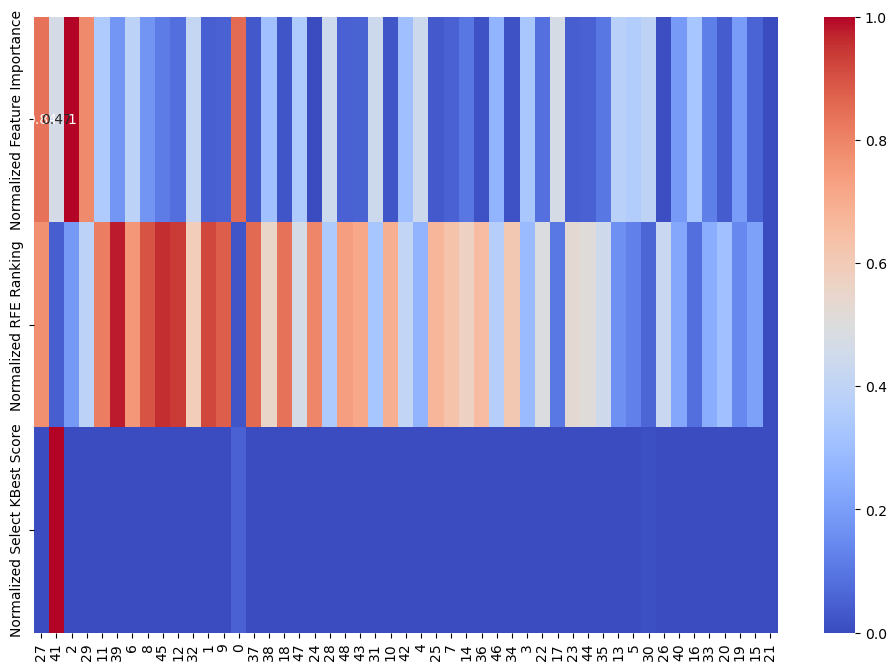

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap das pontuações normalizadas
plt.figure(figsize=(12, 8))
sns.heatmap(combined_df_sorted[['Normalized Feature Importance', 'Normalized RFE Ranking', 'Normalized Select KBest Score']].T, annot=True, cmap='coolwarm')
plt.show()


Gráficos de cada atributo em relação a quem vive e morre para podermos analisar se retiramos mais alguma variável

<Figure size 800x600 with 0 Axes>

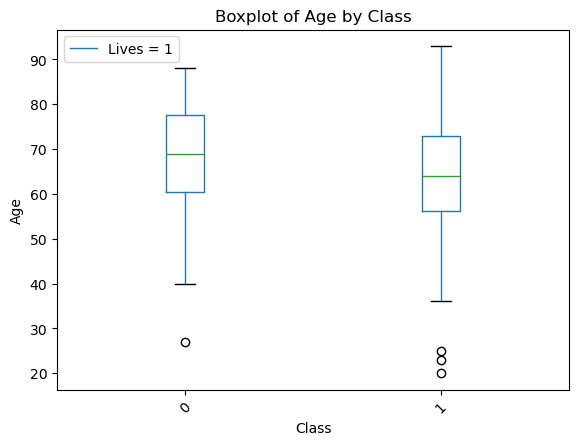

In [16]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Age', by='Class', grid=False)
plt.title('Boxplot of Age by Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()

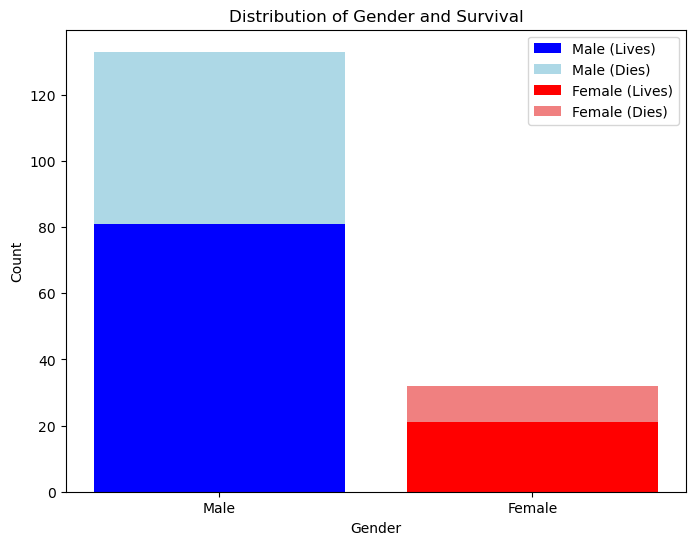

In [17]:

male_die = df[(df['Gender'] == 0) & (df['Class'] == 0)]['Gender'].count()
male_live = df[(df['Gender'] == 0) & (df['Class'] == 1)]['Gender'].count()
female_die = df[(df['Gender'] == 1) & (df['Class'] == 0)]['Gender'].count()
female_live = df[(df['Gender'] == 1) & (df['Class'] == 1)]['Gender'].count()

plt.figure(figsize=(8, 6))
bars1 = plt.bar(['Male'], [male_live], color='blue', label='Male (Lives)')
bars2 = plt.bar(['Male'], [male_die], bottom=[male_live], color='lightblue', label='Male (Dies)')
bars3 = plt.bar(['Female'], [female_live], color='red', label='Female (Lives)')
bars4 = plt.bar(['Female'], [female_die], bottom=[female_live], color='lightcoral', label='Female (Dies)')


plt.title('Distribution of Gender and Survival')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=0)
plt.show()


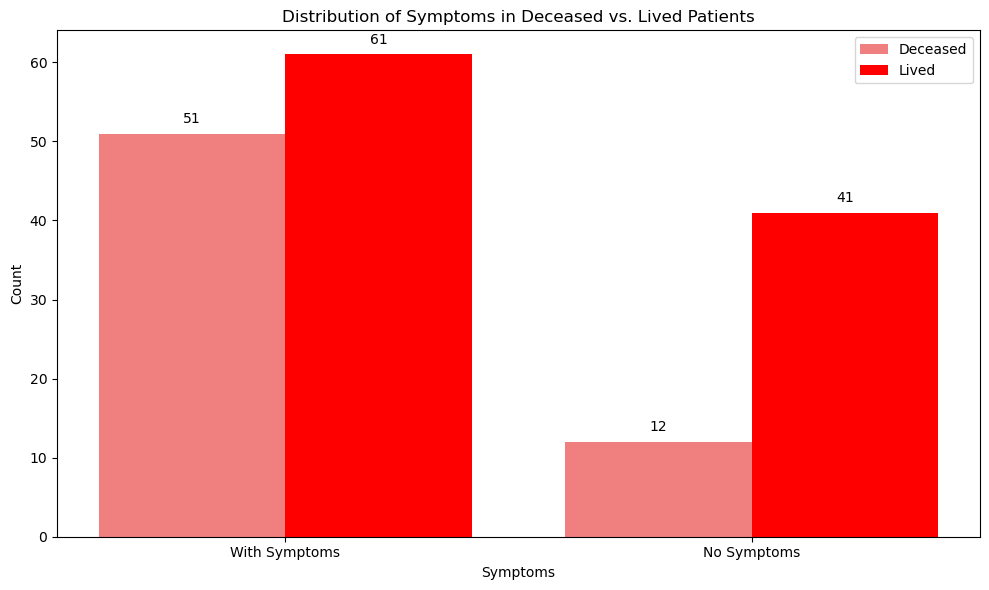

In [18]:

symptoms_die = df[(df['Symptoms'] == 1) & (df['Class'] == 0)]['Symptoms'].count()
no_symptoms_die = df[(df['Symptoms'] == 0) & (df['Class'] == 0)]['Symptoms'].count()
symptoms_live = df[(df['Symptoms'] == 1) & (df['Class'] == 1)]['Symptoms'].count()
no_symptoms_live = df[(df['Symptoms'] == 0) & (df['Class'] == 1)]['Symptoms'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [symptoms_die, no_symptoms_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [symptoms_live, no_symptoms_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Symptoms in Deceased vs. Lived Patients')
plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['With Symptoms', 'No Symptoms'])
plt.legend()
plt.tight_layout()
plt.show()



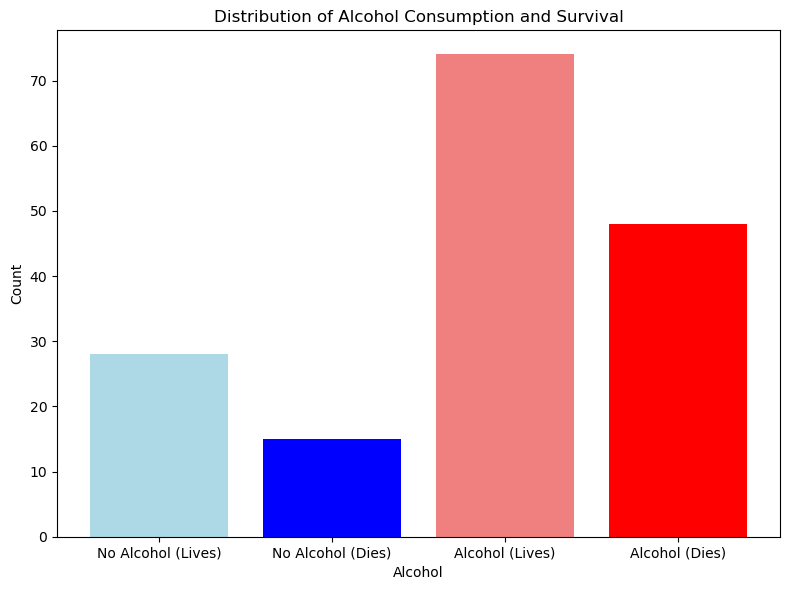

In [19]:


# Count the occurrences of males and females who live or die
no_alcohol_die = df[(df['Alcohol'] == 0) & (df['Class'] == 0)]['Alcohol'].count()
no_alcohol_live = df[(df['Alcohol'] == 0) & (df['Class'] == 1)]['Alcohol'].count()
alcohol_die = df[(df['Alcohol'] == 1) & (df['Class'] == 0)]['Alcohol'].count()
alcohol_live = df[(df['Alcohol'] == 1) & (df['Class'] == 1)]['Alcohol'].count()

# Plotting a stacked bar chart
plt.figure(figsize=(8, 6))
bars1 = plt.bar(['No Alcohol (Lives)'], [no_alcohol_live], color='lightblue')
bars2 = plt.bar(['No Alcohol (Dies)'], [no_alcohol_die], color='blue')
bars3 = plt.bar(['Alcohol (Lives)'], [alcohol_live], color='lightcoral')
bars4 = plt.bar(['Alcohol (Dies)'], [alcohol_die], color='red')
    
plt.title('Distribution of Alcohol Consumption and Survival')
plt.xlabel('Alcohol')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


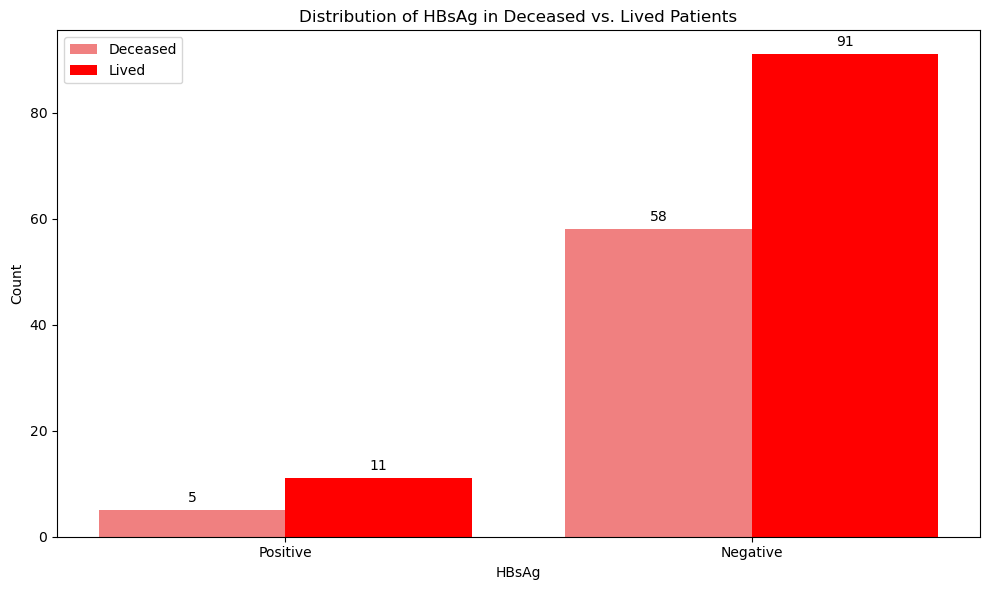

In [20]:


# Count the occurrences of people who die and live with and without HBsAg
hbsag_die = df[(df['HBsAg'] == 1) & (df['Class'] == 0)]['HBsAg'].count()
no_hbsag_die = df[(df['HBsAg'] == 0) & (df['Class'] == 0)]['HBsAg'].count()
hbsag_live = df[(df['HBsAg'] == 1) & (df['Class'] == 1)]['HBsAg'].count()
no_hbsag_live = df[(df['HBsAg'] == 0) & (df['Class'] == 1)]['HBsAg'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [hbsag_die, no_hbsag_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [hbsag_live, no_hbsag_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of HBsAg in Deceased vs. Lived Patients')
plt.xlabel('HBsAg')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Positive', 'Negative'])
plt.legend()
plt.tight_layout()
plt.show()


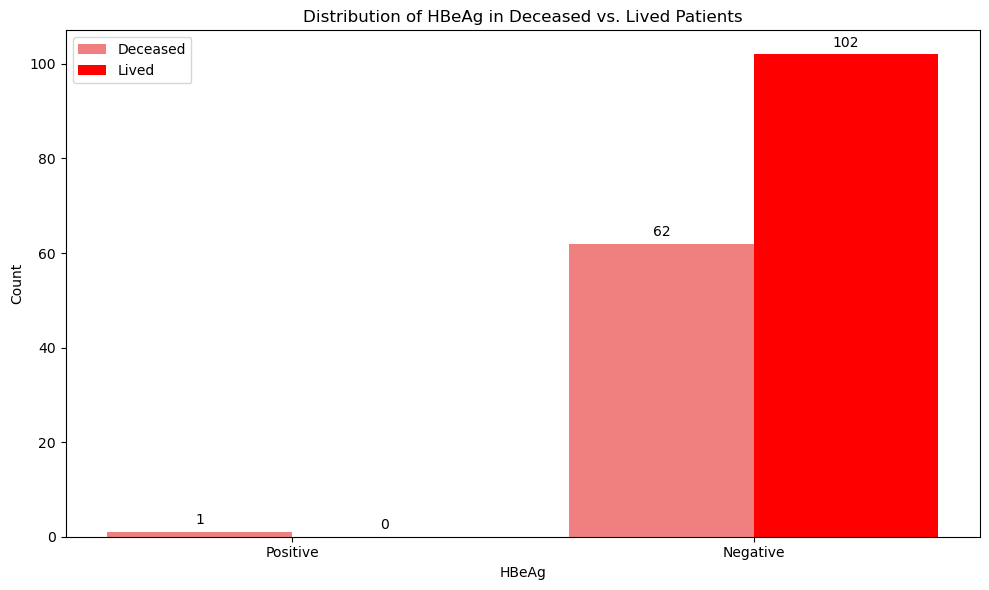

In [21]:


# Count the occurrences of people who die and live with and without HBeAg
hbeag_die = df[(df['HBeAg'] == 1) & (df['Class'] == 0)]['HBeAg'].count()
no_hbeag_die = df[(df['HBeAg'] == 0) & (df['Class'] == 0)]['HBeAg'].count()
hbeag_live = df[(df['HBeAg'] == 1) & (df['Class'] == 1)]['HBeAg'].count()
no_hbeag_live = df[(df['HBeAg'] == 0) & (df['Class'] == 1)]['HBeAg'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [hbeag_die, no_hbeag_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [hbeag_live, no_hbeag_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of HBeAg in Deceased vs. Lived Patients')
plt.xlabel('HBeAg')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Positive', 'Negative'])
plt.legend()
plt.tight_layout()
plt.show()


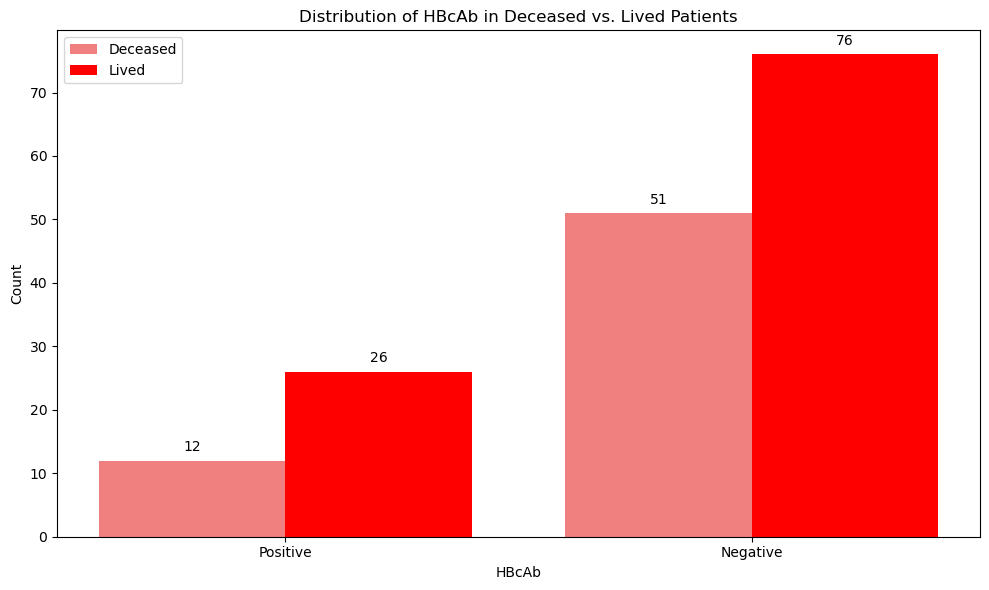

In [22]:


# Count the occurrences of people who die and live with and without HBcAb
hbcab_die = df[(df['HBcAb'] == 1) & (df['Class'] == 0)]['HBcAb'].count()
no_hbcab_die = df[(df['HBcAb'] == 0) & (df['Class'] == 0)]['HBcAb'].count()
hbcab_live = df[(df['HBcAb'] == 1) & (df['Class'] == 1)]['HBcAb'].count()
no_hbcab_live = df[(df['HBcAb'] == 0) & (df['Class'] == 1)]['HBcAb'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [hbcab_die, no_hbcab_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [hbcab_live, no_hbcab_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of HBcAb in Deceased vs. Lived Patients')
plt.xlabel('HBcAb')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Positive', 'Negative'])
plt.legend()
plt.tight_layout()
plt.show()


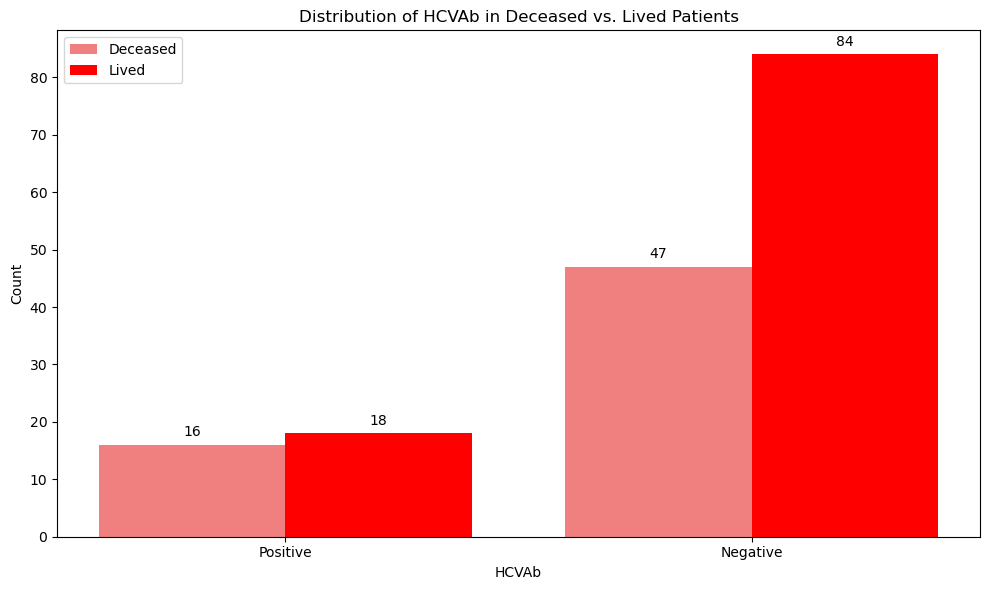

In [23]:


# Count the occurrences of people who die and live with and without HCVAb
hcvab_die = df[(df['HCVAb'] == 1) & (df['Class'] == 0)]['HCVAb'].count()
no_hcvab_die = df[(df['HCVAb'] == 0) & (df['Class'] == 0)]['HCVAb'].count()
hcvab_live = df[(df['HCVAb'] == 1) & (df['Class'] == 1)]['HCVAb'].count()
no_hcvab_live = df[(df['HCVAb'] == 0) & (df['Class'] == 1)]['HCVAb'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [hcvab_die, no_hcvab_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [hcvab_live, no_hcvab_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of HCVAb in Deceased vs. Lived Patients')
plt.xlabel('HCVAb')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Positive', 'Negative'])
plt.legend()
plt.tight_layout()
plt.show()


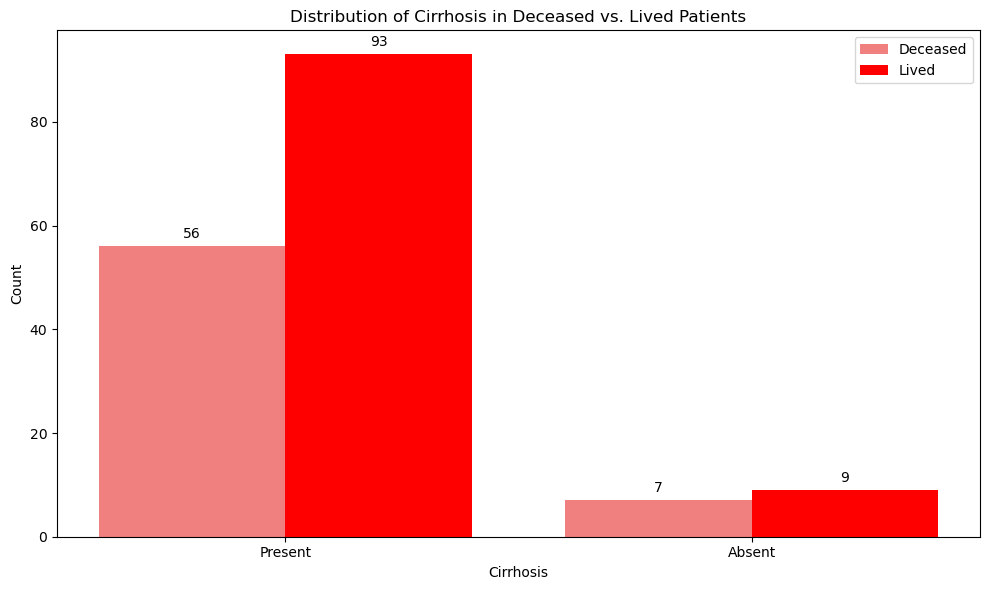

In [24]:


# Count the occurrences of people who die and live with and without Cirrhosis
cirrhosis_die = df[(df['Cirrhosis'] == 1) & (df['Class'] == 0)]['Cirrhosis'].count()
no_cirrhosis_die = df[(df['Cirrhosis'] == 0) & (df['Class'] == 0)]['Cirrhosis'].count()
cirrhosis_live = df[(df['Cirrhosis'] == 1) & (df['Class'] == 1)]['Cirrhosis'].count()
no_cirrhosis_live = df[(df['Cirrhosis'] == 0) & (df['Class'] == 1)]['Cirrhosis'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [cirrhosis_die, no_cirrhosis_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [cirrhosis_live, no_cirrhosis_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Cirrhosis in Deceased vs. Lived Patients')
plt.xlabel('Cirrhosis')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


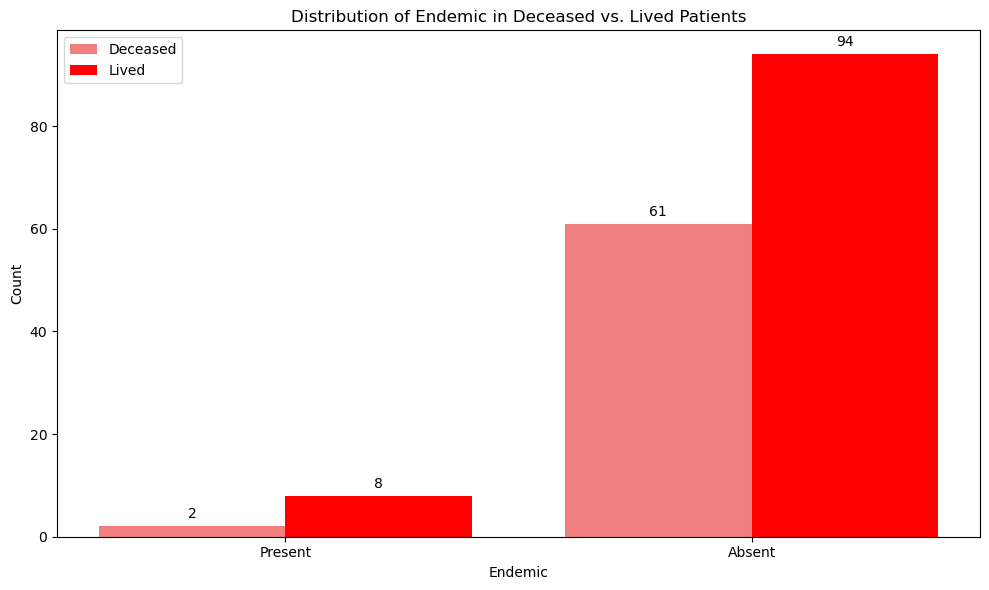

In [25]:


# Count the occurrences of people who die and live with and without Endemic
endemic_die = df[(df['Endemic'] == 1) & (df['Class'] == 0)]['Endemic'].count()
no_endemic_die = df[(df['Endemic'] == 0) & (df['Class'] == 0)]['Endemic'].count()
endemic_live = df[(df['Endemic'] == 1) & (df['Class'] == 1)]['Endemic'].count()
no_endemic_live = df[(df['Endemic'] == 0) & (df['Class'] == 1)]['Endemic'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [endemic_die, no_endemic_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [endemic_live, no_endemic_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Endemic in Deceased vs. Lived Patients')
plt.xlabel('Endemic')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


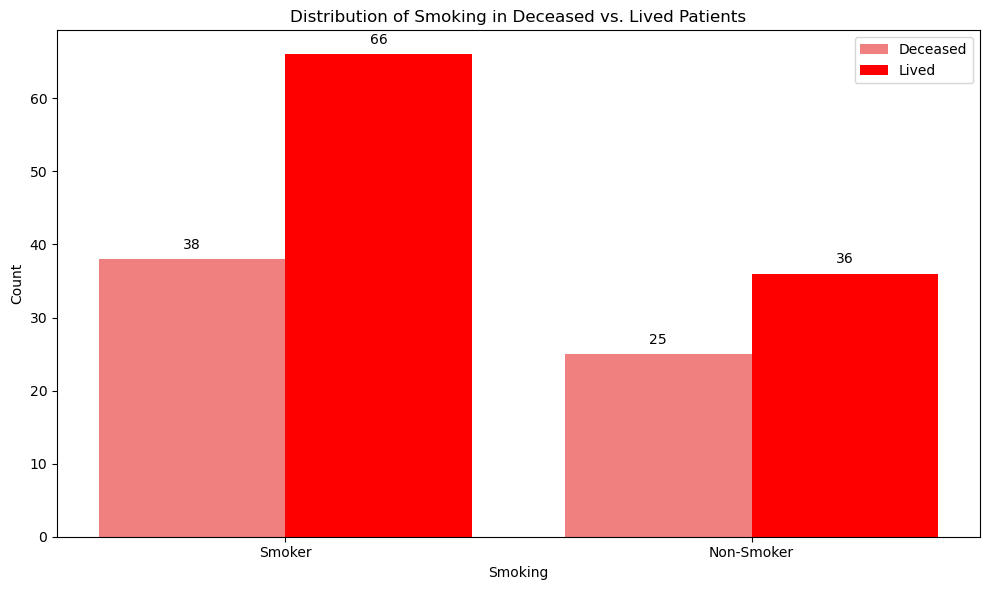

In [26]:


# Count the occurrences of people who die and live with and without Smoking
smoking_die = df[(df['Smoking'] == 1) & (df['Class'] == 0)]['Smoking'].count()
no_smoking_die = df[(df['Smoking'] == 0) & (df['Class'] == 0)]['Smoking'].count()
smoking_live = df[(df['Smoking'] == 1) & (df['Class'] == 1)]['Smoking'].count()
no_smoking_live = df[(df['Smoking'] == 0) & (df['Class'] == 1)]['Smoking'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [smoking_die, no_smoking_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [smoking_live, no_smoking_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Smoking in Deceased vs. Lived Patients')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Smoker', 'Non-Smoker'])
plt.legend()
plt.tight_layout()
plt.show()


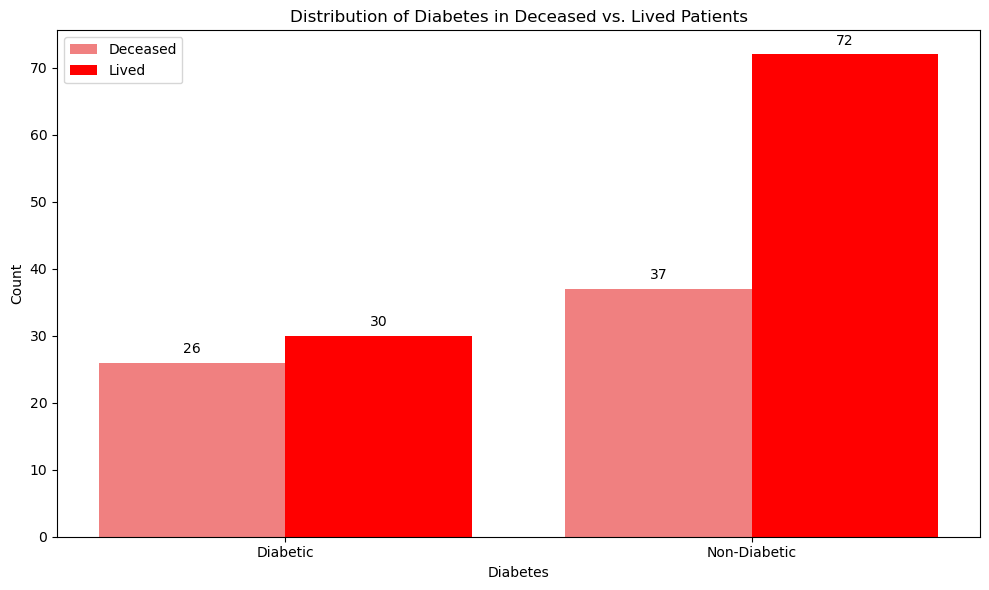

In [27]:


# Count the occurrences of people who die and live with and without Diabetes
diabetes_die = df[(df['Diabetes'] == 1) & (df['Class'] == 0)]['Diabetes'].count()
no_diabetes_die = df[(df['Diabetes'] == 0) & (df['Class'] == 0)]['Diabetes'].count()
diabetes_live = df[(df['Diabetes'] == 1) & (df['Class'] == 1)]['Diabetes'].count()
no_diabetes_live = df[(df['Diabetes'] == 0) & (df['Class'] == 1)]['Diabetes'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [diabetes_die, no_diabetes_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [diabetes_live, no_diabetes_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Diabetes in Deceased vs. Lived Patients')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Diabetic', 'Non-Diabetic'])
plt.legend()
plt.tight_layout()
plt.show()


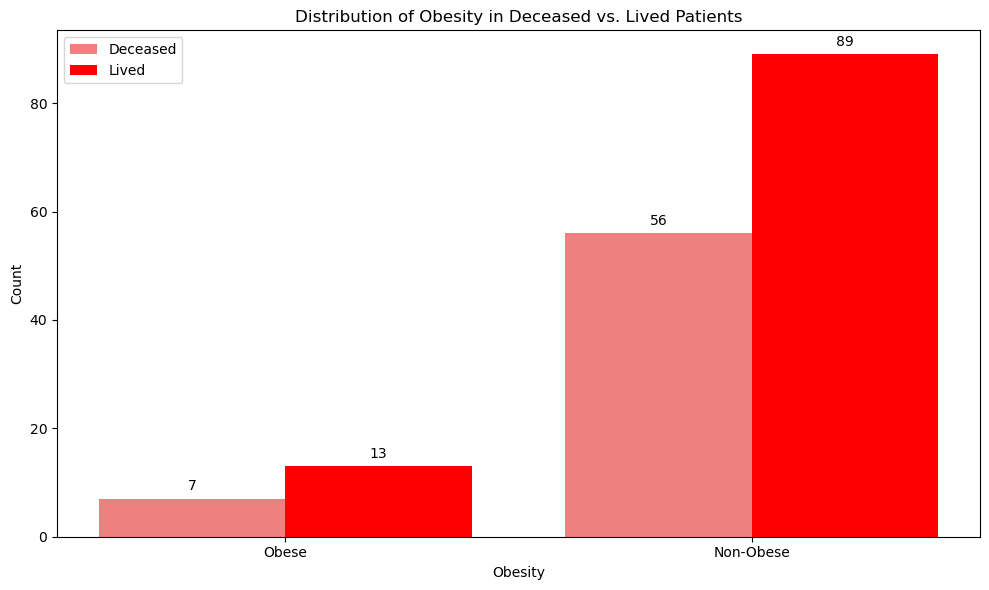

In [28]:


# Count the occurrences of people who die and live with and without Obesity
obesity_die = df[(df['Obesity'] == 1) & (df['Class'] == 0)]['Obesity'].count()
no_obesity_die = df[(df['Obesity'] == 0) & (df['Class'] == 0)]['Obesity'].count()
obesity_live = df[(df['Obesity'] == 1) & (df['Class'] == 1)]['Obesity'].count()
no_obesity_live = df[(df['Obesity'] == 0) & (df['Class'] == 1)]['Obesity'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [obesity_die, no_obesity_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [obesity_live, no_obesity_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Obesity in Deceased vs. Lived Patients')
plt.xlabel('Obesity')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Obese', 'Non-Obese'])
plt.legend()
plt.tight_layout()
plt.show()


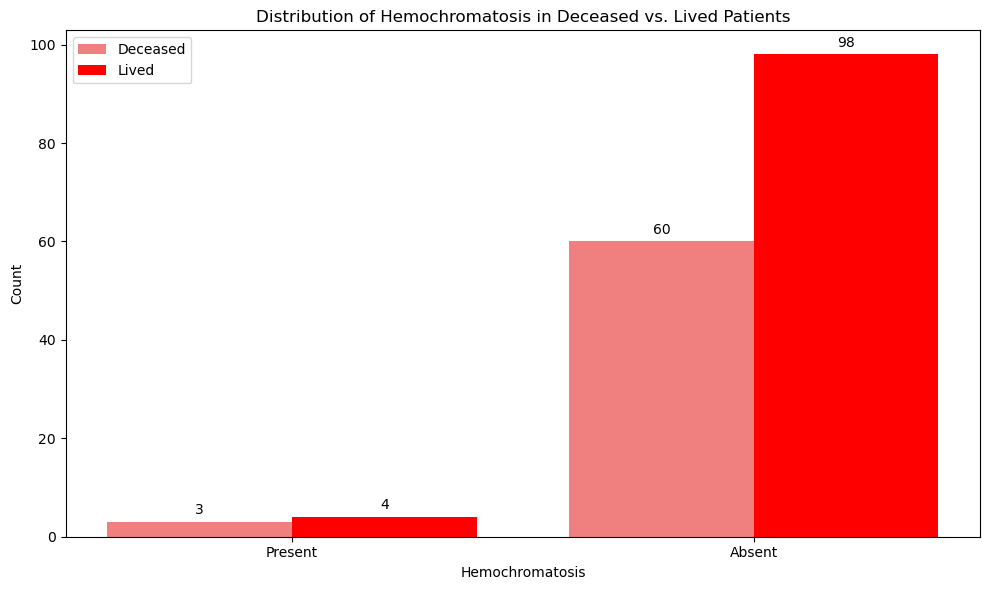

In [29]:


# Count the occurrences of people who die and live with and without Hemochromatosis
hemochro_die = df[(df['Hemochro'] == 1) & (df['Class'] == 0)]['Hemochro'].count()
no_hemochro_die = df[(df['Hemochro'] == 0) & (df['Class'] == 0)]['Hemochro'].count()
hemochro_live = df[(df['Hemochro'] == 1) & (df['Class'] == 1)]['Hemochro'].count()
no_hemochro_live = df[(df['Hemochro'] == 0) & (df['Class'] == 1)]['Hemochro'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [hemochro_die, no_hemochro_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [hemochro_live, no_hemochro_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Hemochromatosis in Deceased vs. Lived Patients')
plt.xlabel('Hemochromatosis')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


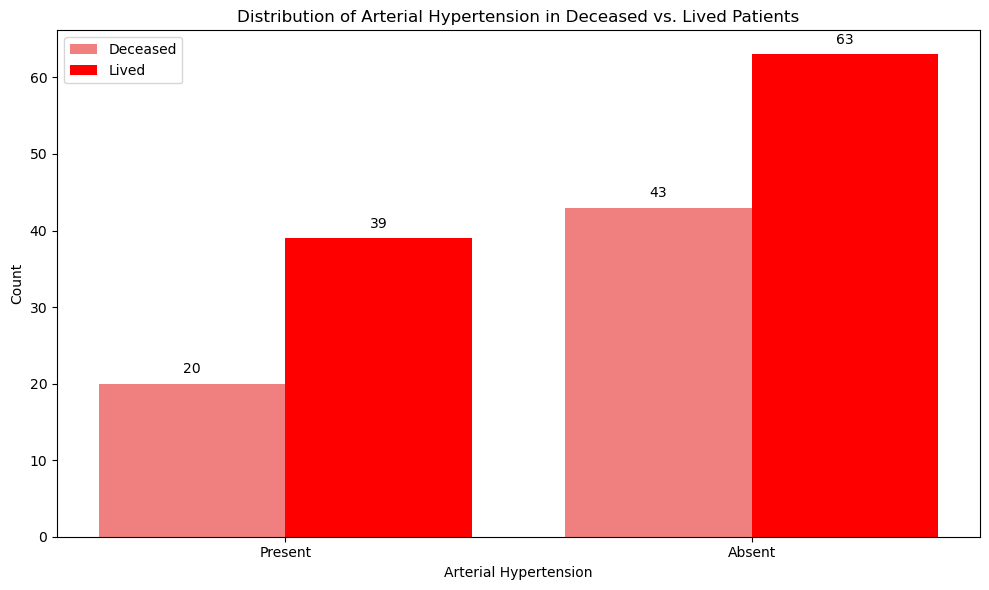

In [30]:


# Count the occurrences of people who die and live with and without Arterial Hypertension
aht_die = df[(df['AHT'] == 1) & (df['Class'] == 0)]['AHT'].count()
no_aht_die = df[(df['AHT'] == 0) & (df['Class'] == 0)]['AHT'].count()
aht_live = df[(df['AHT'] == 1) & (df['Class'] == 1)]['AHT'].count()
no_aht_live = df[(df['AHT'] == 0) & (df['Class'] == 1)]['AHT'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [aht_die, no_aht_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [aht_live, no_aht_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Arterial Hypertension in Deceased vs. Lived Patients')
plt.xlabel('Arterial Hypertension')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


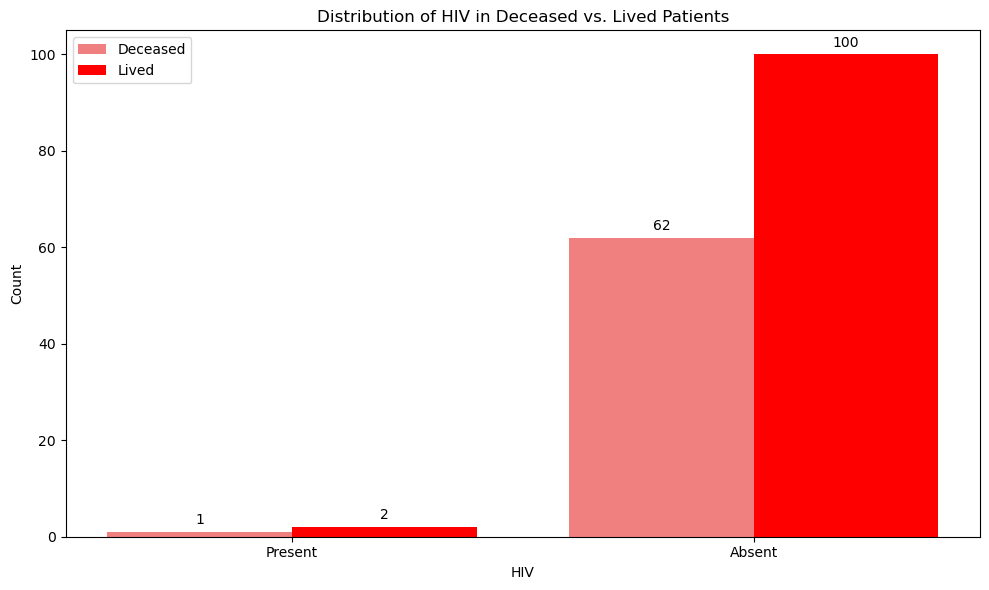

In [31]:


# Count the occurrences of people who die and live with and without HIV
hiv_die = df[(df['HIV'] == 1) & (df['Class'] == 0)]['HIV'].count()
no_hiv_die = df[(df['HIV'] == 0) & (df['Class'] == 0)]['HIV'].count()
hiv_live = df[(df['HIV'] == 1) & (df['Class'] == 1)]['HIV'].count()
no_hiv_live = df[(df['HIV'] == 0) & (df['Class'] == 1)]['HIV'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [hiv_die, no_hiv_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [hiv_live, no_hiv_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of HIV in Deceased vs. Lived Patients')
plt.xlabel('HIV')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


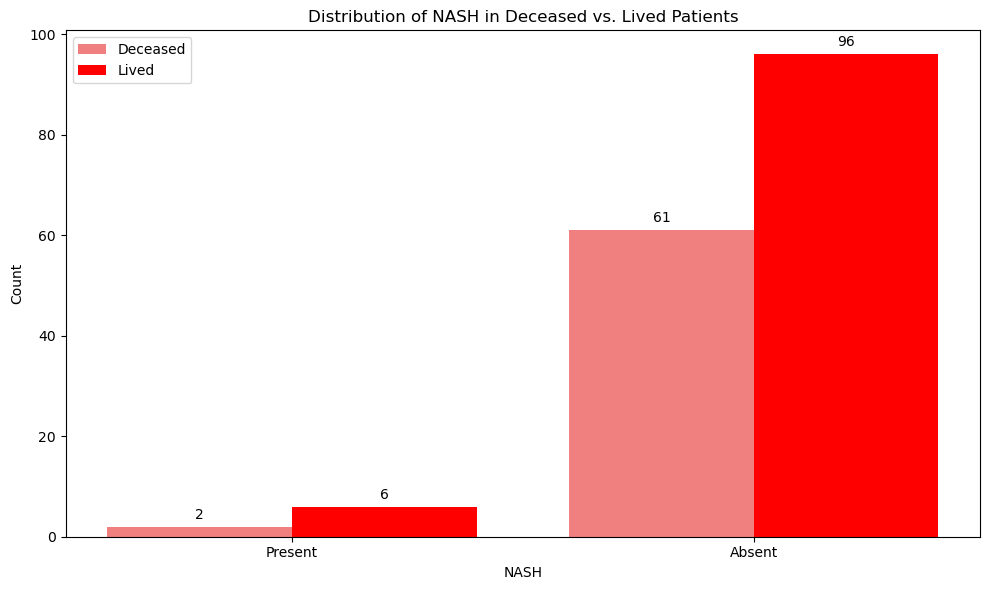

In [32]:


# Count the occurrences of people who die and live with and without NASH
nash_die = df[(df['NASH'] == 1) & (df['Class'] == 0)]['NASH'].count()
no_nash_die = df[(df['NASH'] == 0) & (df['Class'] == 0)]['NASH'].count()
nash_live = df[(df['NASH'] == 1) & (df['Class'] == 1)]['NASH'].count()
no_nash_live = df[(df['NASH'] == 0) & (df['Class'] == 1)]['NASH'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [nash_die, no_nash_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [nash_live, no_nash_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of NASH in Deceased vs. Lived Patients')
plt.xlabel('NASH')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


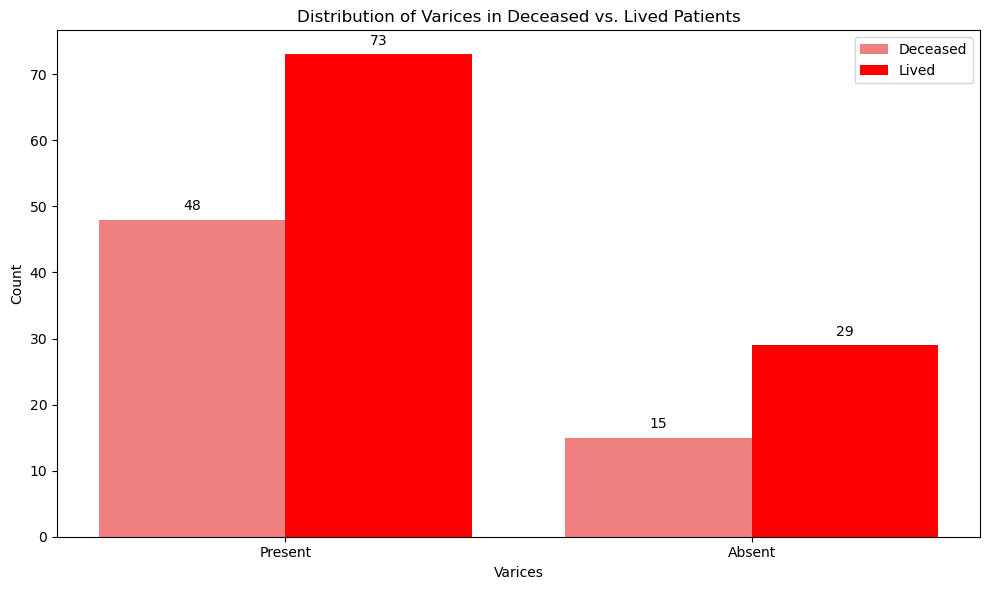

In [33]:


# Count the occurrences of people who die and live with and without Varices
varices_die = df[(df['Varices'] == 1) & (df['Class'] == 0)]['Varices'].count()
no_varices_die = df[(df['Varices'] == 0) & (df['Class'] == 0)]['Varices'].count()
varices_live = df[(df['Varices'] == 1) & (df['Class'] == 1)]['Varices'].count()
no_varices_live = df[(df['Varices'] == 0) & (df['Class'] == 1)]['Varices'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [varices_die, no_varices_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [varices_live, no_varices_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Varices in Deceased vs. Lived Patients')
plt.xlabel('Varices')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


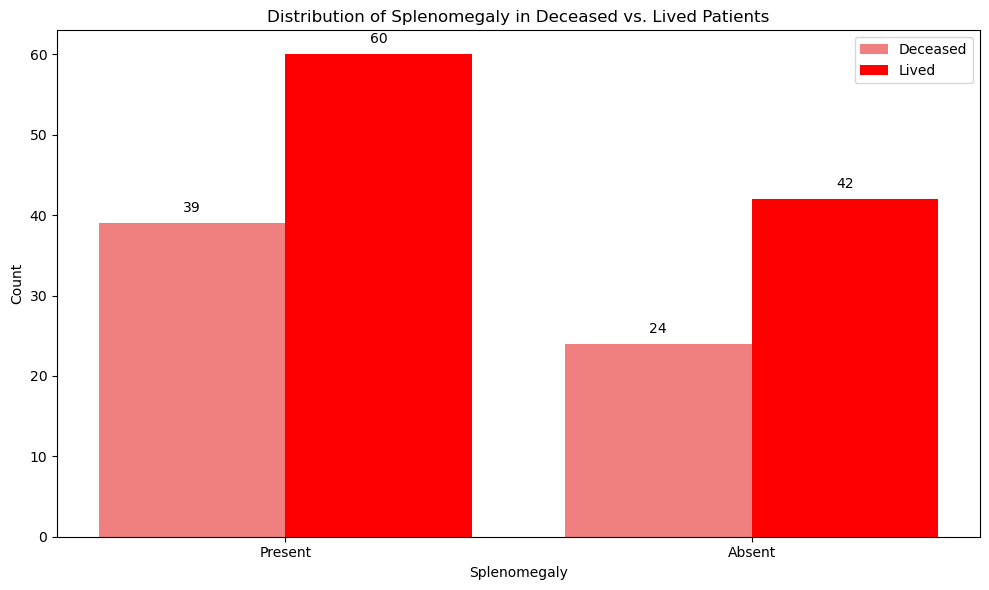

In [34]:


# Count the occurrences of people who die and live with and without Splenomegaly
spleno_die = df[(df['Spleno'] == 1) & (df['Class'] == 0)]['Spleno'].count()
no_spleno_die = df[(df['Spleno'] == 0) & (df['Class'] == 0)]['Spleno'].count()
spleno_live = df[(df['Spleno'] == 1) & (df['Class'] == 1)]['Spleno'].count()
no_spleno_live = df[(df['Spleno'] == 0) & (df['Class'] == 1)]['Spleno'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [spleno_die, no_spleno_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [spleno_live, no_spleno_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Splenomegaly in Deceased vs. Lived Patients')
plt.xlabel('Splenomegaly')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


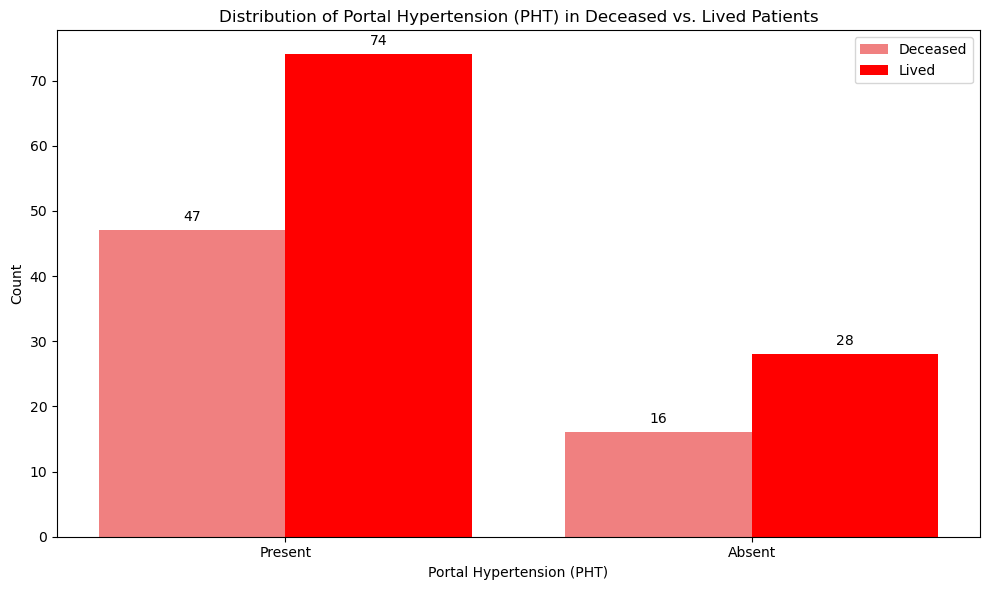

In [35]:


# Count the occurrences of people who die and live with and without Portal Hypertension (PHT)
pht_die = df[(df['PHT'] == 1) & (df['Class'] == 0)]['PHT'].count()
no_pht_die = df[(df['PHT'] == 0) & (df['Class'] == 0)]['PHT'].count()
pht_live = df[(df['PHT'] == 1) & (df['Class'] == 1)]['PHT'].count()
no_pht_live = df[(df['PHT'] == 0) & (df['Class'] == 1)]['PHT'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [pht_die, no_pht_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [pht_live, no_pht_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Portal Hypertension (PHT) in Deceased vs. Lived Patients')
plt.xlabel('Portal Hypertension (PHT)')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


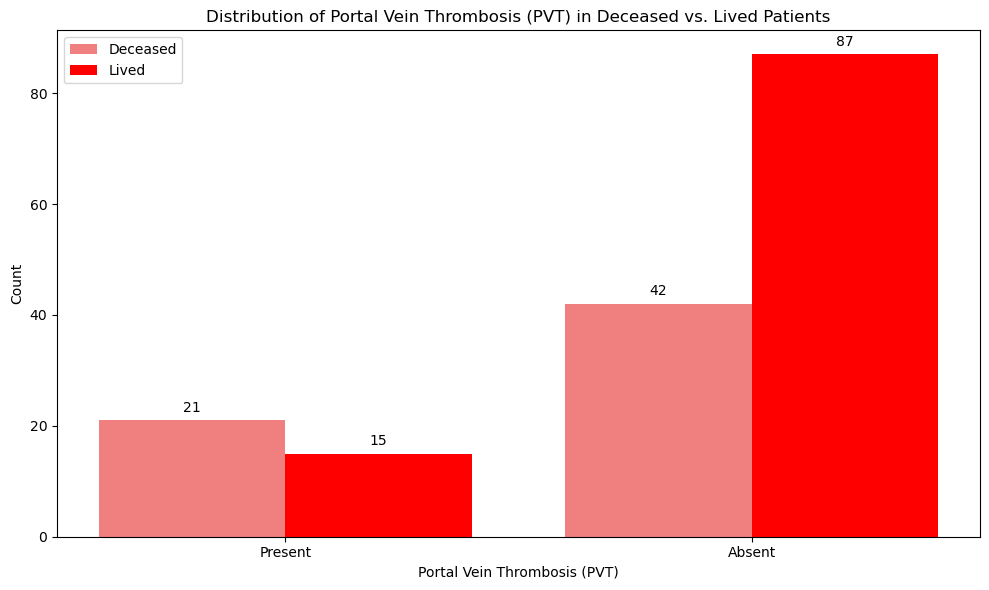

In [36]:


# Count the occurrences of people who die and live with and without Portal Vein Thrombosis (PVT)
pvt_die = df[(df['PVT'] == 1) & (df['Class'] == 0)]['PVT'].count()
no_pvt_die = df[(df['PVT'] == 0) & (df['Class'] == 0)]['PVT'].count()
pvt_live = df[(df['PVT'] == 1) & (df['Class'] == 1)]['PVT'].count()
no_pvt_live = df[(df['PVT'] == 0) & (df['Class'] == 1)]['PVT'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [pvt_die, no_pvt_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [pvt_live, no_pvt_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Portal Vein Thrombosis (PVT) in Deceased vs. Lived Patients')
plt.xlabel('Portal Vein Thrombosis (PVT)')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


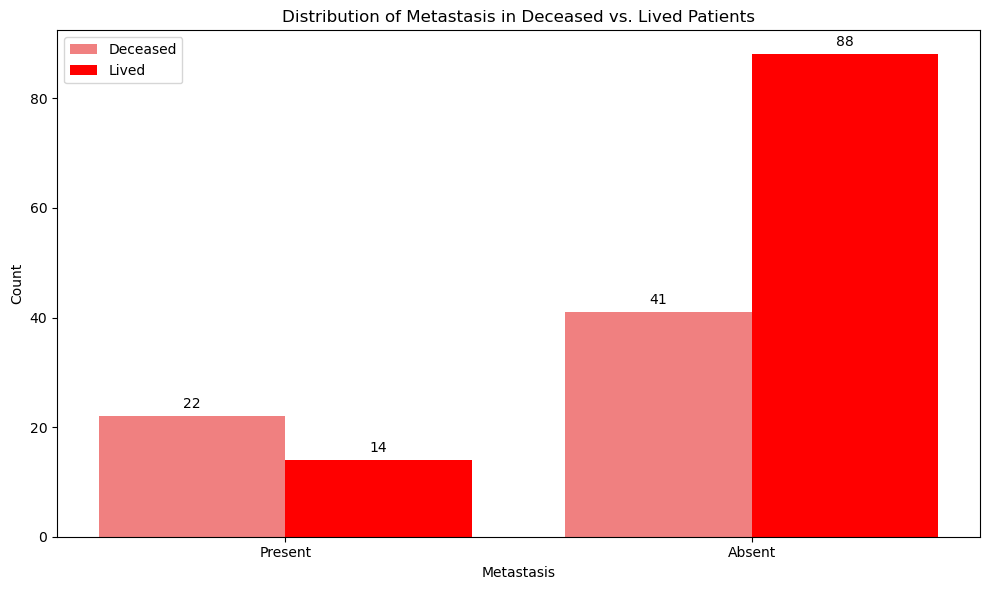

In [37]:


# Count the occurrences of people who die and live with and without Metastasis
meta_die = df[(df['Metastasis'] == 1) & (df['Class'] == 0)]['Metastasis'].count()
no_meta_die = df[(df['Metastasis'] == 0) & (df['Class'] == 0)]['Metastasis'].count()
meta_live = df[(df['Metastasis'] == 1) & (df['Class'] == 1)]['Metastasis'].count()
no_meta_live = df[(df['Metastasis'] == 0) & (df['Class'] == 1)]['Metastasis'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [meta_die, no_meta_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [meta_live, no_meta_live], width=0.4, color=['red'], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Metastasis in Deceased vs. Lived Patients')
plt.xlabel('Metastasis')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


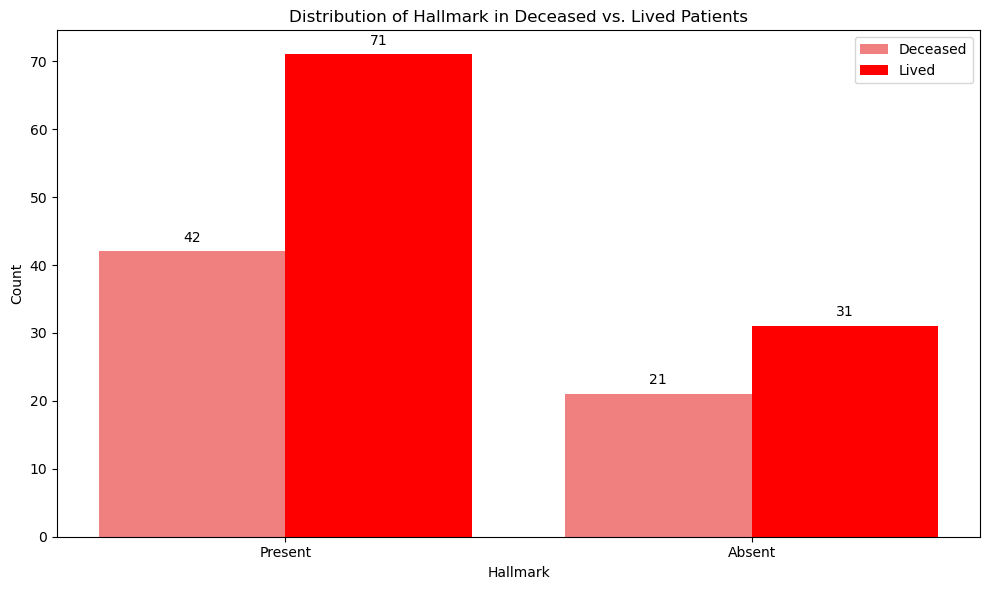

In [38]:


# Count the occurrences of people who die and live with and without Hallmark
hallmark_die = df[(df['Hallmark'] == 1) & (df['Class'] == 0)]['Hallmark'].count()
no_hallmark_die = df[(df['Hallmark'] == 0) & (df['Class'] == 0)]['Hallmark'].count()
hallmark_live = df[(df['Hallmark'] == 1) & (df['Class'] == 1)]['Hallmark'].count()
no_hallmark_live = df[(df['Hallmark'] == 0) & (df['Class'] == 1)]['Hallmark'].count()

# Plotting a bar chart
plt.figure(figsize=(10, 6))

# Deceased patients
bars1 = plt.bar([0, 1], [hallmark_die, no_hallmark_die], width=0.4, color=['lightcoral'], label='Deceased')
# Patients who lived
bars2 = plt.bar([0.4, 1.4], [hallmark_live, no_hallmark_live], width=0.4, color=['red',], label='Lived')

# Adding labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.title('Distribution of Hallmark in Deceased vs. Lived Patients')
plt.xlabel('Hallmark')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['Present', 'Absent'])
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

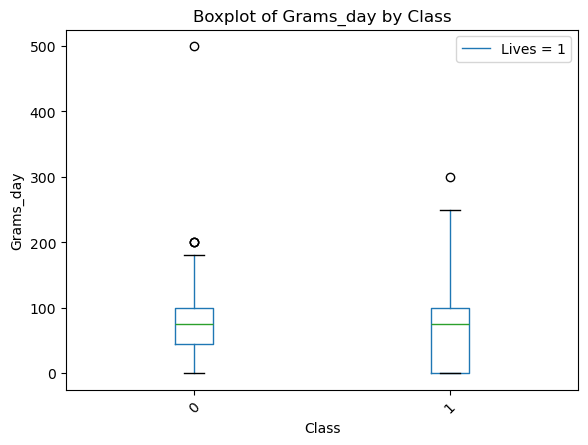

In [39]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Grams_day', by='Class', grid=False)
plt.title('Boxplot of Grams_day by Class')
plt.xlabel('Class')
plt.ylabel('Grams_day')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()

<Figure size 800x600 with 0 Axes>

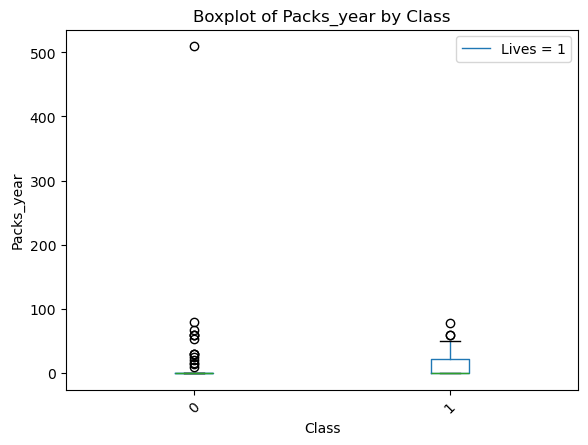

In [40]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Packs_year', by='Class', grid=False)
plt.title('Boxplot of Packs_year by Class')
plt.xlabel('Class')
plt.ylabel('Packs_year')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 1000x600 with 0 Axes>

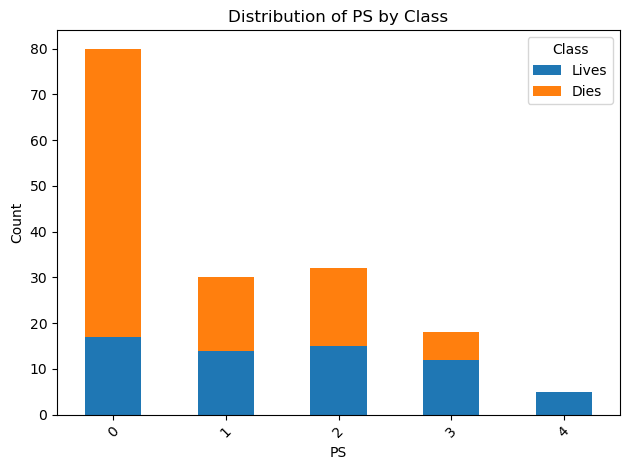

In [41]:

plt.figure(figsize=(10, 6))
df.groupby(['PS', 'Class']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Distribution of PS by Class')
plt.xlabel('PS')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Class', labels=['Lives', 'Dies'])
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

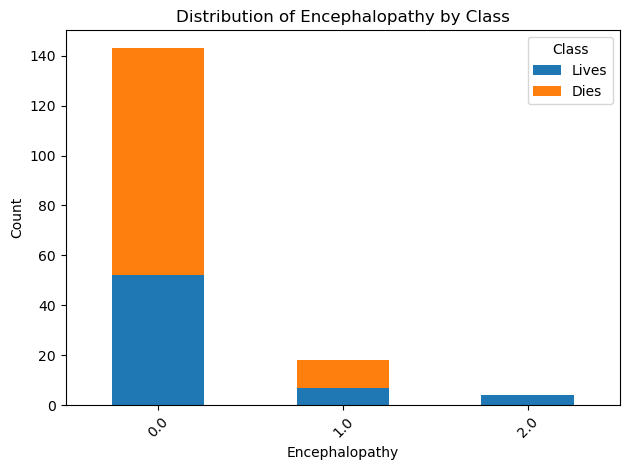

In [42]:
plt.figure(figsize=(10, 6))
df.groupby(['Encephalopathy', 'Class']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Distribution of Encephalopathy by Class')
plt.xlabel('Encephalopathy')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Class', labels=['Lives', 'Dies'])
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

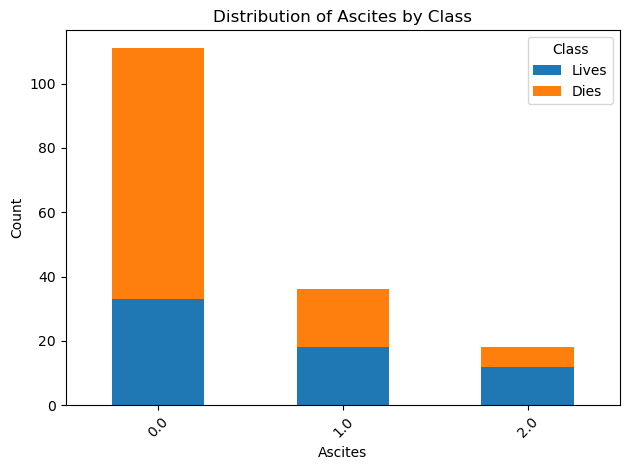

In [74]:
plt.figure(figsize=(10, 6))
df.groupby(['Ascites', 'Class']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Distribution of Ascites by Class')
plt.xlabel('Ascites')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Class', labels=['Lives', 'Dies'])
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

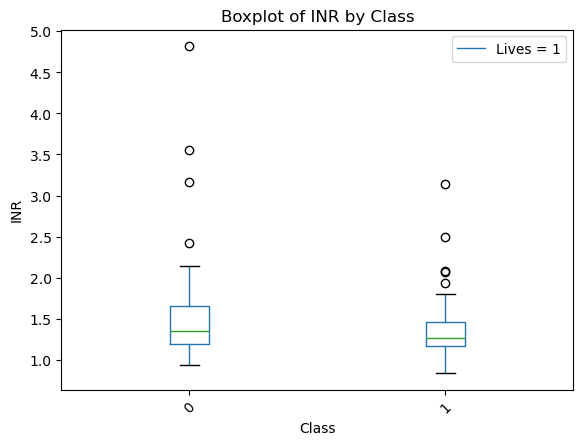

In [43]:

plt.figure(figsize=(8, 6))
df.boxplot(column='INR', by='Class', grid=False)
plt.title('Boxplot of INR by Class')
plt.xlabel('Class')
plt.ylabel('INR')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

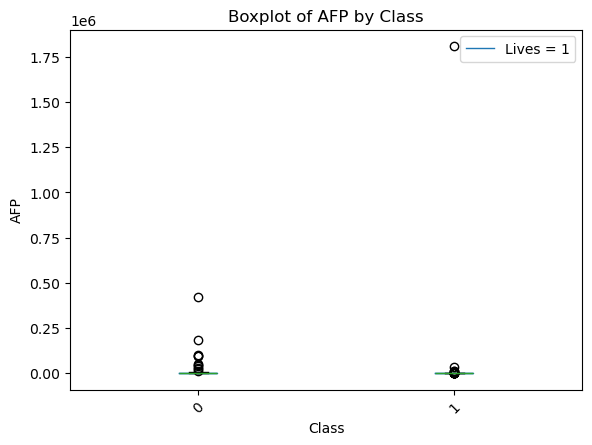

In [44]:

plt.figure(figsize=(8, 6))
df.boxplot(column='AFP', by='Class', grid=False)
plt.title('Boxplot of AFP by Class')
plt.xlabel('Class')
plt.ylabel('AFP')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

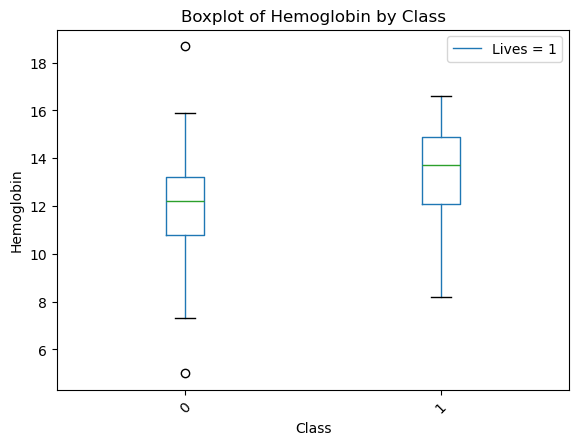

In [45]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Hemoglobin', by='Class', grid=False)
plt.title('Boxplot of Hemoglobin by Class')
plt.xlabel('Class')
plt.ylabel('Hemoglobin')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

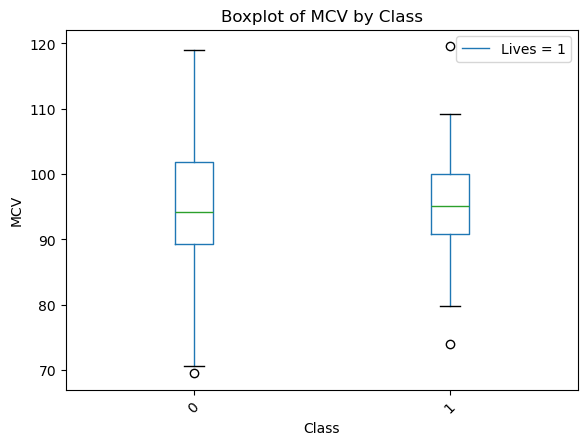

In [46]:

plt.figure(figsize=(8, 6))
df.boxplot(column='MCV', by='Class', grid=False)
plt.title('Boxplot of MCV by Class')
plt.xlabel('Class')
plt.ylabel('MCV')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

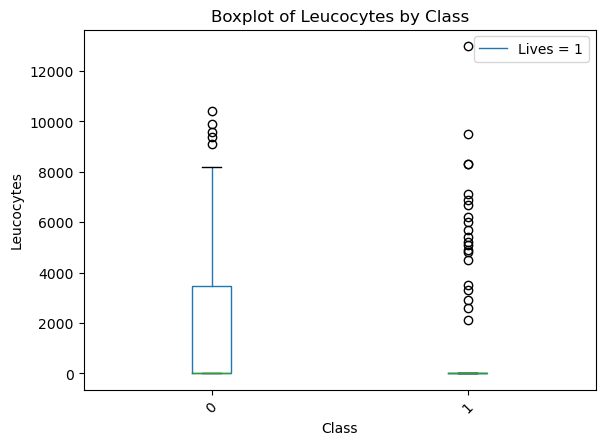

In [47]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Leucocytes', by='Class', grid=False)
plt.title('Boxplot of Leucocytes by Class')
plt.xlabel('Class')
plt.ylabel('Leucocytes')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

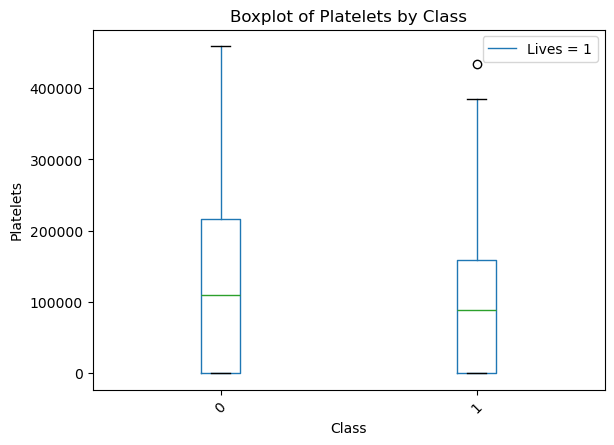

In [48]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Platelets', by='Class', grid=False)
plt.title('Boxplot of Platelets by Class')
plt.xlabel('Class')
plt.ylabel('Platelets')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

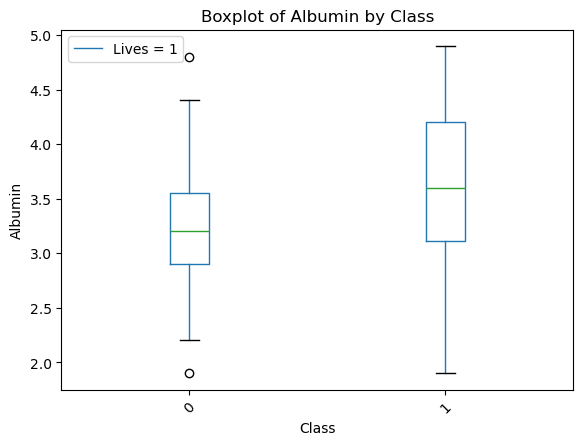

In [49]:

plt.figure(figsize=(8, 6))
df.boxplot(column=' Albumin', by='Class', grid=False)
plt.title('Boxplot of Albumin by Class')
plt.xlabel('Class')
plt.ylabel('Albumin')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()



<Figure size 800x600 with 0 Axes>

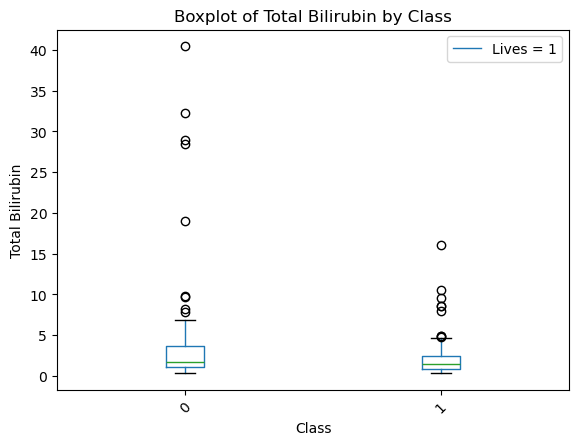

In [50]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Total_Bil', by='Class', grid=False)
plt.title('Boxplot of Total Bilirubin by Class')
plt.xlabel('Class')
plt.ylabel('Total Bilirubin')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

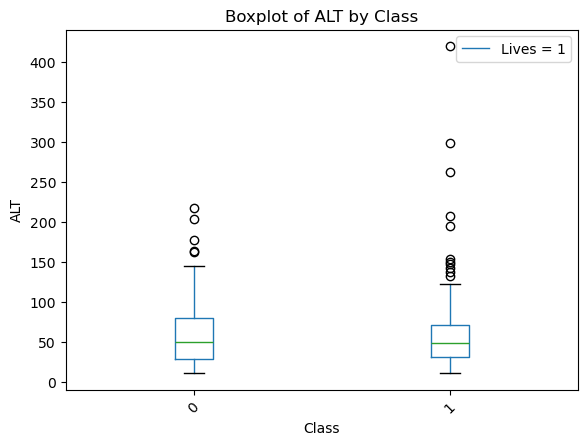

In [51]:

plt.figure(figsize=(8, 6))
df.boxplot(column='ALT', by='Class', grid=False)
plt.title('Boxplot of ALT by Class')
plt.xlabel('Class')
plt.ylabel('ALT')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

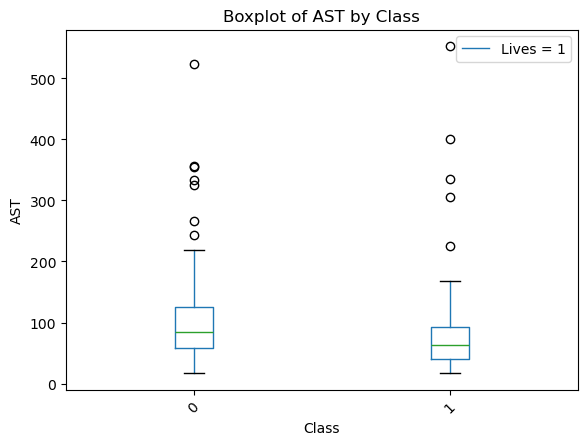

In [52]:

plt.figure(figsize=(8, 6))
df.boxplot(column='AST', by='Class', grid=False)
plt.title('Boxplot of AST by Class')
plt.xlabel('Class')
plt.ylabel('AST')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

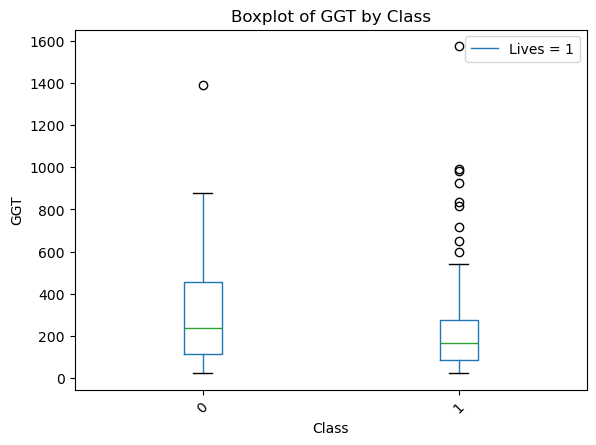

In [53]:

plt.figure(figsize=(8, 6))
df.boxplot(column='GGT', by='Class', grid=False)
plt.title('Boxplot of GGT by Class')
plt.xlabel('Class')
plt.ylabel('GGT')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

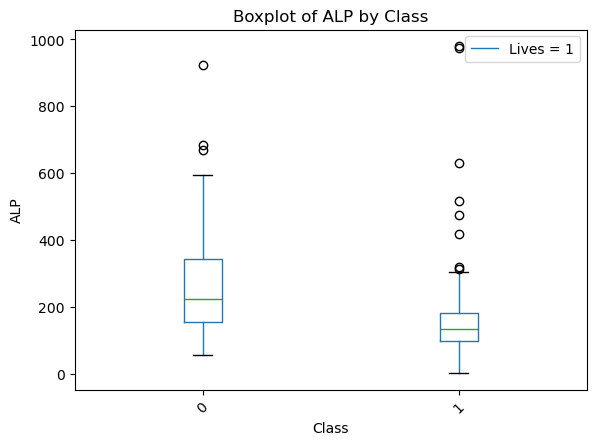

In [54]:

plt.figure(figsize=(8, 6))
df.boxplot(column='ALP', by='Class', grid=False)
plt.title('Boxplot of ALP by Class')
plt.xlabel('Class')
plt.ylabel('ALP')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

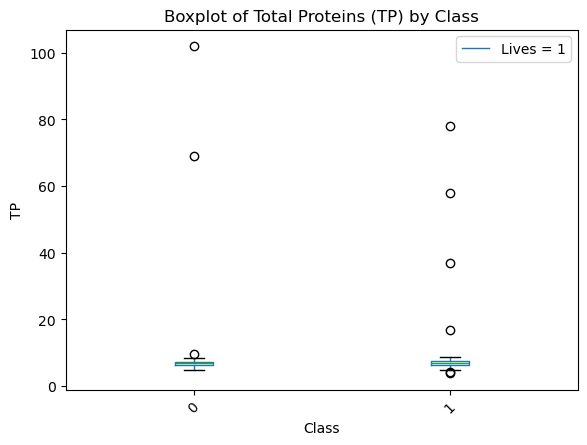

In [55]:

plt.figure(figsize=(8, 6))
df.boxplot(column='TP', by='Class', grid=False)
plt.title('Boxplot of Total Proteins (TP) by Class')
plt.xlabel('Class')
plt.ylabel('TP')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

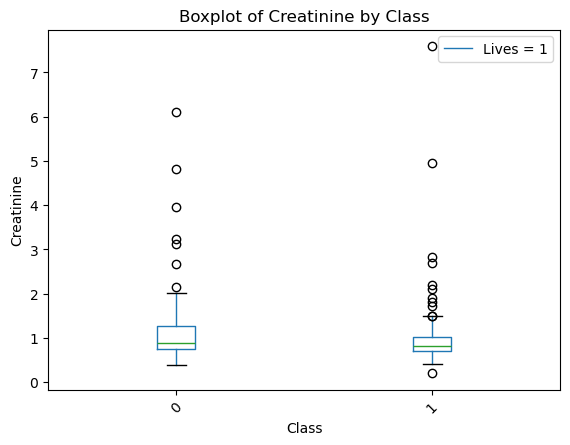

In [56]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Creatinine', by='Class', grid=False)
plt.title('Boxplot of Creatinine by Class')
plt.xlabel('Class')
plt.ylabel('Creatinine')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

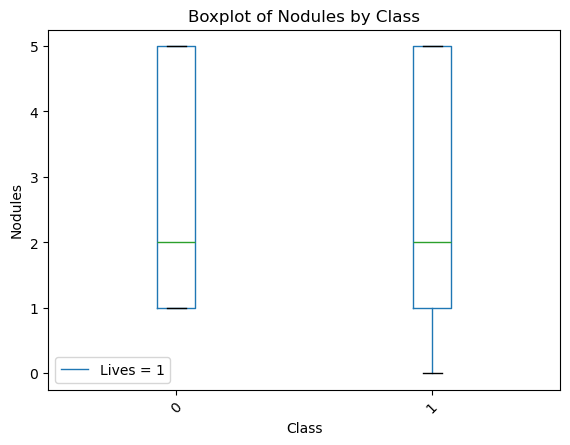

In [57]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Nodules', by='Class', grid=False)
plt.title('Boxplot of Nodules by Class')
plt.xlabel('Class')
plt.ylabel('Nodules')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

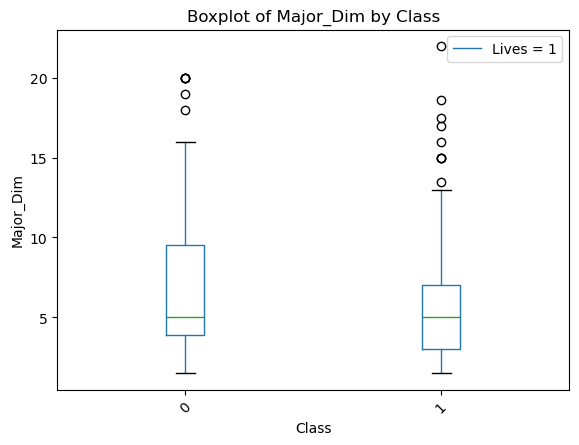

In [58]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Major_Dim', by='Class', grid=False)
plt.title('Boxplot of Major_Dim by Class')
plt.xlabel('Class')
plt.ylabel('Major_Dim')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

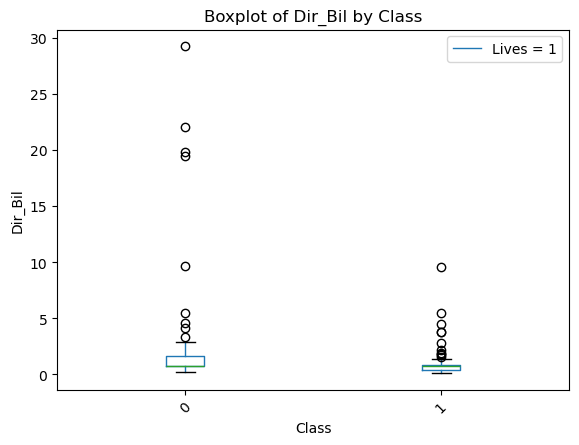

In [59]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Dir_Bil', by='Class', grid=False)
plt.title('Boxplot of Dir_Bil by Class')
plt.xlabel('Class')
plt.ylabel('Dir_Bil')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

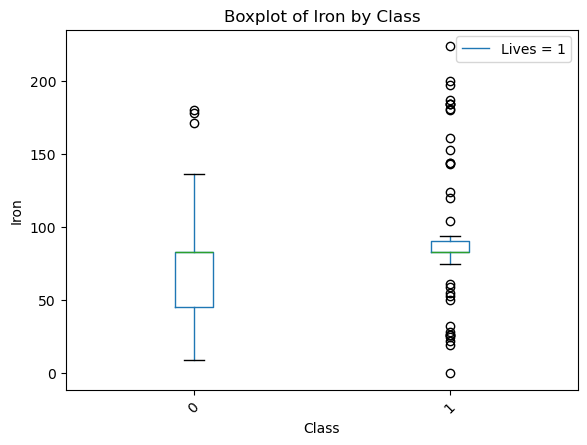

In [60]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Iron', by='Class', grid=False)
plt.title('Boxplot of Iron by Class')
plt.xlabel('Class')
plt.ylabel('Iron')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

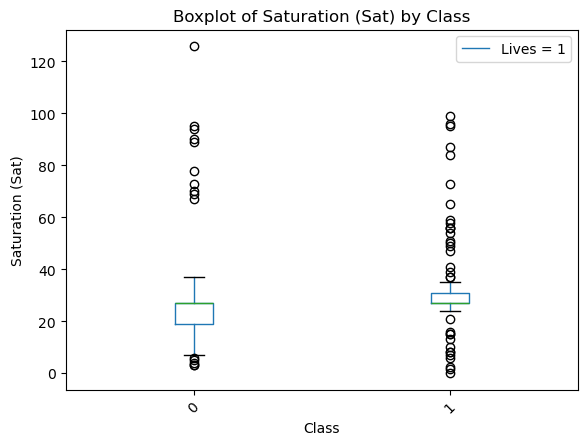

In [61]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Sat', by='Class', grid=False)
plt.title('Boxplot of Saturation (Sat) by Class')
plt.xlabel('Class')
plt.ylabel('Saturation (Sat)')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


<Figure size 800x600 with 0 Axes>

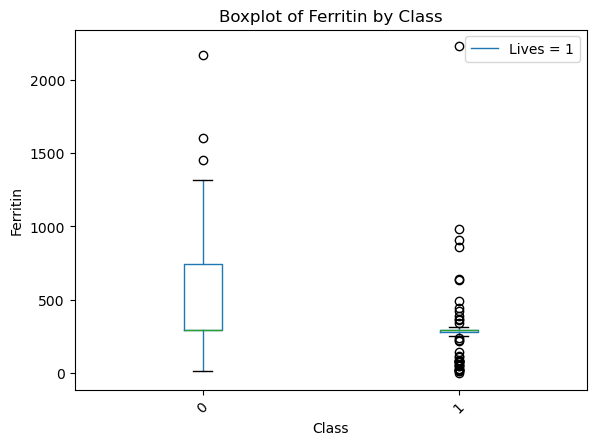

In [62]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Ferritin', by='Class', grid=False)
plt.title('Boxplot of Ferritin by Class')
plt.xlabel('Class')
plt.ylabel('Ferritin')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(labels=['Lives = 1'])
plt.show()


Através do gráficos acima, analisamos cada uma das diferentes variáveis para avaliar a sua importância na determinação da sobrevivência de pacientes com carcinoma hepatocelular.

A qualidade de uma variável é medida de acordo com a sua implicação na sobrevivência dos pacientes que a apresentam.
As seguintes variáveis foram eliminadas:
- Symptoms - Com sintomas a distinção entre pacientes que vivem e morrem é menor que 10%
- Diabetes - Com sintomas a distinção entre pacientes que vivem e morrem é menor que 10%
- HbeAg - Como apenas 1 paciente de 165 apresenta esta variável positiva, esta não é fiavél
- HIV - Como apenas 3 pacientes de 165 apresentam esta variável positiva, esta não é fiavél
- Endemic - Como apenas 10 pacientes de 165 apresentam esta variável positiva, esta não é fiavél
- Hemochro - Como apenas 7 pacientes de 165 apresentam esta variável positiva, esta não é fiavél
- HCVAb - A diferença do número de pacientes que vive/morre, quando esta variável está presente, não é significativa
- NASH - Como apenas 8 pacientes de 165 apresentam esta variável positiva, esta não é fiavél
- Grams_day - Não existe diferença significativa de valores nos pacientes que vivem/morrem
- INR - Não existe diferença significativa de valores nos pacientes que vivem/morrem
- Total_Bil - Não existe diferença significativa de valores nos pacientes que vivem/morrem
- TP - Não existe diferença significativa de valores nos pacientes que vivem/morrem



**Avaliação da precisão dos modelos antes e depois da remoção de variáveis:**

**Notas Importantes para a análise e compreensão dos resultados:**

- Alta accuracy: O modelo está geralmente correto, no entanto podem existir exceções em alguns casos específicos. 
- Alta precision, mas baixo recall: O modelo prevê muitos negativos, resultando em poucos falsos positivos, mas muitos falsos negativos.
- Alto recall, mas baixa precision: O modelo prevê muitos positivos, resultando em poucos falsos negativos, mas muitos falsos positivos.
- Alta especificidade: O modelo identifica bem os negativos verdadeiros, sendo eficaz a evitar falsos positivos.

**Precision, Recall e F1-score:**
Estes parâmetros são calculados para cada classe (0 - Morte e 1 - Vida) e ajudam a entender o desempenho do modelo de forma mais detalhada.

Precision = 0.59: Significa que, de todas as previsões que o modelo fez de classe 0, um total de 59% eram realmente de classe 0.

Recall = 0.59: Significa que, de todas as ocorrências reais da classe 0, o modelo identificou corretamente 59%.

F1-score = 0.59: É a média de precision e recall. Um F1-score de 0.59 indica um equilíbrio moderado entre precisão e revocação para a classe 0.

Macro avg: É a média simples dos parâmetros (precision, recall, F1-score) de cada classe, sem levar em conta o número de ocorrências em cada classe.

Weighted avg: É a média ponderada dos parâmetros, levando em conta o número de ocorrências em cada classe.

Support: É o número de ocorrências reais de cada classe no conjunto de dados de teste. Indica quantas ocorrências de cada classe estão presentes nos dados de teste e serve como um contexto importante para avaliar a precisão dos parâmetros de desempenho do modelo.

**Matriz de confusão:**

A análise da matriz de confusão é fundamental para entender o desempenho do modelo de classificação a um nível mais detalhado. Esta matriz oferece uma representação visual das previsões do modelo em comparação com os valores reais. 
Para um problema de classificação binária, a matriz de confusão é uma tabela 2x2 que mostra: 
- True Positives (TP): O modelo previu positivo e o valor real é positivo.
- True Negatives (TN): O modelo previu negativo e o valor real é negativo.
- False Positives (FP): O modelo previu positivo e o valor real é negativo (também conhecido como erro Tipo I).
- False Negatives (FN): O modelo previu negativo e o valor real é positivo (também conhecido como erro Tipo II).

**Modelos de Machine Learning:**

Decision Tree:

Começa com todo o conjunto de dados completo no nó raiz. Em cada nó de decisão, divide os dados com base numa caraterística que melhor separe os dados. De seguida, continua a dividir os dados em cada nó, criando ramificações para resultados diferentes. Este processo repete-se até chegar às folhas. Quando a árvore chega a uma folha, faz-se uma previsão com base na classe majoritária (para classificação) ou no valor médio (para regressão) dos dados nessa folha.

Vantagens:
    Fácil de compreender: Representação visual simples.
    Lida com dados não lineares: Pode gerir relações complexas entre características.

Desvantagens:
    Sobreajuste: Pode tornar-se demasiado complexo e específico para os dados de treino.
    Instabilidade: Pequenas alterações nos dados podem dar origem a árvores diferentes.

KNN (K-Nearest Neighbors):

Fase de treino: O algoritmo não treina explicitamente um modelo. Em vez disso, armazena todos os dados de treino.

Fase de previsão: Para fazer uma previsão para um novo ponto de dados, o algoritmo começa por calcular a distância entre o novo ponto de dados e todos os pontos no conjunto de dados de treino. As métricas de distância comuns incluem a distância euclidiana (distância em linha reta). De seguida, identifica os 'k' pontos de dados mais próximos (vizinhos) do novo ponto de dados. Para classificação, o algoritmo analisa os rótulos desses 'k' vizinhos e atribui o rótulo mais comum ao novo ponto de dados. Por fim, para a regressão, calcula a média dos valores dos 'k' vizinhos mais próximos para determinar a previsão.

Vantagens:
    Simples e intuitivo: Fácil de entender e implementar.
    Sem fase de formação: Rápido a implementar, uma vez que não envolve um processo de formação.

Desvantagens:
    Computacionalmente intenso: Lento para grandes conjuntos de dados porque calcula a distância a todos os pontos de treino para cada previsão.
    Sensível a características irrelevantes: O desempenho pode se degradar se existirem muitas características irrelevantes ou redundantes.

Logistic Regression:

Começa com features de entrada. De seguida, combina estas características utilizando alguns pesos:
z = w0 + w1 × feature1 + w2 × feature2 + ... + wn × featuren, em que w0 é uma constante (interceção) e w1,w2,...,wn são os pesos para cada feature.
Passa esta combinação por uma função sigmoide para obter uma probabilidade entre 0 e 1. Por fim, compara a probabilidade com um limiar (normalmente 0,5), se essa probabilidade for ≥ 0,5, prevê o resultado como 1, caso contrário prevê como 0.  

Vantagens:
    Simples: Fácil de utilizar e compreender.
    Eficiente: Rápido de formar e prever.

Desvantagens:
    Pressuposto linear: Assume uma relação linear entre as entradas e as probabilidades logarítmicas do resultado.
    Sensível a valores atípicos: Pode ser afetado por valores extremos.

SVM (Support Vector Machine):

A ideia central do SVM é encontrar a melhor reta (em 2D), plano (em 3D) ou hiperplano (em dimensões superiores) que separa os dados em duas classes. Este hiperplano atua como o limite de decisão. O objetivo do SVM é posicionar este hiperplano de forma a maximizar a distância (margem) entre ele e os pontos de dados mais próximos de cada classe. Esses pontos mais próximos são chamados de vetores de suporte. Os vetores de suporte são os elementos críticos do conjunto de treino que estão mais próximos do hiperplano. Eles definem a posição e a orientação do hiperplano.

Vantagens:
    Eficaz em dimensões elevadas: Funciona bem com um grande número de características.
    Versátil: Pode ser utilizado com diferentes funções de kernel para lidar com dados não lineares.
    Resistente a sobreajustes: Especialmente eficaz com uma afinação adequada.

Desvantagens:
    Computacionalmente intenso: Pode ser lento para grandes conjuntos de dados.
    Requer uma afinação cuidadosa: Os parâmetros e a escolha do kernel devem ser cuidadosamente selecionados.

Gradient Boosting:

Começa  com uma previsão inicial, para a regressão, pode ser a média dos valores-alvo, para a classificação, pode ser a probabilidade de log. Melhora o modelo adicionando um novo aprendiz fraco (geralmente uma árvore de decisão) em cada iteração. Cada nova árvore é treinada para corrigir os erros do conjunto combinado de árvores anteriores. Em cada iteração, calcular a diferença entre os valores-alvo reais e as previsões actuais (estas diferenças são designadas por resíduos). De seguida, treina uma nova árvore de decisão para prever esses resíduos, esta árvore concentra-se nas partes dos dados que o modelo atual está a prever mal. Adiciona a nova árvore ao modelo com um determinado peso (taxa de aprendizagem), isto actualiza a previsão geral. Repete o processo por um número fixo de iterações ou até que o desempenho do modelo pare de melhorar.

Vantagens:
    Alto desempenho: Frequentemente alcança melhor precisão do que os modelos individuais.
    Flexibilidade: Pode ser usado para uma variedade de tarefas e personalizado com diferentes funções de perda e aprendizes fracos.
    Importância das características: Fornece informações sobre quais características são mais importantes para as previsões.

Desvantagens:
    Computacionalmente intenso: O treinamento pode ser lento, especialmente com um grande número de árvores.
    Propenso a sobreajuste: Requer um ajuste cuidadoso dos parâmetros (como o número de árvores, a taxa de aprendizagem e a profundidade da árvore).

/home/carolina/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                       Accuracy
Decision Tree              0.64
KNN                        0.58
Logistic\n Regression      0.68
SVM                        0.62
Gradient\n Boosting        0.64


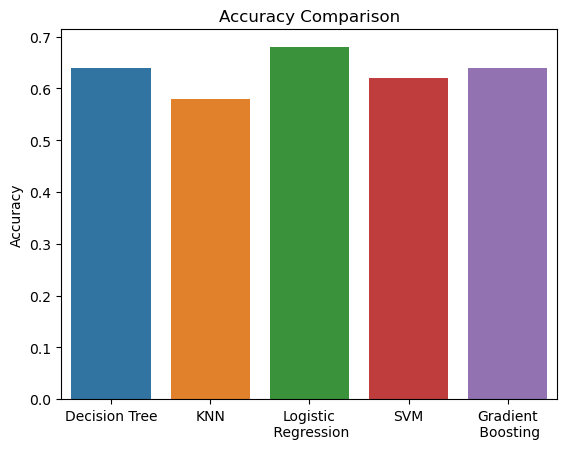

Classification Report for Decision Tree:
               precision    recall  f1-score  support
0              0.583333  0.636364  0.608696    22.00
1              0.692308  0.642857  0.666667    28.00
accuracy       0.640000  0.640000  0.640000     0.64
macro avg      0.637821  0.639610  0.637681    50.00
weighted avg   0.644359  0.640000  0.641159    50.00
Classification Report for KNN:
               precision    recall  f1-score  support
0              0.533333  0.363636  0.432432    22.00
1              0.600000  0.750000  0.666667    28.00
accuracy       0.580000  0.580000  0.580000     0.58
macro avg      0.566667  0.556818  0.549550    50.00
weighted avg   0.570667  0.580000  0.563604    50.00
Classification Report for Logistic
 Regression:
               precision    recall  f1-score  support
0                 0.650  0.590909  0.619048    22.00
1                 0.700  0.750000  0.724138    28.00
accuracy          0.680  0.680000  0.680000     0.68
macro avg         0.675  0.67

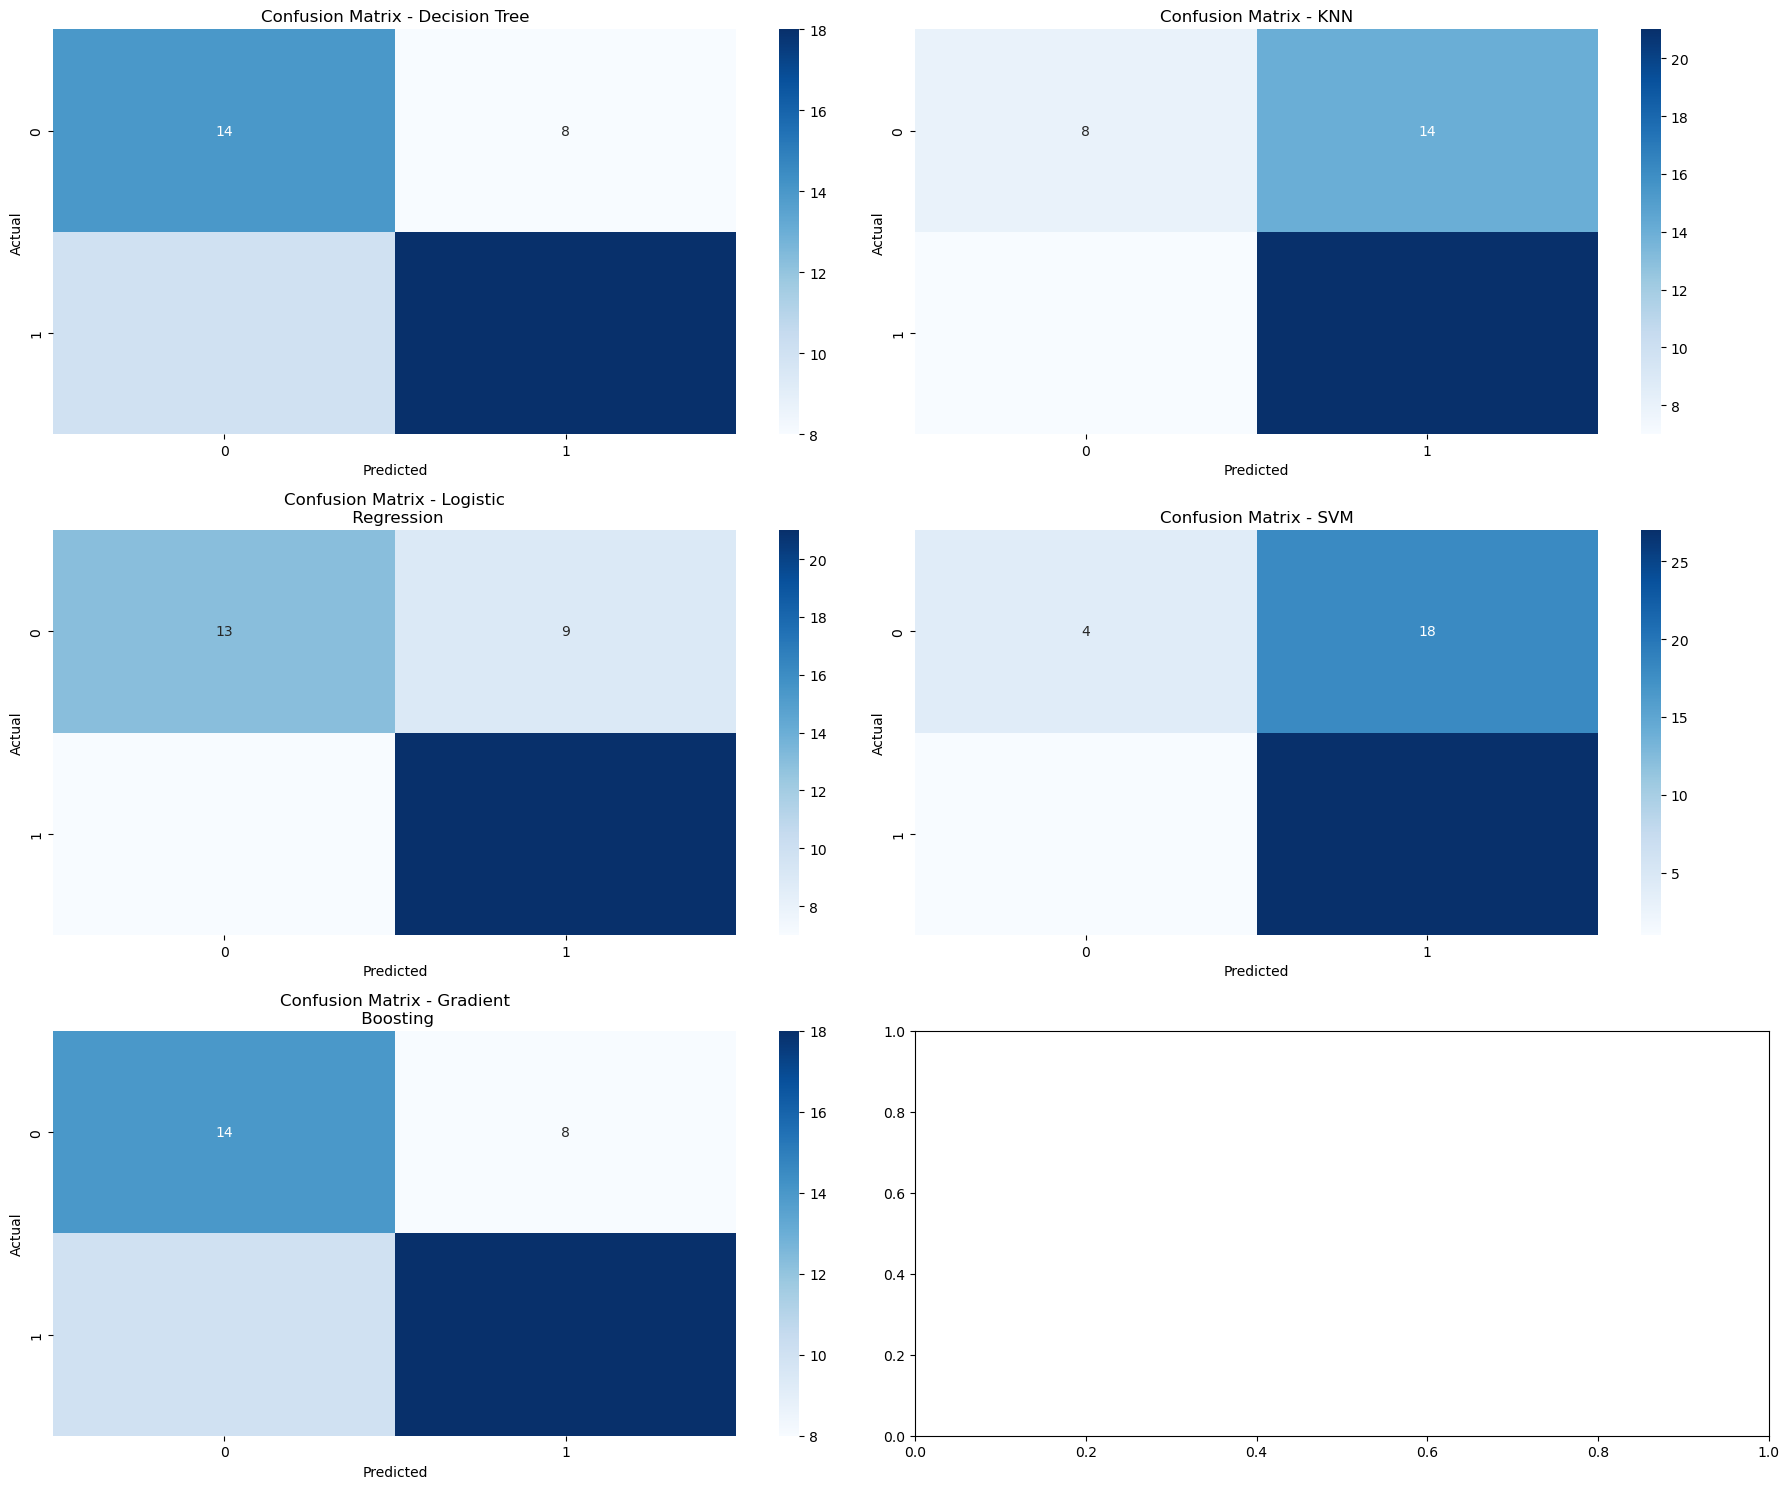

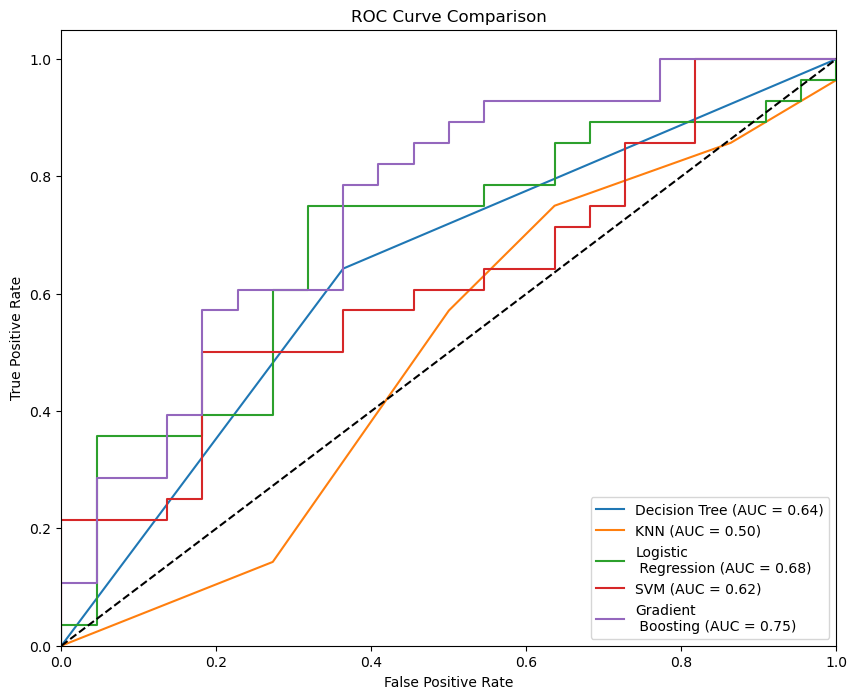

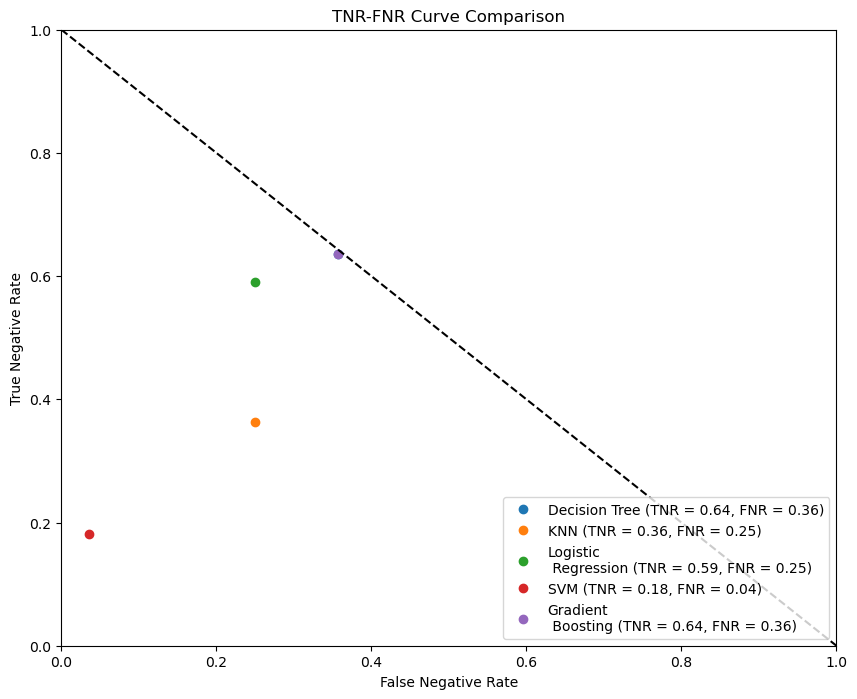

In [63]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


X = df.drop(columns=['Class'])
y = df['Class']

# Identificar colunas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Aplicar One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols)

# Dividir o dataset em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Garantir que os dados são contíguos em memória
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

# Criar os modelos
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic\n Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient\n Boosting': GradientBoostingClassifier(random_state=42),
}
# Treinar e avaliar os modelos
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob) if y_prob is not None else (None, None, None)
    roc_auc = auc(fpr, tpr) if y_prob is not None else None
    
    # Calculando TNR e FNR
    tn, fp, fn, tp = conf_matrix.ravel()
    tnr = tn / (tn + fp)  # True Negative Rate
    fnr = fn / (fn + tp)  # False Negative Rate
    
    # TNR-FNR curve
    tnr_fnr = (tnr, fnr)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'conf_matrix': conf_matrix,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'tnr_fnr': tnr_fnr,
    }

# Comparação de Acurácia
accuracy_data = {name: results[name]['accuracy'] for name in results.keys()}
accuracy_df = pd.DataFrame.from_dict(accuracy_data, orient='index', columns=['Accuracy'])
print(accuracy_df)

# Plotting accuracy
sns.barplot(x=accuracy_df.index, y='Accuracy', data=accuracy_df)
plt.title('Accuracy Comparison')
plt.show()

# Comparação do Relatório de Classificação
classification_reports = {name: pd.DataFrame(results[name]['report']).transpose() for name in results.keys()}

for name, report in classification_reports.items():
    print(f'Classification Report for {name}:\n', report)

# Matriz de Confusão
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['conf_matrix'], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC Curve e AUC
plt.figure(figsize=(10, 8))

for name, result in results.items():
    if result['roc_auc'] is not None:
        plt.plot(result['fpr'], result['tpr'], label=f'{name} (AUC = {result["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

# TNR-FNR Curve
plt.figure(figsize=(10, 8))

for name, result in results.items():
    tnr, fnr = result['tnr_fnr']
    plt.plot(fnr, tnr, 'o', label=f'{name} (TNR = {tnr:.2f}, FNR = {fnr:.2f})')

plt.plot([0, 1], [1, 0], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Negative Rate')
plt.ylabel('True Negative Rate')
plt.title('TNR-FNR Curve Comparison')
plt.legend(loc='lower right')
plt.show()


**Sem as variáveis onde a presença/ausência desse parâmetro afeta menos de 10% da amostra pacientes - 'HBeAg', 'HIV', 'Endemic', 'Hemochro', 'NASH':**

/home/carolina/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                       Accuracy
Decision Tree              0.62
KNN                        0.58
Logistic\n Regression      0.68
SVM                        0.62
Gradient\n Boosting        0.66


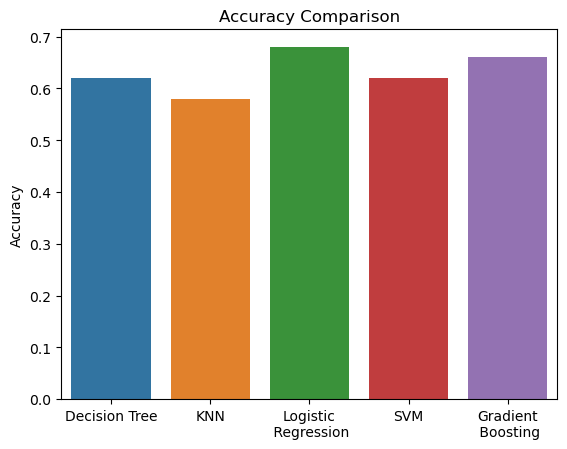

Classification Report for Decision Tree:
               precision    recall  f1-score  support
0              0.578947  0.500000  0.536585    22.00
1              0.645161  0.714286  0.677966    28.00
accuracy       0.620000  0.620000  0.620000     0.62
macro avg      0.612054  0.607143  0.607276    50.00
weighted avg   0.616027  0.620000  0.615759    50.00
Classification Report for KNN:
               precision    recall  f1-score  support
0              0.533333  0.363636  0.432432    22.00
1              0.600000  0.750000  0.666667    28.00
accuracy       0.580000  0.580000  0.580000     0.58
macro avg      0.566667  0.556818  0.549550    50.00
weighted avg   0.570667  0.580000  0.563604    50.00
Classification Report for Logistic
 Regression:
               precision    recall  f1-score  support
0              0.687500  0.500000  0.578947    22.00
1              0.676471  0.821429  0.741935    28.00
accuracy       0.680000  0.680000  0.680000     0.68
macro avg      0.681985  0.66

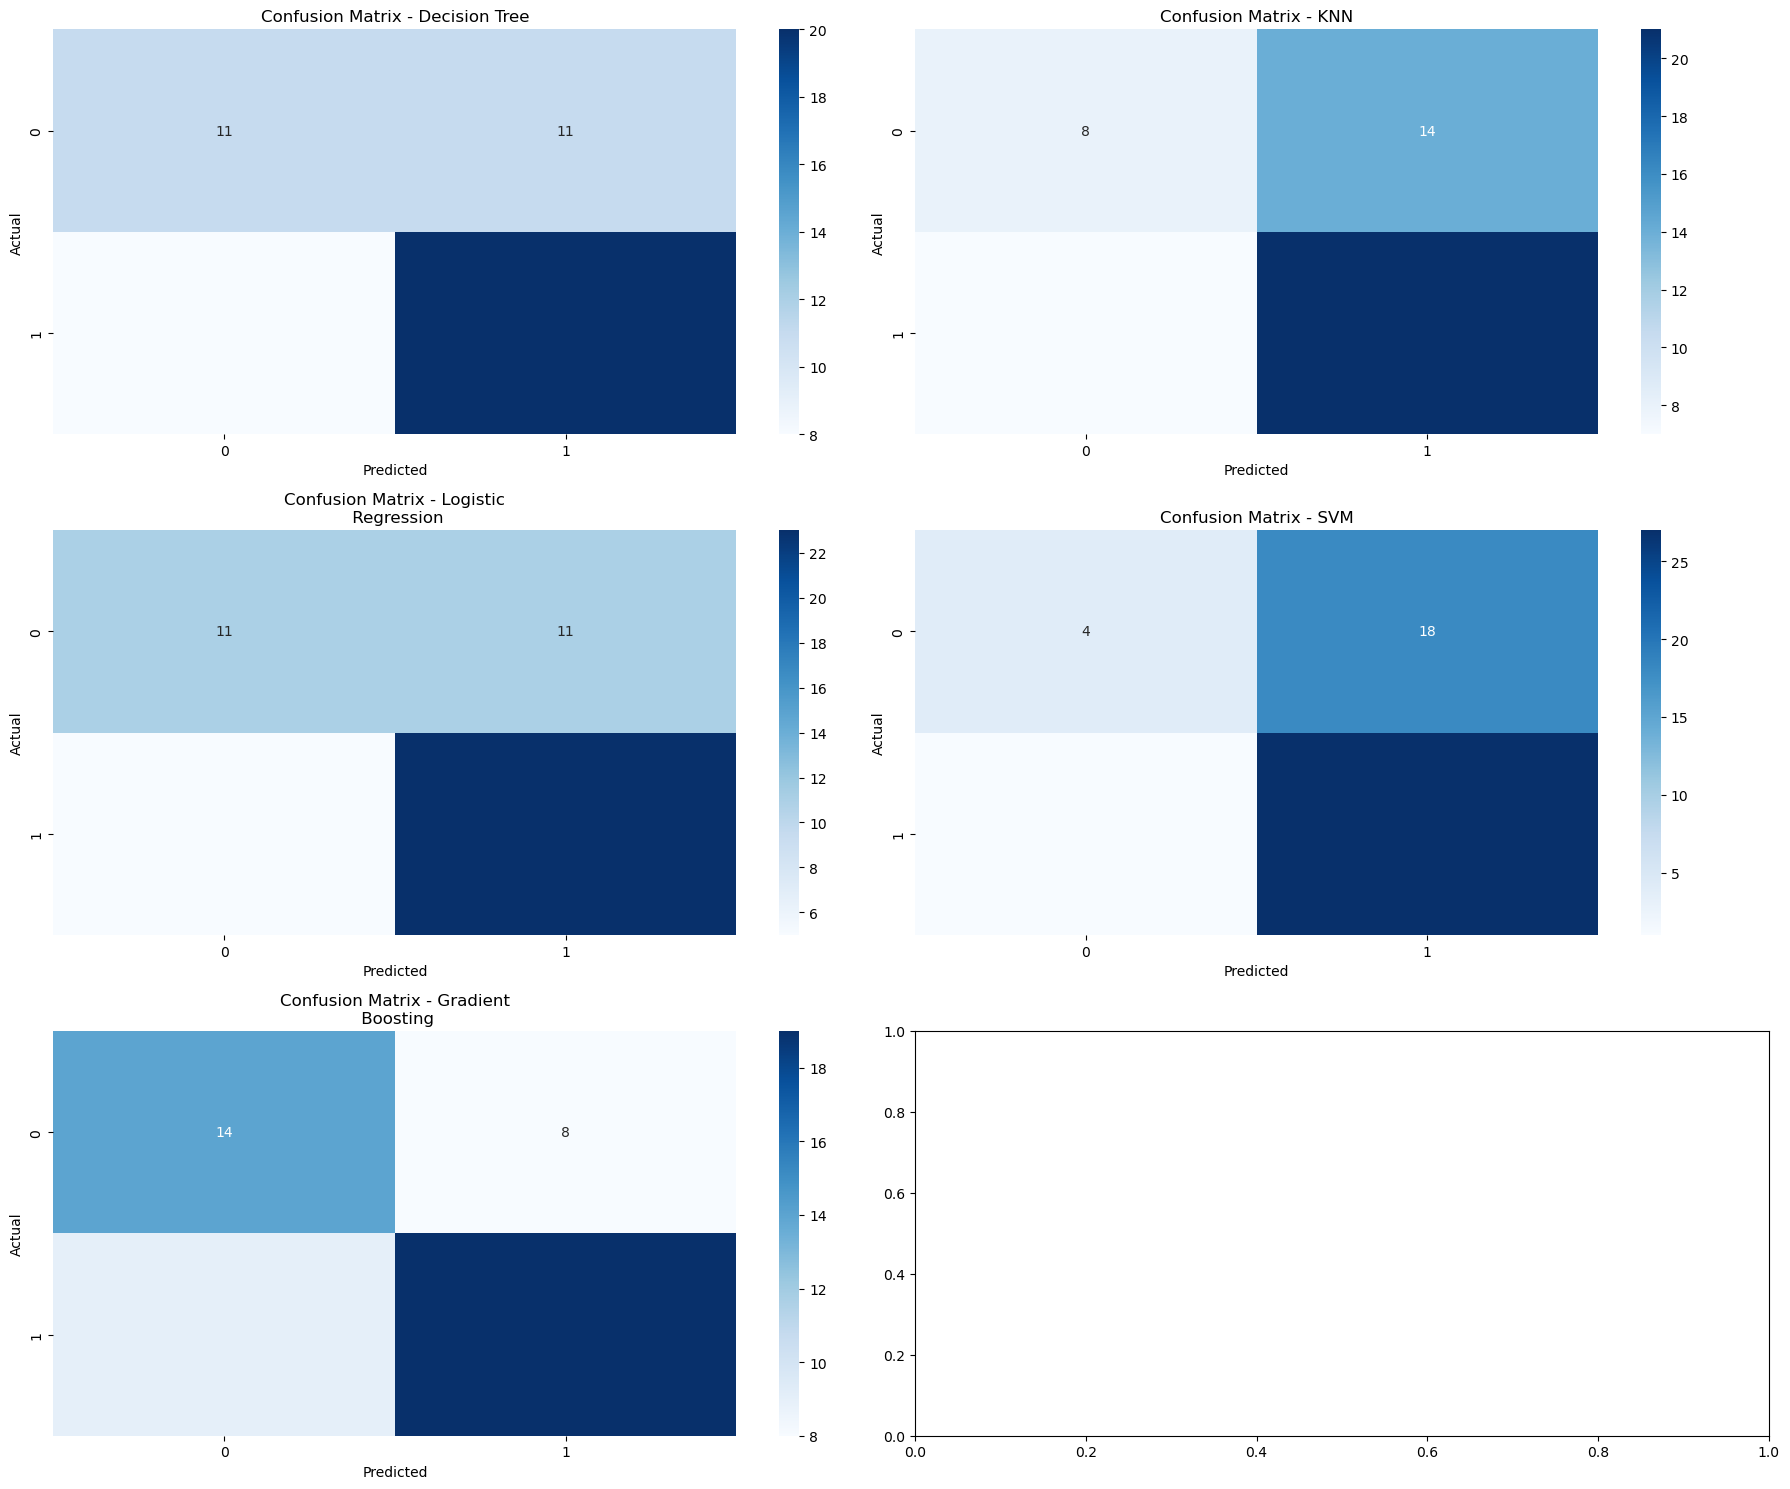

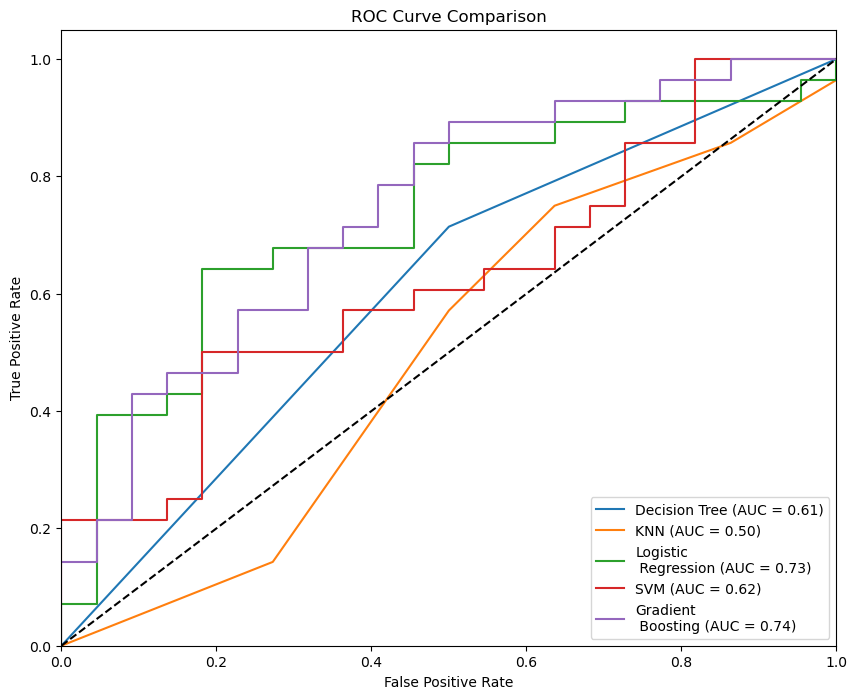

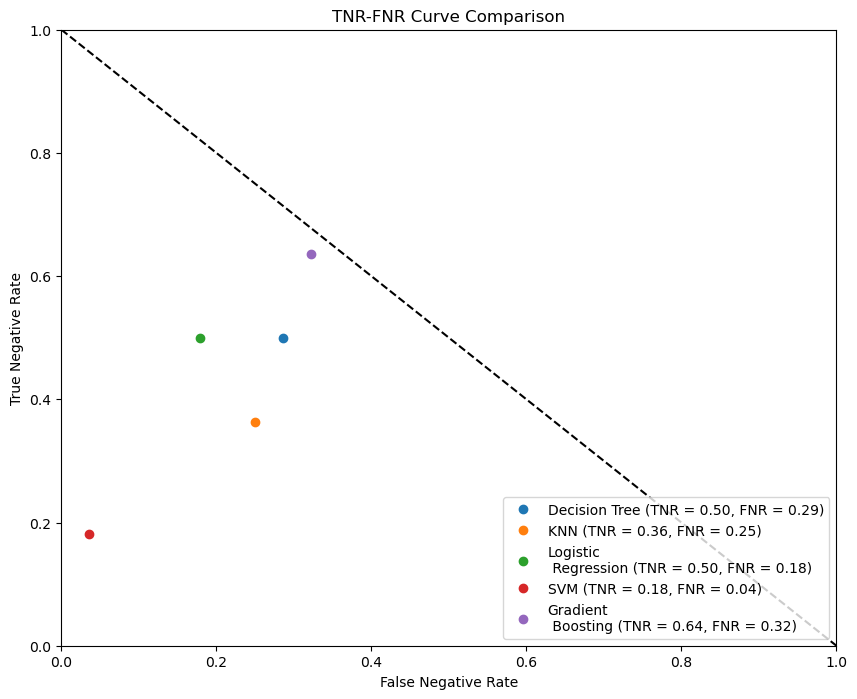

In [64]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

X = df.drop(columns=['Class','HBeAg', 'HIV', 'Endemic', 'Hemochro', 'NASH'])
y = df['Class']

# Identificar colunas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Aplicar One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols)

# Dividir o dataset em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Garantir que os dados são contíguos em memória
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

# Criar os modelos
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic\n Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient\n Boosting': GradientBoostingClassifier(random_state=42),
}
# Treinar e avaliar os modelos
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob) if y_prob is not None else (None, None, None)
    roc_auc = auc(fpr, tpr) if y_prob is not None else None
    
    # Calculando TNR e FNR
    tn, fp, fn, tp = conf_matrix.ravel()
    tnr = tn / (tn + fp)  # True Negative Rate
    fnr = fn / (fn + tp)  # False Negative Rate
    
    # TNR-FNR curve
    tnr_fnr = (tnr, fnr)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'conf_matrix': conf_matrix,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'tnr_fnr': tnr_fnr,
    }

# Comparação de Acurácia
accuracy_data = {name: results[name]['accuracy'] for name in results.keys()}
accuracy_df = pd.DataFrame.from_dict(accuracy_data, orient='index', columns=['Accuracy'])
print(accuracy_df)

# Plotting accuracy
sns.barplot(x=accuracy_df.index, y='Accuracy', data=accuracy_df)
plt.title('Accuracy Comparison')
plt.show()

# Comparação do Relatório de Classificação
classification_reports = {name: pd.DataFrame(results[name]['report']).transpose() for name in results.keys()}

for name, report in classification_reports.items():
    print(f'Classification Report for {name}:\n', report)

# Matriz de Confusão
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['conf_matrix'], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC Curve e AUC
plt.figure(figsize=(10, 8))

for name, result in results.items():
    if result['roc_auc'] is not None:
        plt.plot(result['fpr'], result['tpr'], label=f'{name} (AUC = {result["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

# TNR-FNR Curve
plt.figure(figsize=(10, 8))

for name, result in results.items():
    tnr, fnr = result['tnr_fnr']
    plt.plot(fnr, tnr, 'o', label=f'{name} (TNR = {tnr:.2f}, FNR = {fnr:.2f})')

plt.plot([0, 1], [1, 0], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Negative Rate')
plt.ylabel('True Negative Rate')
plt.title('TNR-FNR Curve Comparison')
plt.legend(loc='lower right')
plt.show()


In [65]:
df.columns

Index(['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin', 'Class'],
      dtype='object')

**Sem as varáveis eliminadas a partir da leitura dos gráficos - 'Symptoms', 'Diabetes', 'HBeAg', 'HIV', Endemic', Hemochro', HCVAb', 'NASH', 'Grams_day', 'INR', 'Total_Bil', 'TP':**

/home/carolina/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                       Accuracy
Decision Tree              0.64
KNN                        0.58
Logistic\n Regression      0.70
SVM                        0.62
Gradient\n Boosting        0.66


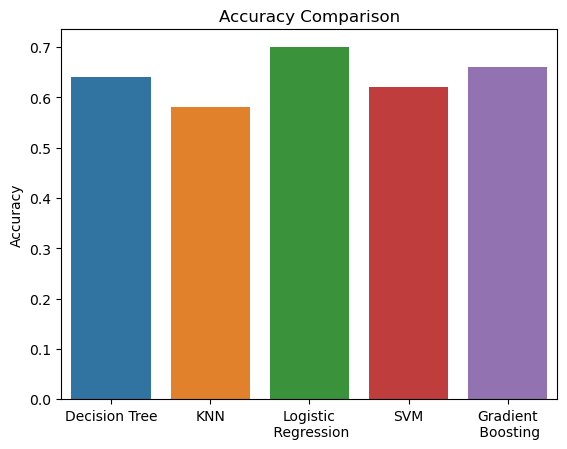

Classification Report for Decision Tree:
               precision    recall  f1-score  support
0              0.600000  0.545455  0.571429    22.00
1              0.666667  0.714286  0.689655    28.00
accuracy       0.640000  0.640000  0.640000     0.64
macro avg      0.633333  0.629870  0.630542    50.00
weighted avg   0.637333  0.640000  0.637635    50.00
Classification Report for KNN:
               precision    recall  f1-score  support
0              0.533333  0.363636  0.432432    22.00
1              0.600000  0.750000  0.666667    28.00
accuracy       0.580000  0.580000  0.580000     0.58
macro avg      0.566667  0.556818  0.549550    50.00
weighted avg   0.570667  0.580000  0.563604    50.00
Classification Report for Logistic
 Regression:
               precision    recall  f1-score  support
0              0.705882  0.545455  0.615385     22.0
1              0.696970  0.821429  0.754098     28.0
accuracy       0.700000  0.700000  0.700000      0.7
macro avg      0.701426  0.68

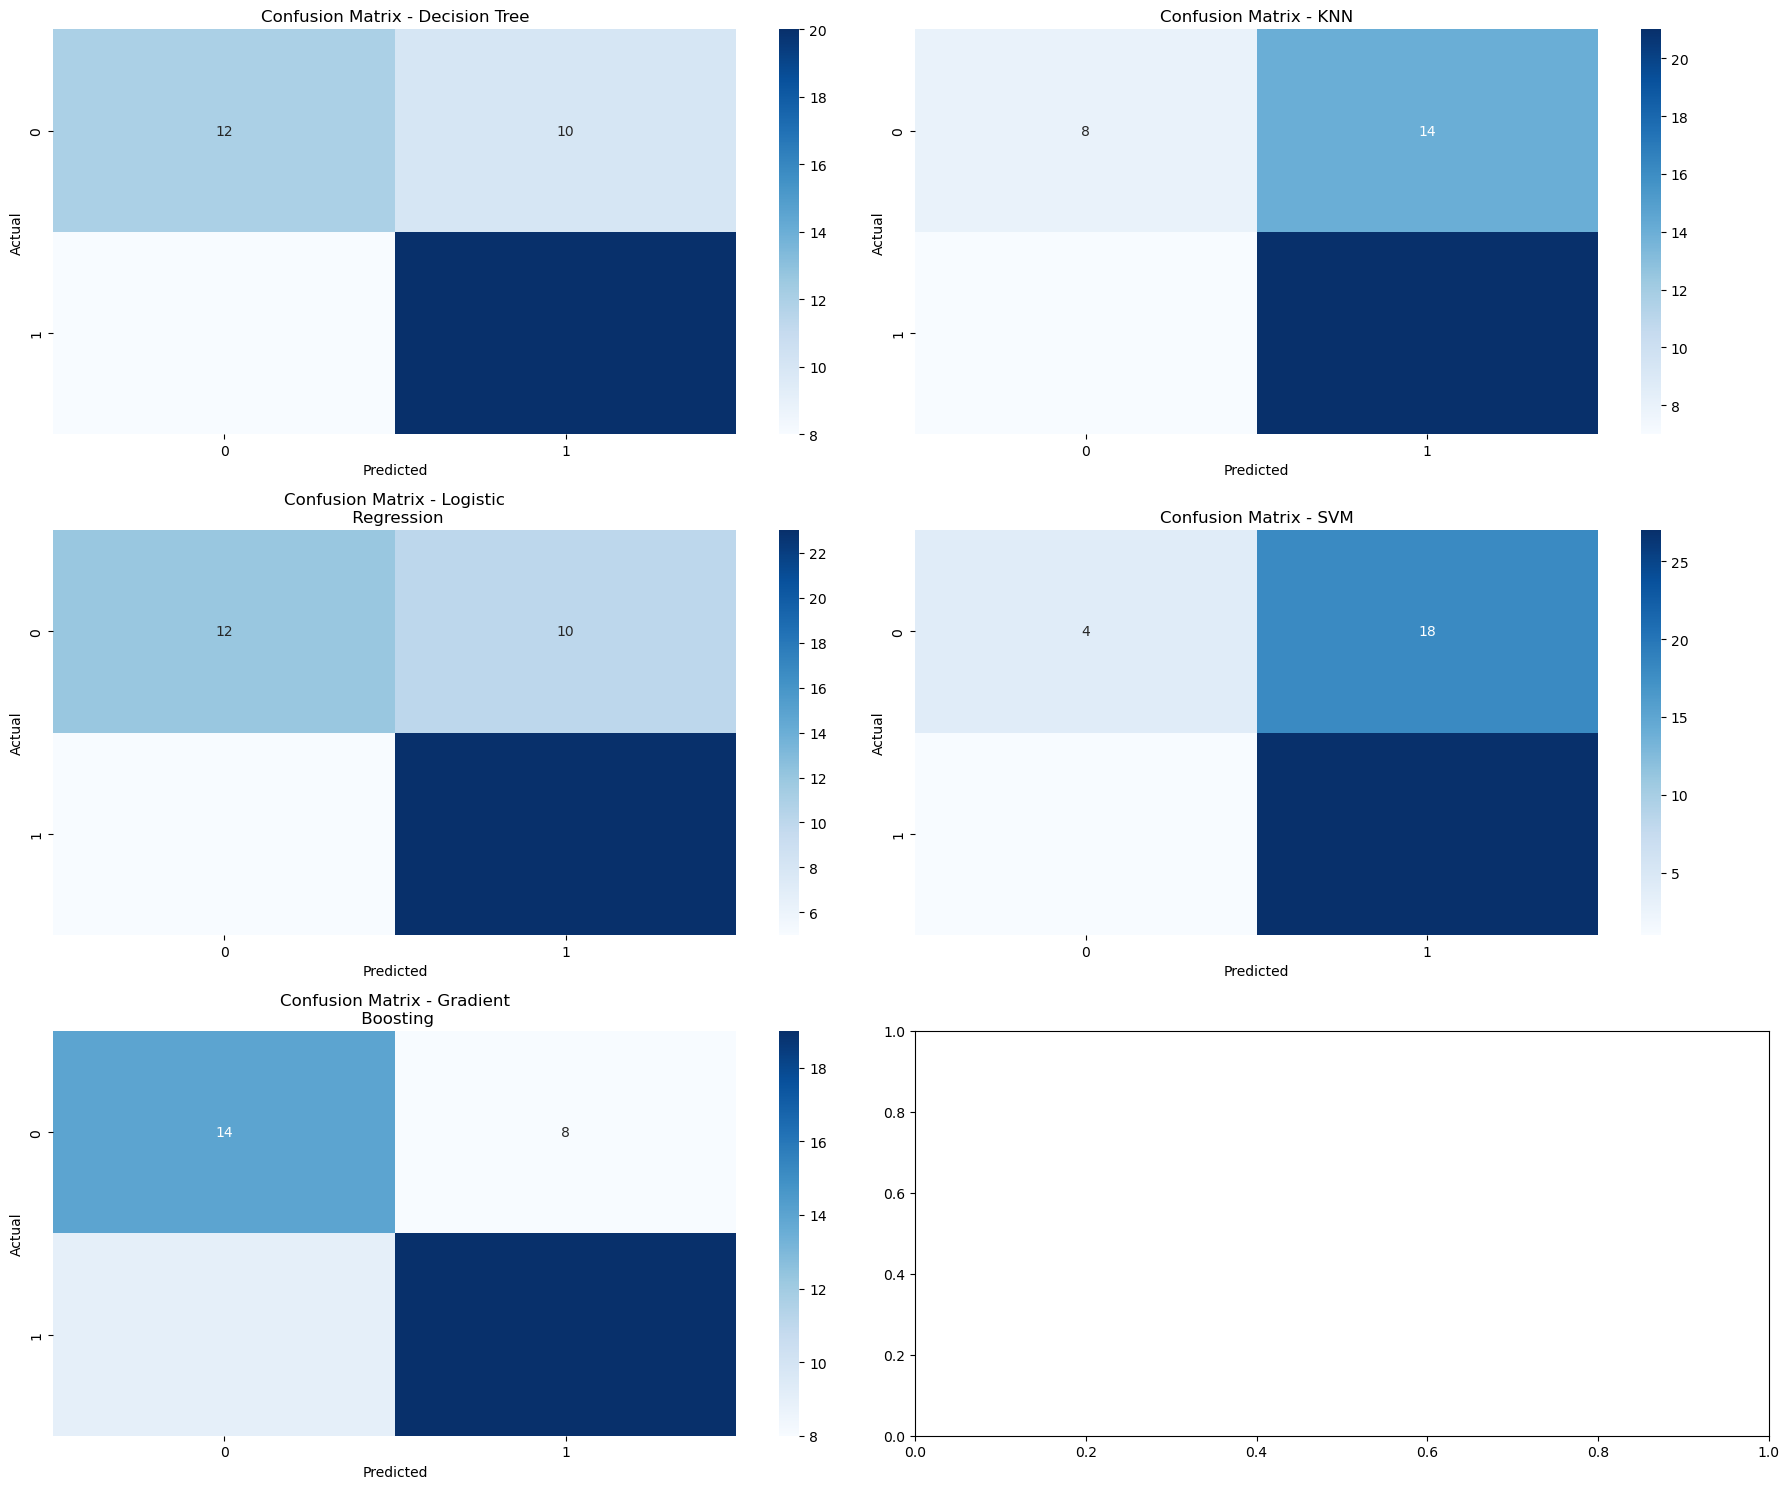

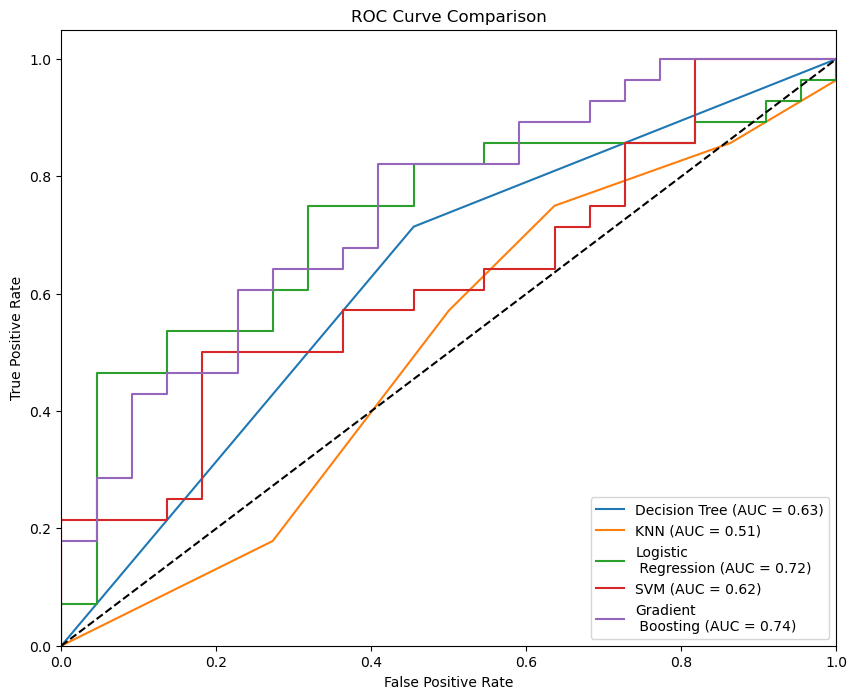

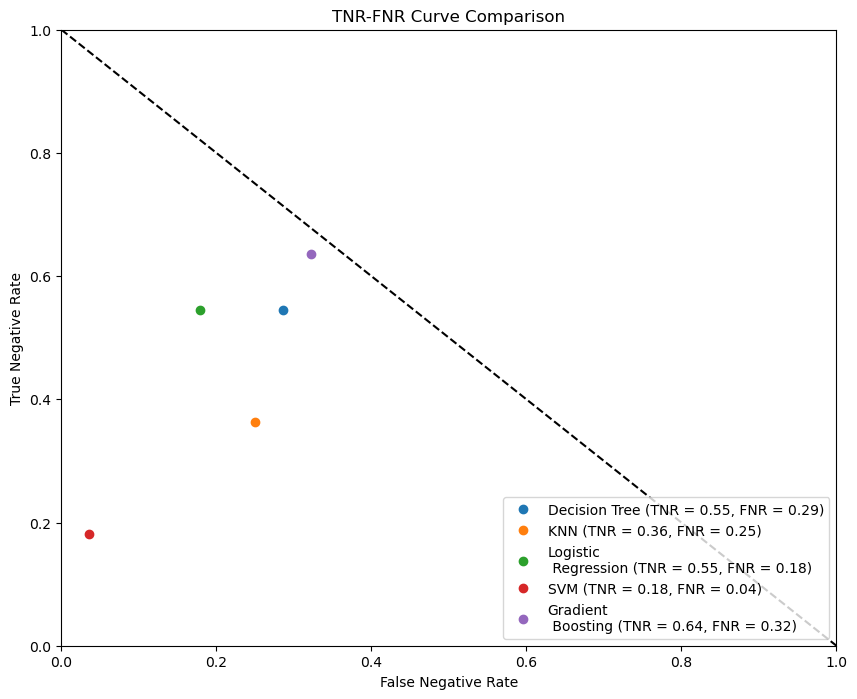

In [66]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


X = df.drop(columns=['Class','Symptoms', 'Diabetes', 'HBeAg', 'HIV', 'Endemic', 'Hemochro', 'HCVAb', 'NASH', 'Grams_day', 'INR', 'Total_Bil', 'TP'])
y = df['Class']

# Identificar colunas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Aplicar One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols)

# Dividir o dataset em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Garantir que os dados são contíguos em memória
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

# Criar os modelos
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic\n Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient\n Boosting': GradientBoostingClassifier(random_state=42),
}
# Treinar e avaliar os modelos
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob) if y_prob is not None else (None, None, None)
    roc_auc = auc(fpr, tpr) if y_prob is not None else None
    
    # Calculando TNR e FNR
    tn, fp, fn, tp = conf_matrix.ravel()
    tnr = tn / (tn + fp)  # True Negative Rate
    fnr = fn / (fn + tp)  # False Negative Rate
    
    # TNR-FNR curve
    tnr_fnr = (tnr, fnr)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'conf_matrix': conf_matrix,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'tnr_fnr': tnr_fnr,
    }

# Comparação de Acurácia
accuracy_data = {name: results[name]['accuracy'] for name in results.keys()}
accuracy_df = pd.DataFrame.from_dict(accuracy_data, orient='index', columns=['Accuracy'])
print(accuracy_df)

# Plotting accuracy
sns.barplot(x=accuracy_df.index, y='Accuracy', data=accuracy_df)
plt.title('Accuracy Comparison')
plt.show()

# Comparação do Relatório de Classificação
classification_reports = {name: pd.DataFrame(results[name]['report']).transpose() for name in results.keys()}

for name, report in classification_reports.items():
    print(f'Classification Report for {name}:\n', report)

# Matriz de Confusão
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['conf_matrix'], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC Curve e AUC
plt.figure(figsize=(10, 8))

for name, result in results.items():
    if result['roc_auc'] is not None:
        plt.plot(result['fpr'], result['tpr'], label=f'{name} (AUC = {result["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

# TNR-FNR Curve
plt.figure(figsize=(10, 8))

for name, result in results.items():
    tnr, fnr = result['tnr_fnr']
    plt.plot(fnr, tnr, 'o', label=f'{name} (TNR = {tnr:.2f}, FNR = {fnr:.2f})')

plt.plot([0, 1], [1, 0], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Negative Rate')
plt.ylabel('True Negative Rate')
plt.title('TNR-FNR Curve Comparison')
plt.legend(loc='lower right')
plt.show()



| No |   Feature     | Combined Score |
|----|---------------|----------------|
| 27 | Hemoglobin    |    0.537325    |
| 41 | Platelets     |    0.502954    |
|  2 | ALP           |    0.395807    |
| 29 | Iron          |    0.391361    |
| 11 | Creatinine    |    0.388626    |
| 39 | PVT           |    0.385974    |
|  6 | Albumin       |    0.380848    |
|  8 | Ascites       |    0.357149    |
| 45 | Symptoms      |    0.356245    |
| 12 | Diabetes      |    0.339572    |
| 32 | Major_Dim     |    0.336119    |
|  1 | AHT           |    0.321655    |
|  9 | CRI           |    0.308719    |
|  0 | AFP           |    0.308227    |
| 37 | PHT           |    0.295672    |
| 38 | PS            |    0.286393    |
| 18 | Gender        |    0.285501    |
| 47 | Total_Bil     |    0.273480    |
| 24 | HIV           |    0.265306    |
| 28 | INR           |    0.262920    |
| 48 | Varices       |    0.261538    |
| 43 | Smoking       |    0.255750    |
| 31 | MCV           |    0.254706    |
| 10 | Cirrhosis     |    0.238765    |
| 42 | Sat           |    0.236701    |
|  4 | AST           |    0.235271    |
| 25 | Hallmark      |    0.234942    |
|  7 | Alcohol       |    0.226676    |
| 14 | Encephalopathy|    0.223920    |
| 36 | Obesity       |    0.222137    |
| 46 | TP            |    0.210909    |
| 34 | NASH          |    0.208292    |
|  3 | ALT           |    0.206155    |
| 22 | HBsAg         |    0.191832    |
| 17 | GGT           |    0.191705    |
| 23 | HCVAb         |    0.190169    |
| 44 | Spleno        |    0.185733    |
| 35 | Nodules       |    0.183425    |
| 13 | Dir_Bil       |    0.180009    |
|  5 | Age           |    0.160089    |
| 30 | Leucocytes    |    0.153687    |
| 26 | Hemochro      |    0.144917    |
| 40 | Packs_year    |    0.138644    |
| 16 | Ferritin      |    0.136832    |
| 33 | Metastasis    |    0.120844    |
| 20 | HBcAb         |    0.114248    |
| 19 | Grams_day     |    0.112203    |
| 15 | Endemic       |    0.086661    |
| 21 | HBeAg         |    0.000000    |

**Sem as piores 5 variáveis, de acordo com o sistema de pontos acima feito:**


/home/carolina/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                       Accuracy
Decision Tree              0.66
KNN                        0.58
Logistic\n Regression      0.68
SVM                        0.62
Gradient\n Boosting        0.66


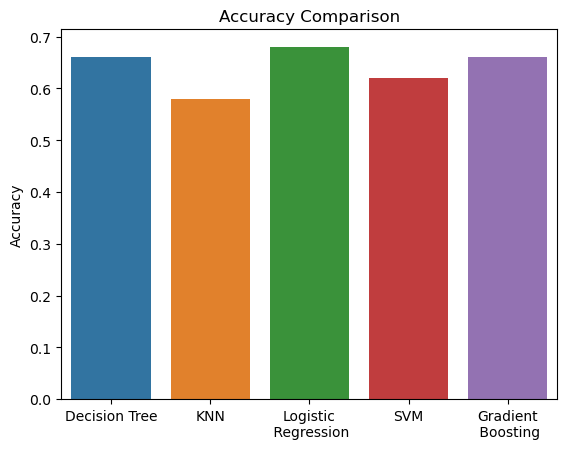

Classification Report for Decision Tree:
               precision    recall  f1-score  support
0              0.608696  0.636364  0.622222    22.00
1              0.703704  0.678571  0.690909    28.00
accuracy       0.660000  0.660000  0.660000     0.66
macro avg      0.656200  0.657468  0.656566    50.00
weighted avg   0.661900  0.660000  0.660687    50.00
Classification Report for KNN:
               precision    recall  f1-score  support
0              0.533333  0.363636  0.432432    22.00
1              0.600000  0.750000  0.666667    28.00
accuracy       0.580000  0.580000  0.580000     0.58
macro avg      0.566667  0.556818  0.549550    50.00
weighted avg   0.570667  0.580000  0.563604    50.00
Classification Report for Logistic
 Regression:
               precision    recall  f1-score  support
0              0.666667  0.545455  0.600000    22.00
1              0.687500  0.785714  0.733333    28.00
accuracy       0.680000  0.680000  0.680000     0.68
macro avg      0.677083  0.66

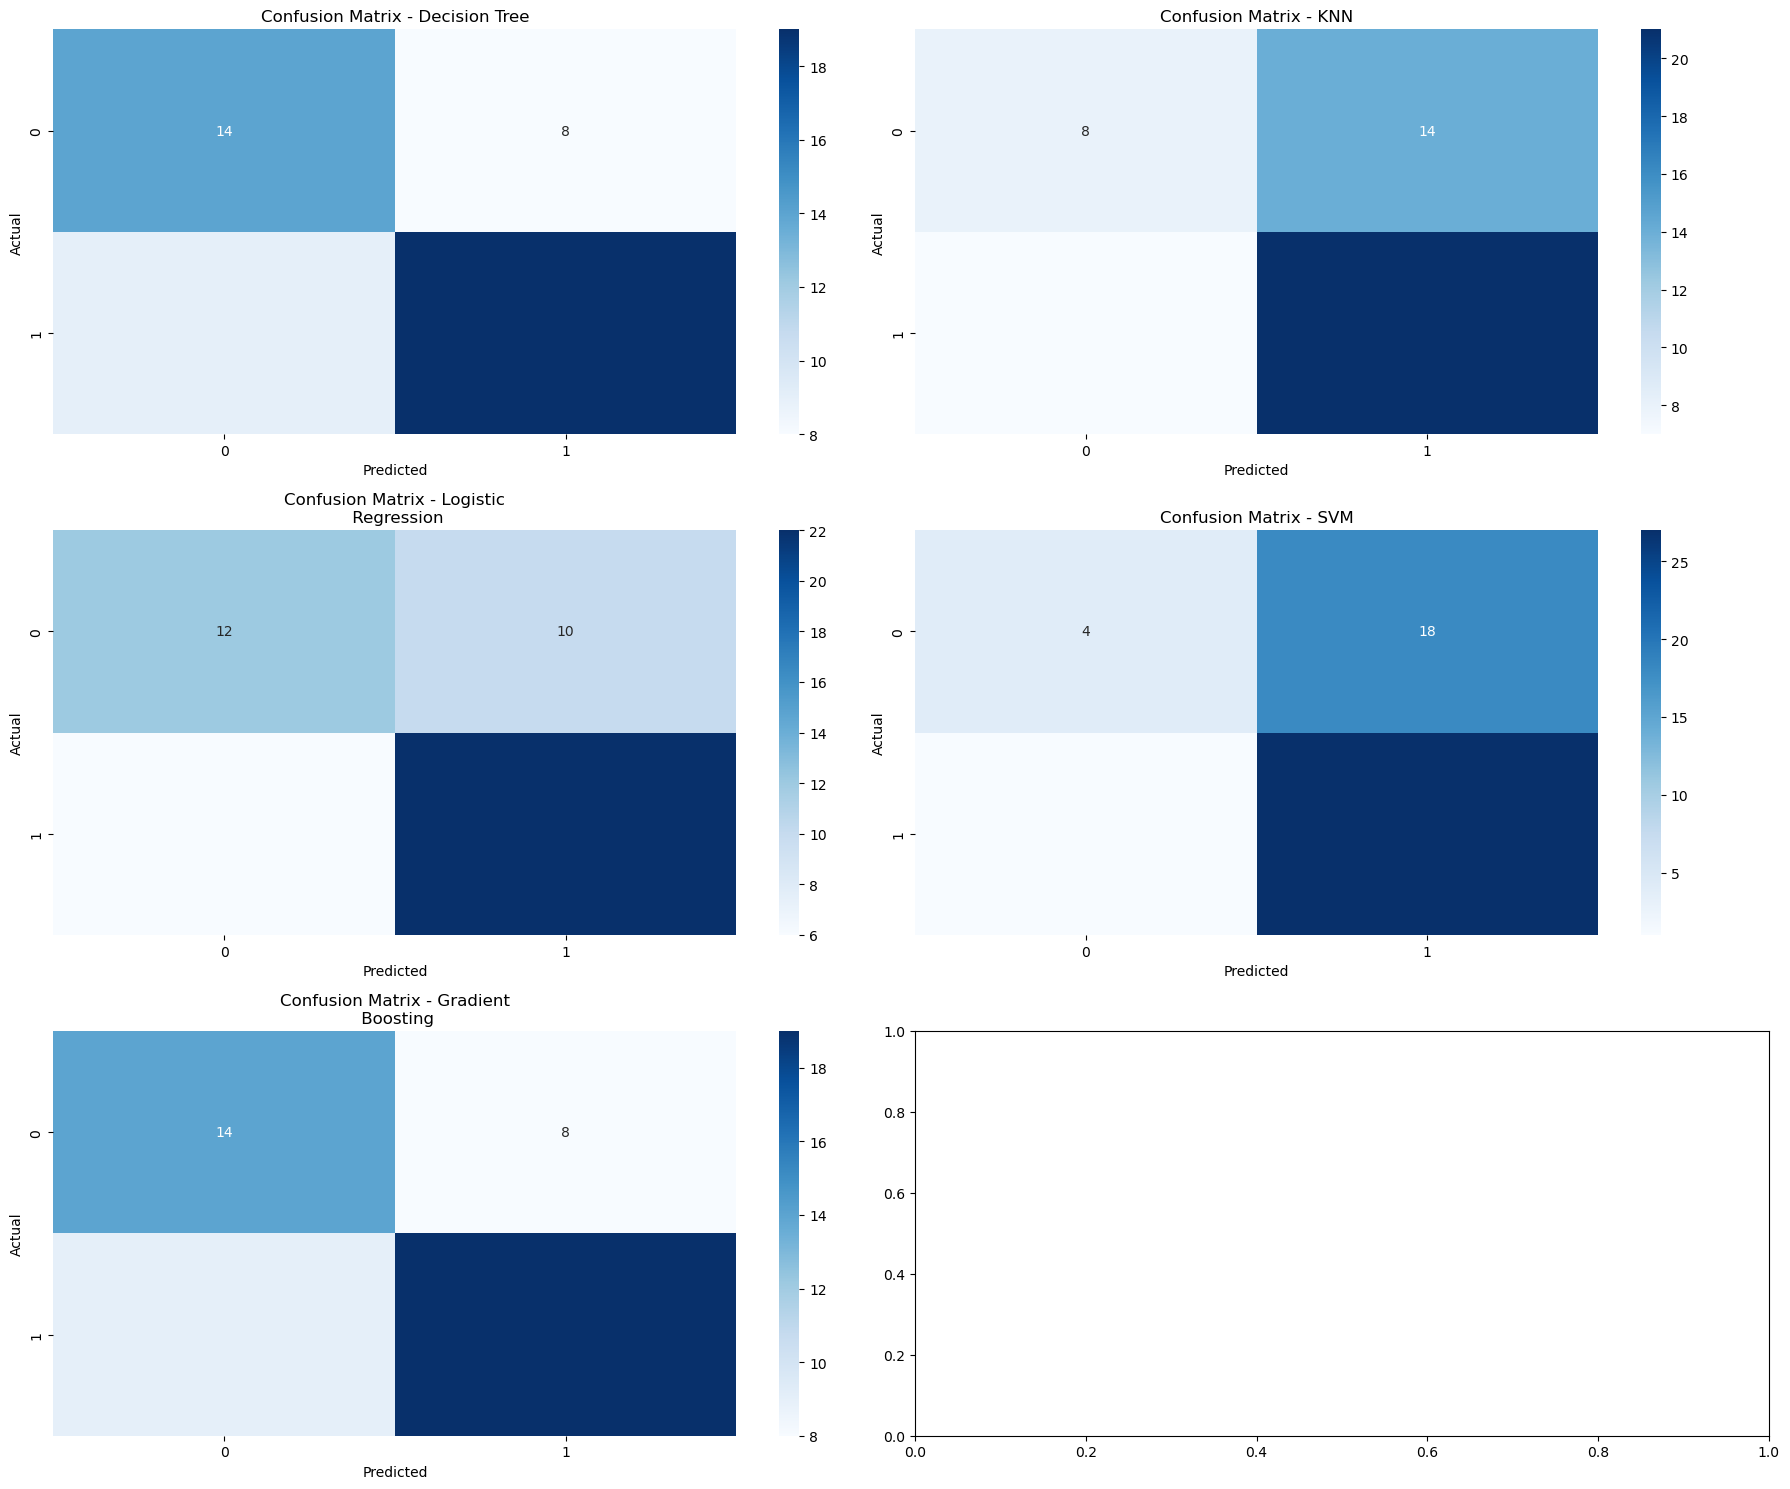

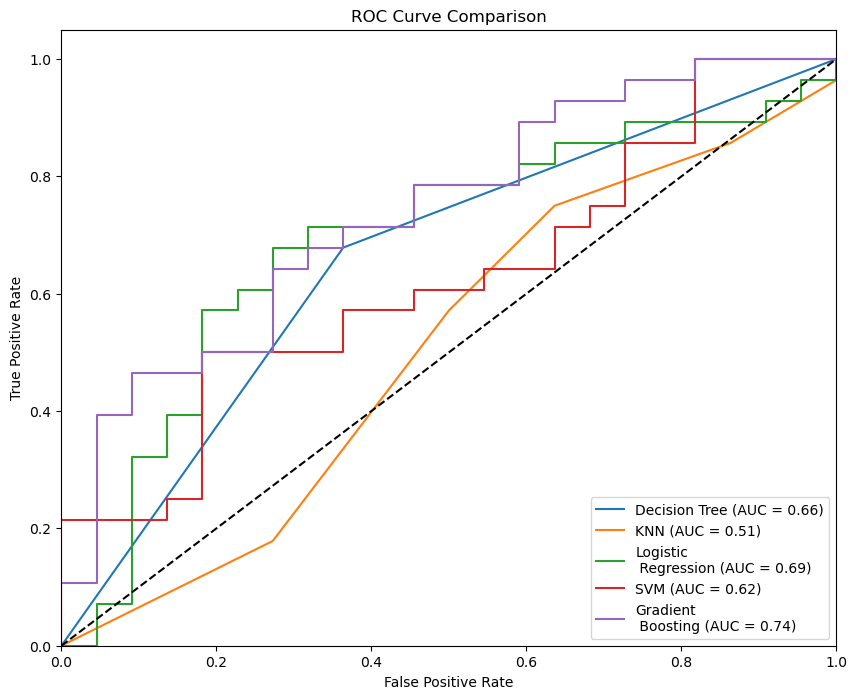

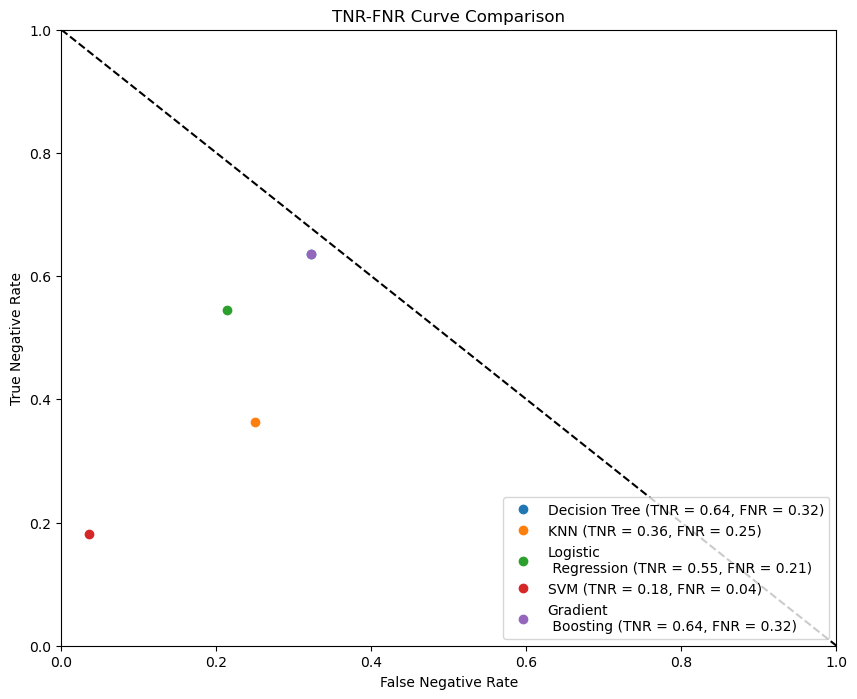

In [67]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


X = df.drop(columns=['Class','Metastasis', 'HBcAb', 'Grams_day', 'Endemic', 'HBeAg'])
y = df['Class']

# Identificar colunas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Aplicar One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols)

# Dividir o dataset em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Garantir que os dados são contíguos em memória
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

# Criar os modelos
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic\n Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient\n Boosting': GradientBoostingClassifier(random_state=42),
}
# Treinar e avaliar os modelos
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob) if y_prob is not None else (None, None, None)
    roc_auc = auc(fpr, tpr) if y_prob is not None else None
    
    # Calculando TNR e FNR
    tn, fp, fn, tp = conf_matrix.ravel()
    tnr = tn / (tn + fp)  # True Negative Rate
    fnr = fn / (fn + tp)  # False Negative Rate
    
    # TNR-FNR curve
    tnr_fnr = (tnr, fnr)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'conf_matrix': conf_matrix,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'tnr_fnr': tnr_fnr,
    }

# Comparação de Acurácia
accuracy_data = {name: results[name]['accuracy'] for name in results.keys()}
accuracy_df = pd.DataFrame.from_dict(accuracy_data, orient='index', columns=['Accuracy'])
print(accuracy_df)

# Plotting accuracy
sns.barplot(x=accuracy_df.index, y='Accuracy', data=accuracy_df)
plt.title('Accuracy Comparison')
plt.show()

# Comparação do Relatório de Classificação
classification_reports = {name: pd.DataFrame(results[name]['report']).transpose() for name in results.keys()}

for name, report in classification_reports.items():
    print(f'Classification Report for {name}:\n', report)

# Matriz de Confusão
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['conf_matrix'], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC Curve e AUC
plt.figure(figsize=(10, 8))

for name, result in results.items():
    if result['roc_auc'] is not None:
        plt.plot(result['fpr'], result['tpr'], label=f'{name} (AUC = {result["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

# TNR-FNR Curve
plt.figure(figsize=(10, 8))

for name, result in results.items():
    tnr, fnr = result['tnr_fnr']
    plt.plot(fnr, tnr, 'o', label=f'{name} (TNR = {tnr:.2f}, FNR = {fnr:.2f})')

plt.plot([0, 1], [1, 0], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Negative Rate')
plt.ylabel('True Negative Rate')
plt.title('TNR-FNR Curve Comparison')
plt.legend(loc='lower right')
plt.show()


**Sem as melhores 3 variáveis, de acordo com o sistema de pontos acima feito:**

/home/carolina/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                       Accuracy
Decision Tree              0.62
KNN                        0.68
Logistic\n Regression      0.62
SVM                        0.58
Gradient\n Boosting        0.64


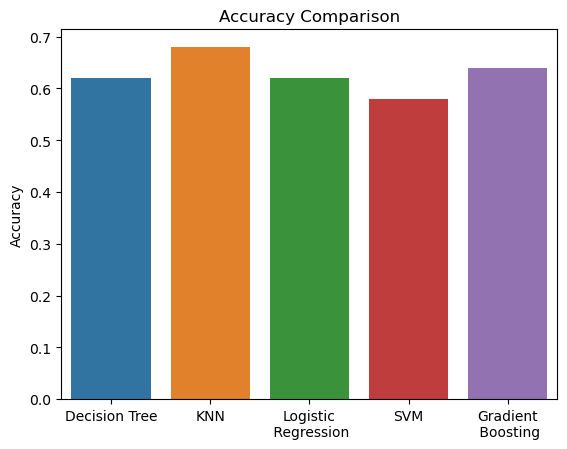

Classification Report for Decision Tree:
               precision    recall  f1-score  support
0              0.600000  0.409091  0.486486    22.00
1              0.628571  0.785714  0.698413    28.00
accuracy       0.620000  0.620000  0.620000     0.62
macro avg      0.614286  0.597403  0.592450    50.00
weighted avg   0.616000  0.620000  0.605165    50.00
Classification Report for KNN:
               precision    recall  f1-score  support
0              0.714286  0.454545  0.555556    22.00
1              0.666667  0.857143  0.750000    28.00
accuracy       0.680000  0.680000  0.680000     0.68
macro avg      0.690476  0.655844  0.652778    50.00
weighted avg   0.687619  0.680000  0.664444    50.00
Classification Report for Logistic
 Regression:
               precision    recall  f1-score  support
0              0.636364  0.318182  0.424242    22.00
1              0.615385  0.857143  0.716418    28.00
accuracy       0.620000  0.620000  0.620000     0.62
macro avg      0.625874  0.58

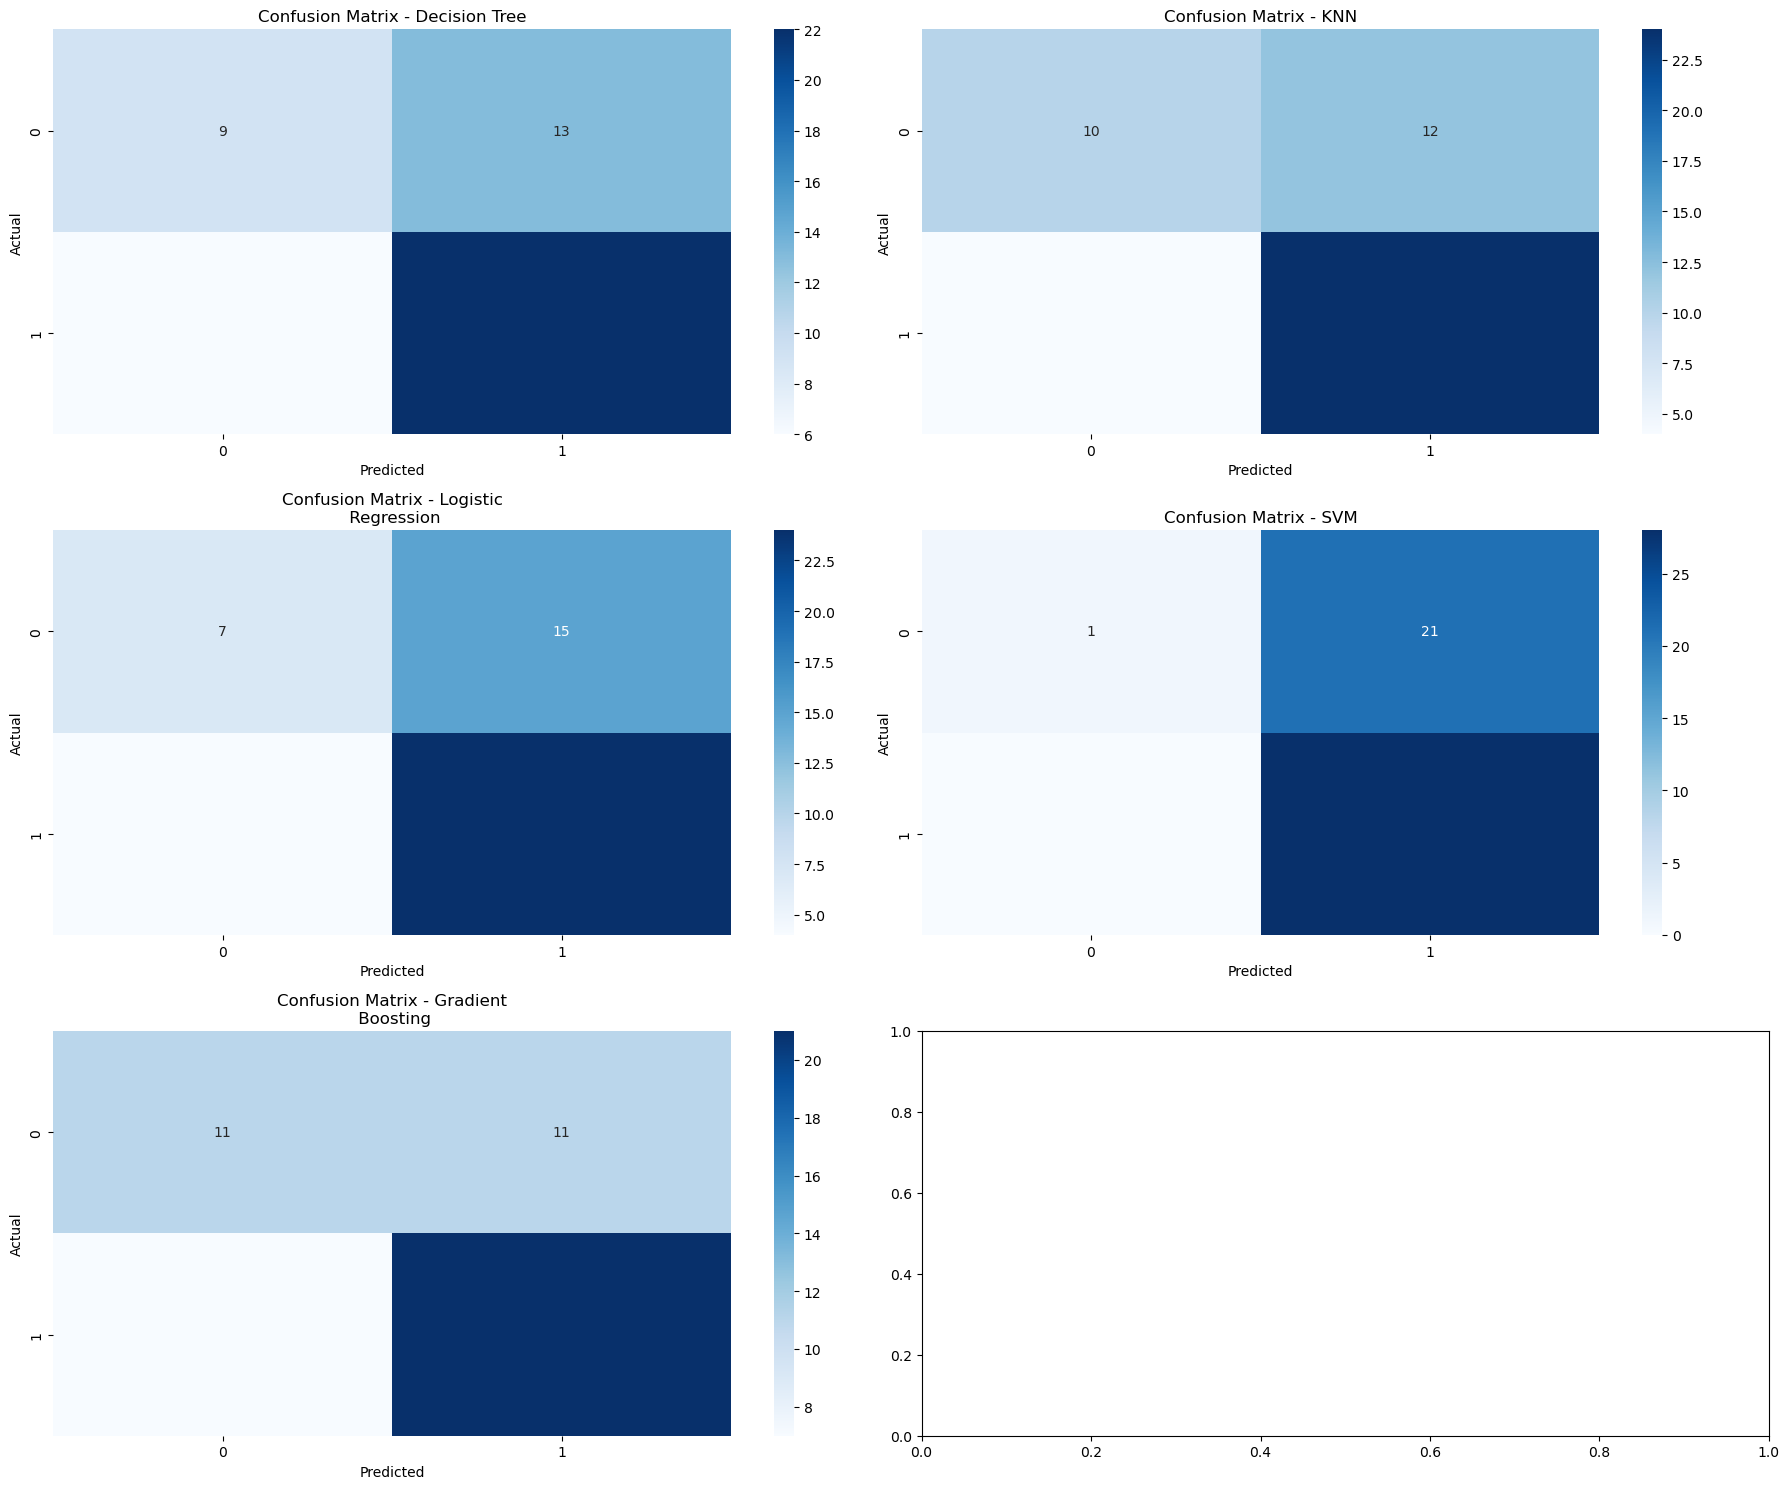

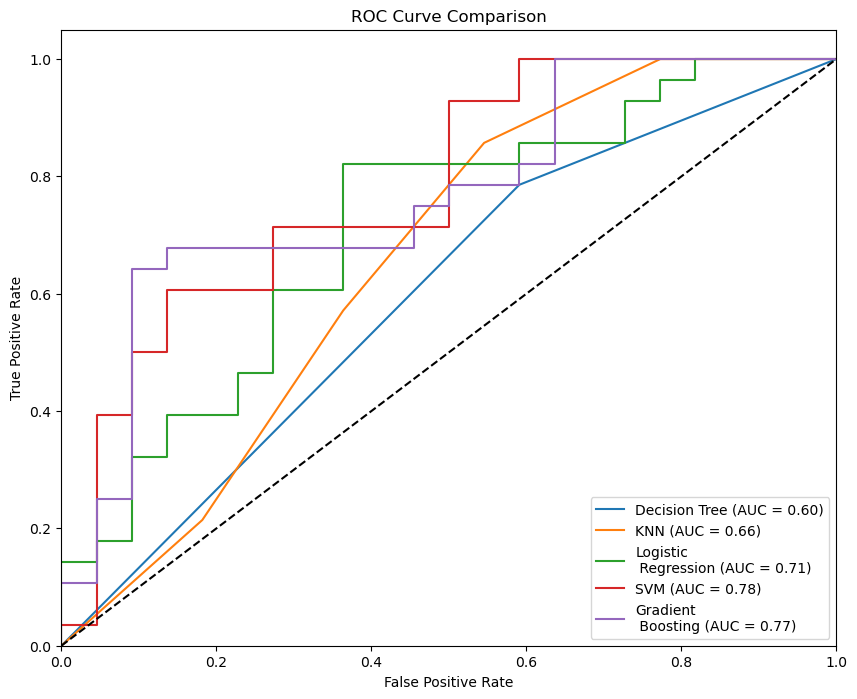

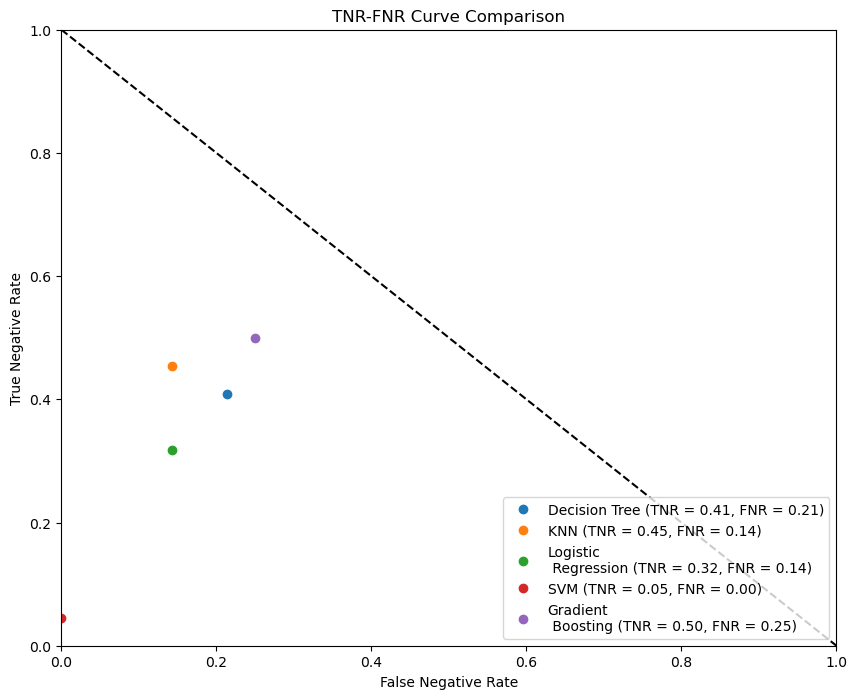

In [68]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


X = df.drop(columns=['Class','Hemoglobin', 'Platelets', 'ALP'])
y = df['Class']

# Identificar colunas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Aplicar One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols)

# Dividir o dataset em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Garantir que os dados são contíguos em memória
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

# Criar os modelos
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic\n Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient\n Boosting': GradientBoostingClassifier(random_state=42),
}
# Treinar e avaliar os modelos
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob) if y_prob is not None else (None, None, None)
    roc_auc = auc(fpr, tpr) if y_prob is not None else None
    
    # Calculando TNR e FNR
    tn, fp, fn, tp = conf_matrix.ravel()
    tnr = tn / (tn + fp)  # True Negative Rate
    fnr = fn / (fn + tp)  # False Negative Rate
    
    # TNR-FNR curve
    tnr_fnr = (tnr, fnr)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'conf_matrix': conf_matrix,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'tnr_fnr': tnr_fnr,
    }

# Comparação de Acurácia
accuracy_data = {name: results[name]['accuracy'] for name in results.keys()}
accuracy_df = pd.DataFrame.from_dict(accuracy_data, orient='index', columns=['Accuracy'])
print(accuracy_df)

# Plotting accuracy
sns.barplot(x=accuracy_df.index, y='Accuracy', data=accuracy_df)
plt.title('Accuracy Comparison')
plt.show()

# Comparação do Relatório de Classificação
classification_reports = {name: pd.DataFrame(results[name]['report']).transpose() for name in results.keys()}

for name, report in classification_reports.items():
    print(f'Classification Report for {name}:\n', report)

# Matriz de Confusão
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['conf_matrix'], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC Curve e AUC
plt.figure(figsize=(10, 8))

for name, result in results.items():
    if result['roc_auc'] is not None:
        plt.plot(result['fpr'], result['tpr'], label=f'{name} (AUC = {result["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

# TNR-FNR Curve
plt.figure(figsize=(10, 8))

for name, result in results.items():
    tnr, fnr = result['tnr_fnr']
    plt.plot(fnr, tnr, 'o', label=f'{name} (TNR = {tnr:.2f}, FNR = {fnr:.2f})')

plt.plot([0, 1], [1, 0], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Negative Rate')
plt.ylabel('True Negative Rate')
plt.title('TNR-FNR Curve Comparison')
plt.legend(loc='lower right')
plt.show()


**Sem as 5 melhores variáveis, de acordo com o sistema de pontos:**

/home/carolina/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                       Accuracy
Decision Tree              0.68
KNN                        0.68
Logistic\n Regression      0.62
SVM                        0.58
Gradient\n Boosting        0.70


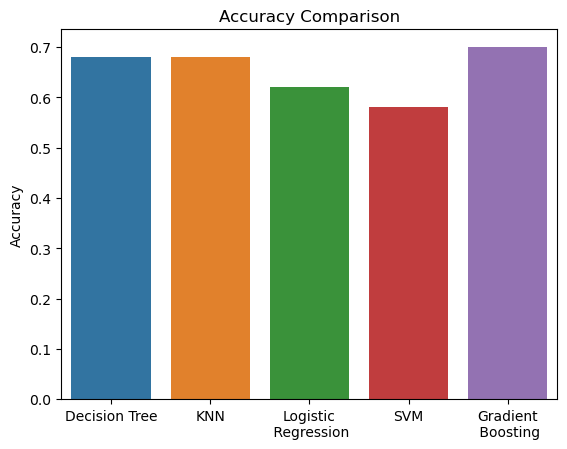

Classification Report for Decision Tree:
               precision    recall  f1-score  support
0              0.687500  0.500000  0.578947    22.00
1              0.676471  0.821429  0.741935    28.00
accuracy       0.680000  0.680000  0.680000     0.68
macro avg      0.681985  0.660714  0.660441    50.00
weighted avg   0.681324  0.680000  0.670221    50.00
Classification Report for KNN:
               precision    recall  f1-score  support
0              0.714286  0.454545  0.555556    22.00
1              0.666667  0.857143  0.750000    28.00
accuracy       0.680000  0.680000  0.680000     0.68
macro avg      0.690476  0.655844  0.652778    50.00
weighted avg   0.687619  0.680000  0.664444    50.00
Classification Report for Logistic
 Regression:
               precision    recall  f1-score  support
0              0.666667  0.272727  0.387097    22.00
1              0.609756  0.892857  0.724638    28.00
accuracy       0.620000  0.620000  0.620000     0.62
macro avg      0.638211  0.58

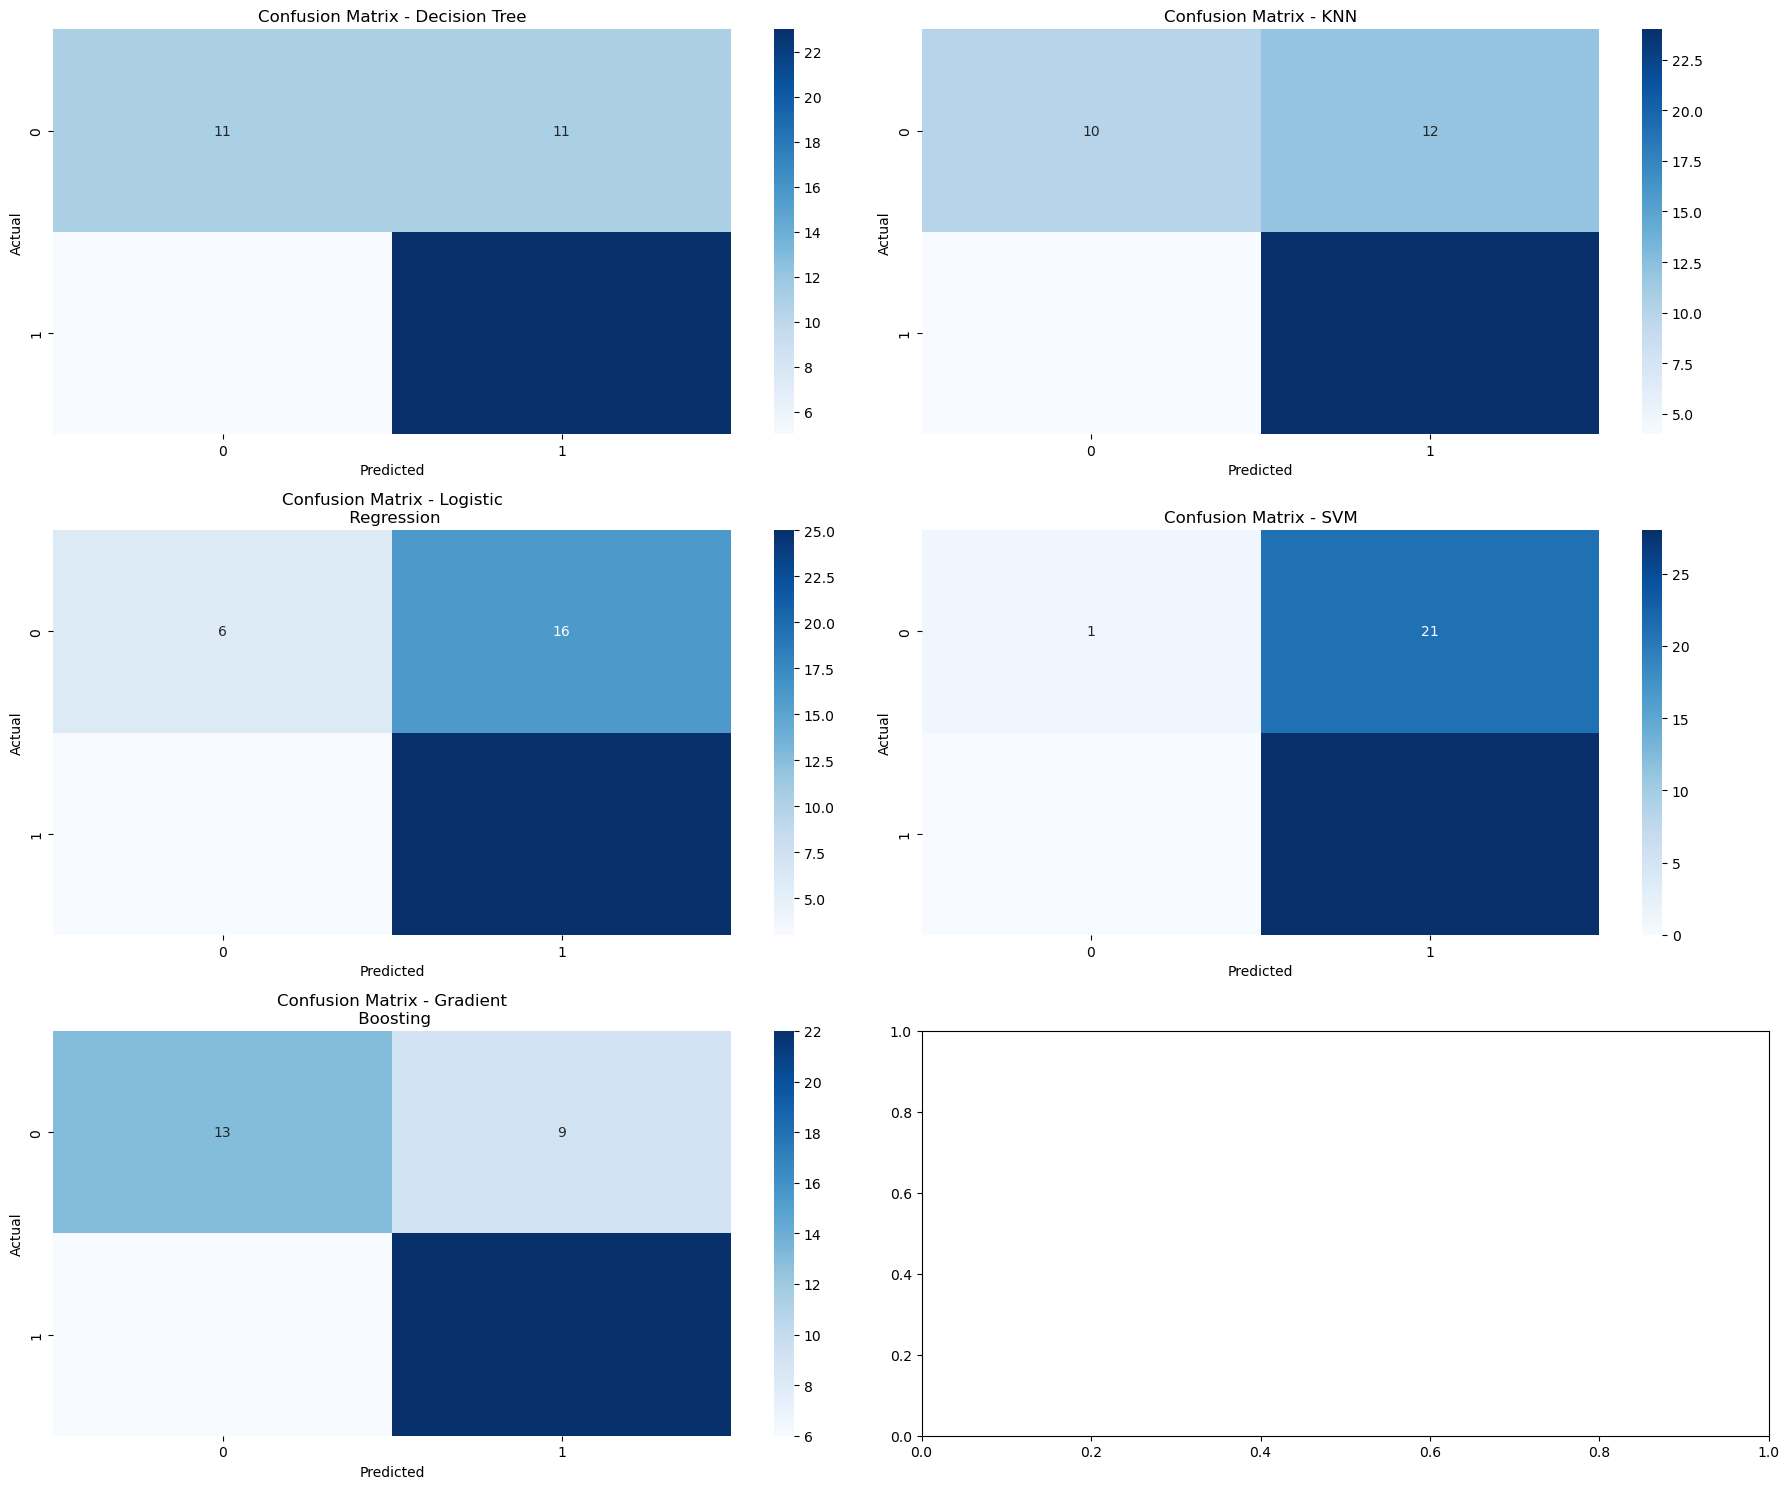

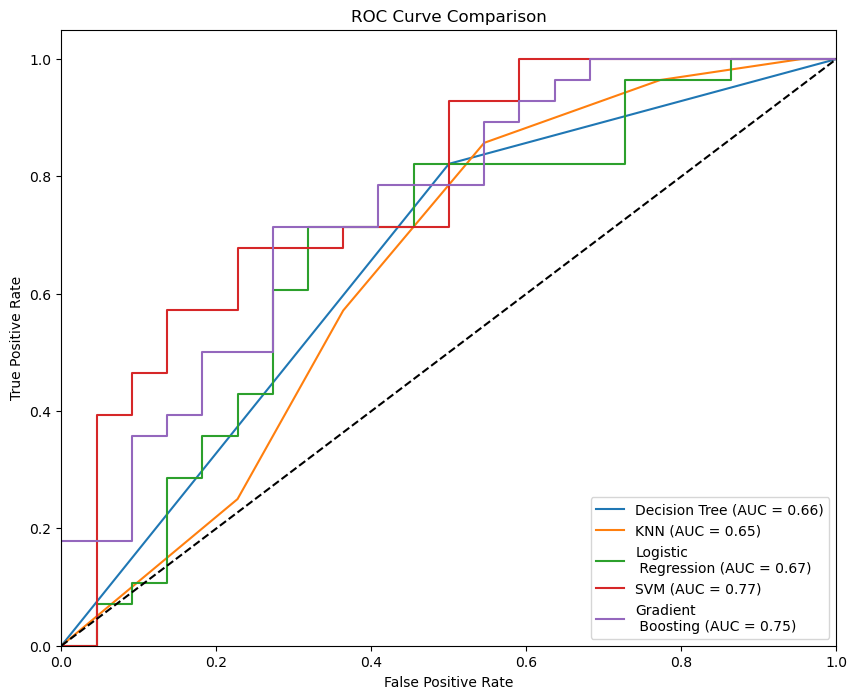

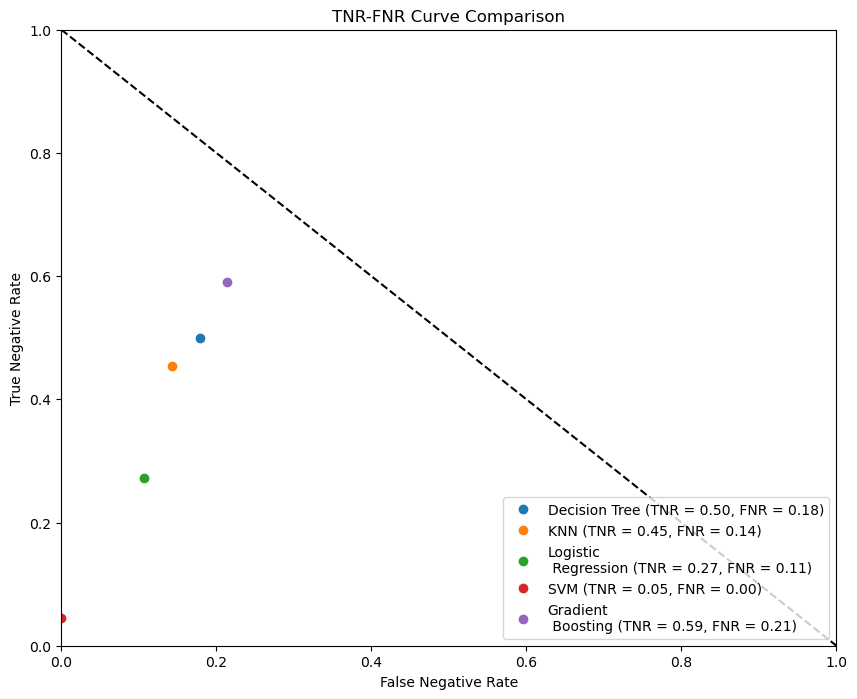

In [69]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


X = df.drop(columns=['Class','Hemoglobin', 'Platelets', 'ALP', 'Iron', 'Creatinine'])
y = df['Class']

# Identificar colunas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Aplicar One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols)

# Dividir o dataset em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Garantir que os dados são contíguos em memória
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

# Criar os modelos
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic\n Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient\n Boosting': GradientBoostingClassifier(random_state=42),
}
# Treinar e avaliar os modelos
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob) if y_prob is not None else (None, None, None)
    roc_auc = auc(fpr, tpr) if y_prob is not None else None
    
    # Calculando TNR e FNR
    tn, fp, fn, tp = conf_matrix.ravel()
    tnr = tn / (tn + fp)  # True Negative Rate
    fnr = fn / (fn + tp)  # False Negative Rate
    
    # TNR-FNR curve
    tnr_fnr = (tnr, fnr)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'conf_matrix': conf_matrix,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'tnr_fnr': tnr_fnr,
    }

# Comparação de Acurácia
accuracy_data = {name: results[name]['accuracy'] for name in results.keys()}
accuracy_df = pd.DataFrame.from_dict(accuracy_data, orient='index', columns=['Accuracy'])
print(accuracy_df)

# Plotting accuracy
sns.barplot(x=accuracy_df.index, y='Accuracy', data=accuracy_df)
plt.title('Accuracy Comparison')
plt.show()

# Comparação do Relatório de Classificação
classification_reports = {name: pd.DataFrame(results[name]['report']).transpose() for name in results.keys()}

for name, report in classification_reports.items():
    print(f'Classification Report for {name}:\n', report)

# Matriz de Confusão
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['conf_matrix'], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC Curve e AUC
plt.figure(figsize=(10, 8))

for name, result in results.items():
    if result['roc_auc'] is not None:
        plt.plot(result['fpr'], result['tpr'], label=f'{name} (AUC = {result["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

# TNR-FNR Curve
plt.figure(figsize=(10, 8))

for name, result in results.items():
    tnr, fnr = result['tnr_fnr']
    plt.plot(fnr, tnr, 'o', label=f'{name} (TNR = {tnr:.2f}, FNR = {fnr:.2f})')

plt.plot([0, 1], [1, 0], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Negative Rate')
plt.ylabel('True Negative Rate')
plt.title('TNR-FNR Curve Comparison')
plt.legend(loc='lower right')
plt.show()


**Apenas com as 3 melhores variáveis, de acordo com o sistema de pontos:**

                       Accuracy
Decision Tree              0.56
KNN                        0.68
Logistic\n Regression      0.58
SVM                        0.56
Gradient\n Boosting        0.56


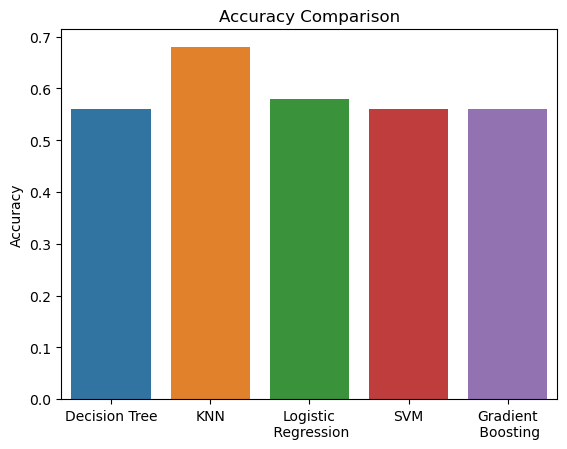

Classification Report for Decision Tree:
               precision    recall  f1-score  support
0                 0.500  0.454545   0.47619    22.00
1                 0.600  0.642857   0.62069    28.00
accuracy          0.560  0.560000   0.56000     0.56
macro avg         0.550  0.548701   0.54844    50.00
weighted avg      0.556  0.560000   0.55711    50.00
Classification Report for KNN:
               precision    recall  f1-score  support
0                 0.650  0.590909  0.619048    22.00
1                 0.700  0.750000  0.724138    28.00
accuracy          0.680  0.680000  0.680000     0.68
macro avg         0.675  0.670455  0.671593    50.00
weighted avg      0.678  0.680000  0.677898    50.00
Classification Report for Logistic
 Regression:
               precision    recall  f1-score  support
0              0.538462  0.318182  0.400000    22.00
1              0.594595  0.785714  0.676923    28.00
accuracy       0.580000  0.580000  0.580000     0.58
macro avg      0.566528  0.55

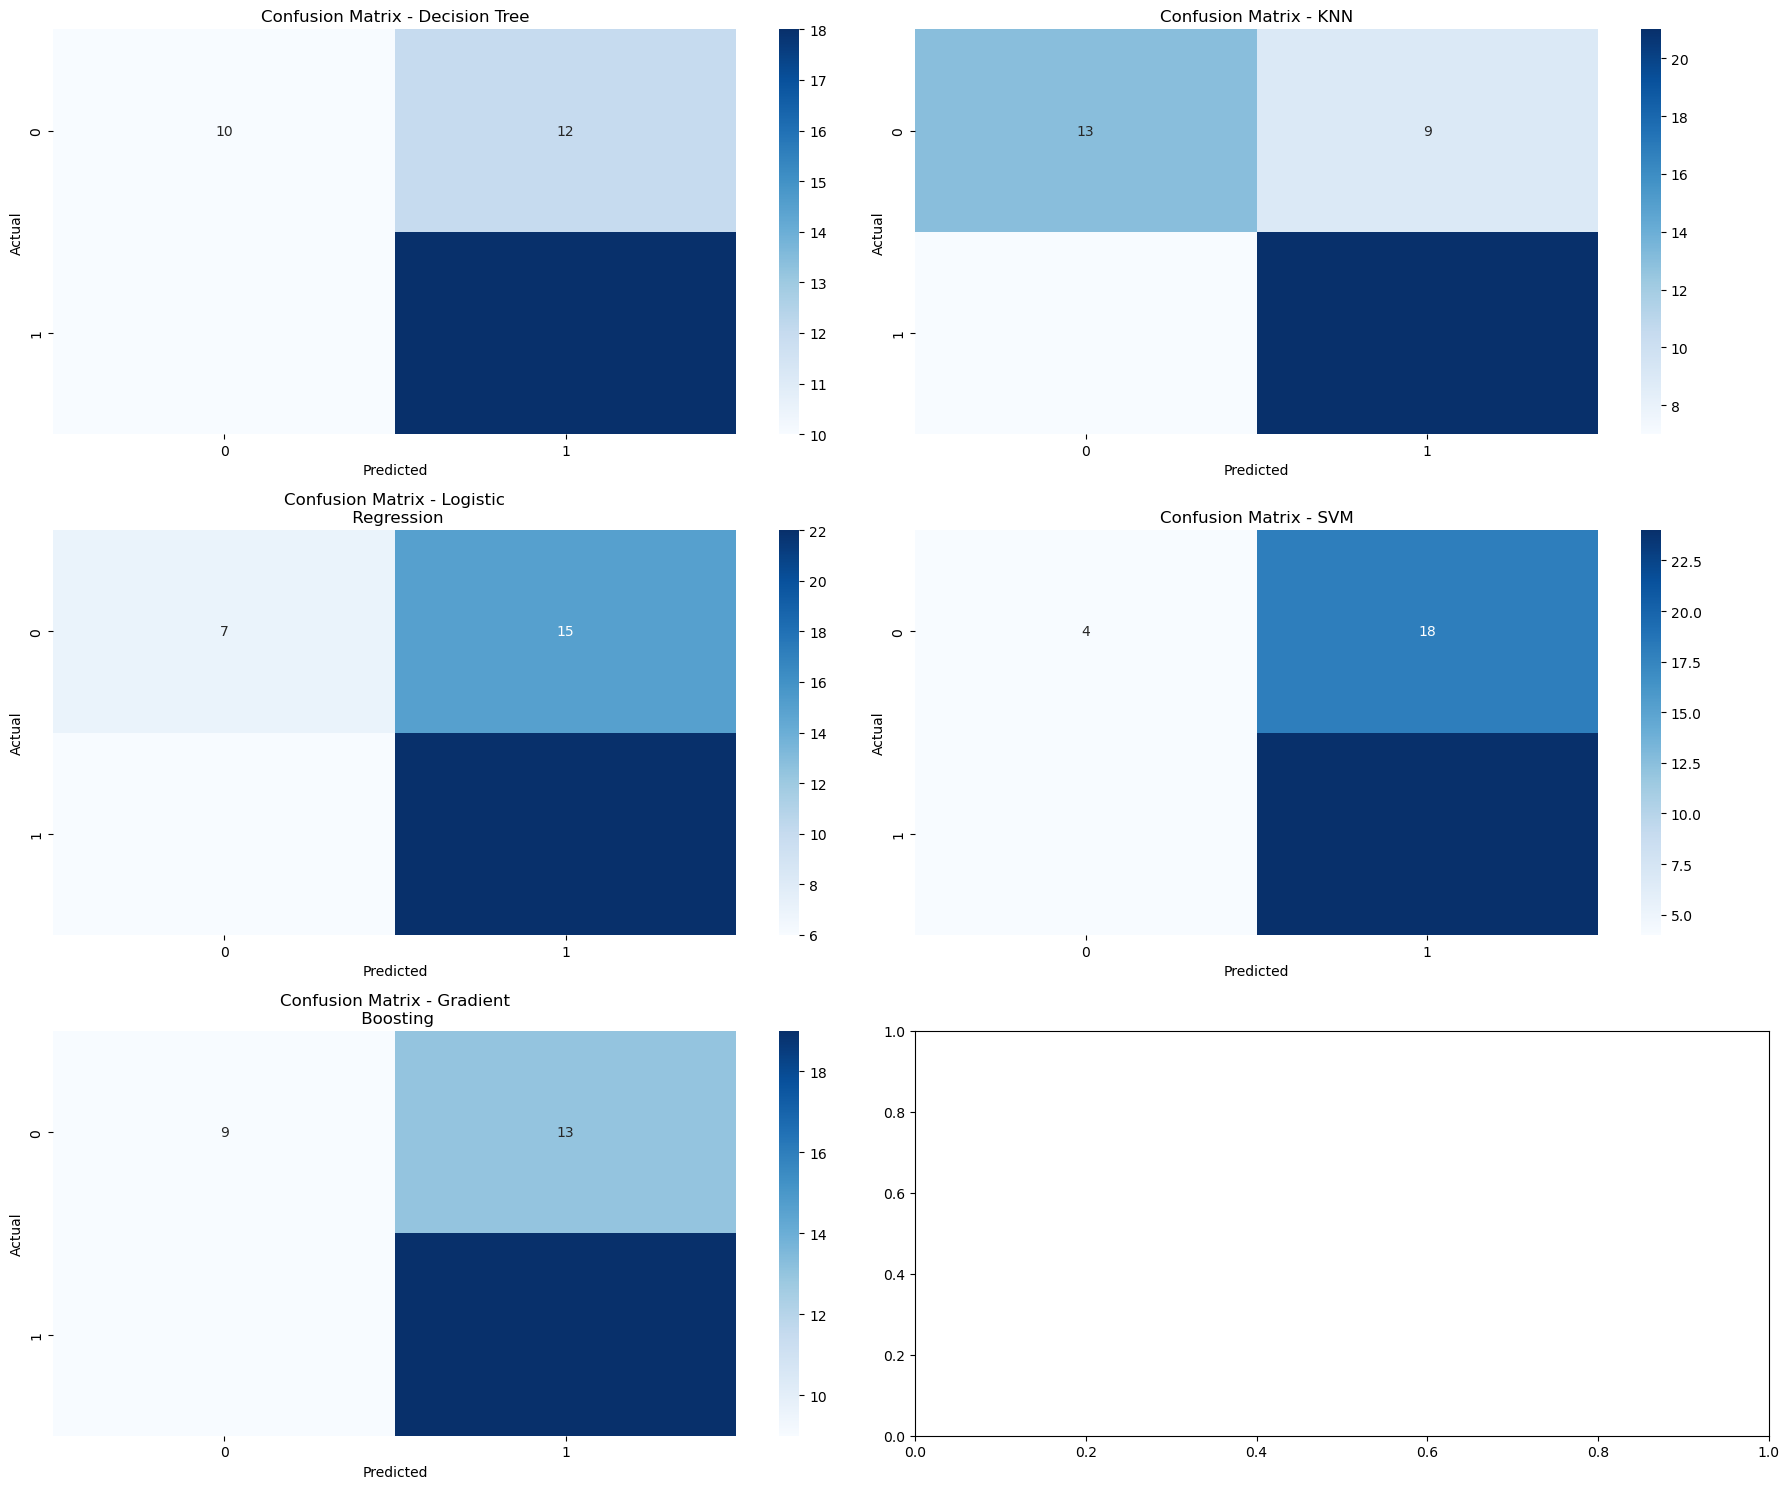

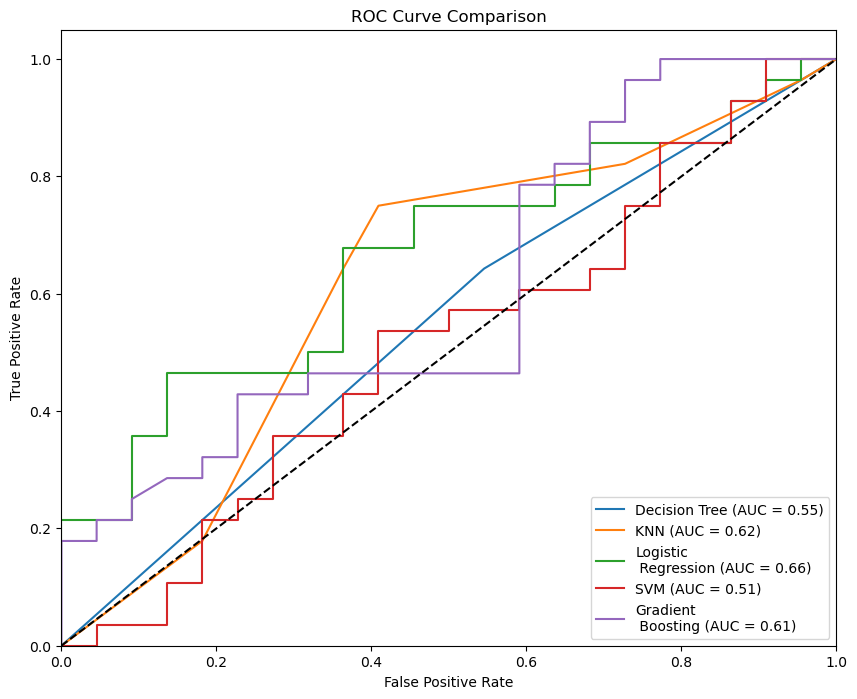

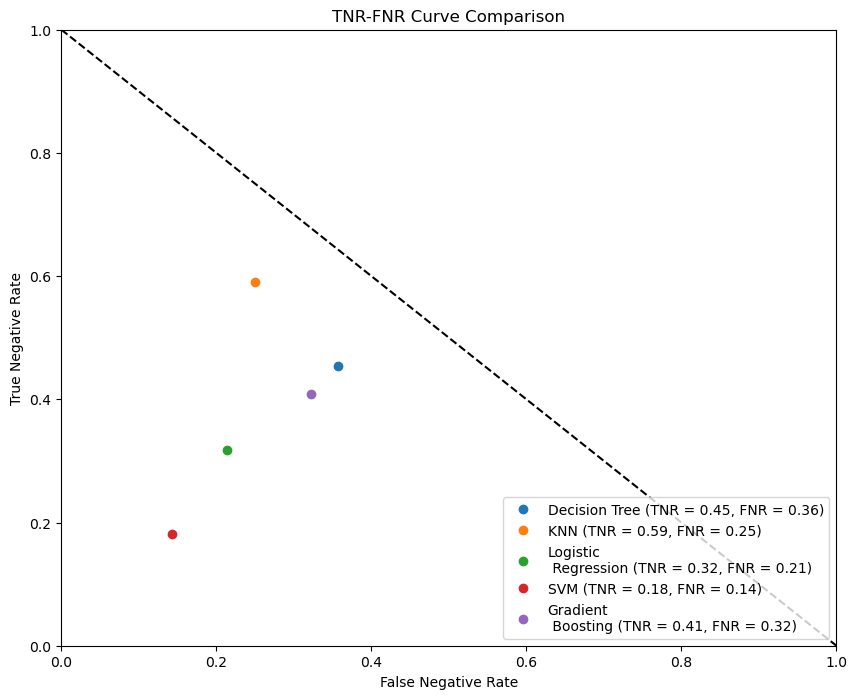

In [70]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


X = df[['Hemoglobin', 'Platelets', 'ALP']]
y = df['Class']

# Identificar colunas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Aplicar One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols)

# Dividir o dataset em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Garantir que os dados são contíguos em memória
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

# Criar os modelos
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic\n Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient\n Boosting': GradientBoostingClassifier(random_state=42),
}
# Treinar e avaliar os modelos
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob) if y_prob is not None else (None, None, None)
    roc_auc = auc(fpr, tpr) if y_prob is not None else None
    
    # Calculando TNR e FNR
    tn, fp, fn, tp = conf_matrix.ravel()
    tnr = tn / (tn + fp)  # True Negative Rate
    fnr = fn / (fn + tp)  # False Negative Rate
    
    # TNR-FNR curve
    tnr_fnr = (tnr, fnr)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'conf_matrix': conf_matrix,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'tnr_fnr': tnr_fnr,
    }

# Comparação de Acurácia
accuracy_data = {name: results[name]['accuracy'] for name in results.keys()}
accuracy_df = pd.DataFrame.from_dict(accuracy_data, orient='index', columns=['Accuracy'])
print(accuracy_df)

# Plotting accuracy
sns.barplot(x=accuracy_df.index, y='Accuracy', data=accuracy_df)
plt.title('Accuracy Comparison')
plt.show()

# Comparação do Relatório de Classificação
classification_reports = {name: pd.DataFrame(results[name]['report']).transpose() for name in results.keys()}

for name, report in classification_reports.items():
    print(f'Classification Report for {name}:\n', report)

# Matriz de Confusão
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['conf_matrix'], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC Curve e AUC
plt.figure(figsize=(10, 8))

for name, result in results.items():
    if result['roc_auc'] is not None:
        plt.plot(result['fpr'], result['tpr'], label=f'{name} (AUC = {result["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

# TNR-FNR Curve
plt.figure(figsize=(10, 8))

for name, result in results.items():
    tnr, fnr = result['tnr_fnr']
    plt.plot(fnr, tnr, 'o', label=f'{name} (TNR = {tnr:.2f}, FNR = {fnr:.2f})')

plt.plot([0, 1], [1, 0], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Negative Rate')
plt.ylabel('True Negative Rate')
plt.title('TNR-FNR Curve Comparison')
plt.legend(loc='lower right')
plt.show()


**Apenas com as 5 melhores variáveis, de acordo com o sistema de pontos:**

                       Accuracy
Decision Tree              0.56
KNN                        0.62
Logistic\n Regression      0.64
SVM                        0.56
Gradient\n Boosting        0.64


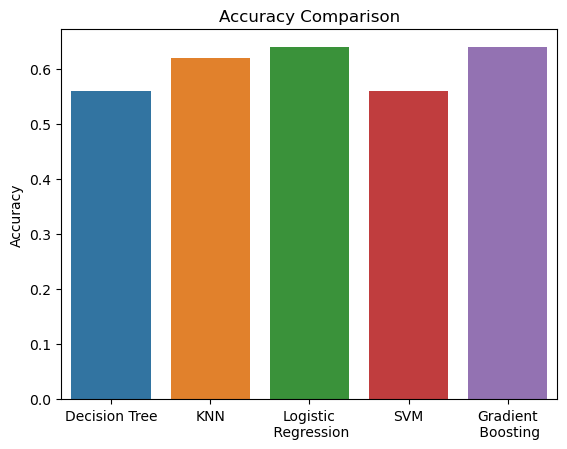

Classification Report for Decision Tree:
               precision    recall  f1-score  support
0              0.500000  0.500000  0.500000    22.00
1              0.607143  0.607143  0.607143    28.00
accuracy       0.560000  0.560000  0.560000     0.56
macro avg      0.553571  0.553571  0.553571    50.00
weighted avg   0.560000  0.560000  0.560000    50.00
Classification Report for KNN:
               precision    recall  f1-score  support
0              0.588235  0.454545  0.512821    22.00
1              0.636364  0.750000  0.688525    28.00
accuracy       0.620000  0.620000  0.620000     0.62
macro avg      0.612299  0.602273  0.600673    50.00
weighted avg   0.615187  0.620000  0.611215    50.00
Classification Report for Logistic
 Regression:
               precision    recall  f1-score  support
0              0.642857  0.409091  0.500000    22.00
1              0.638889  0.821429  0.718750    28.00
accuracy       0.640000  0.640000  0.640000     0.64
macro avg      0.640873  0.61

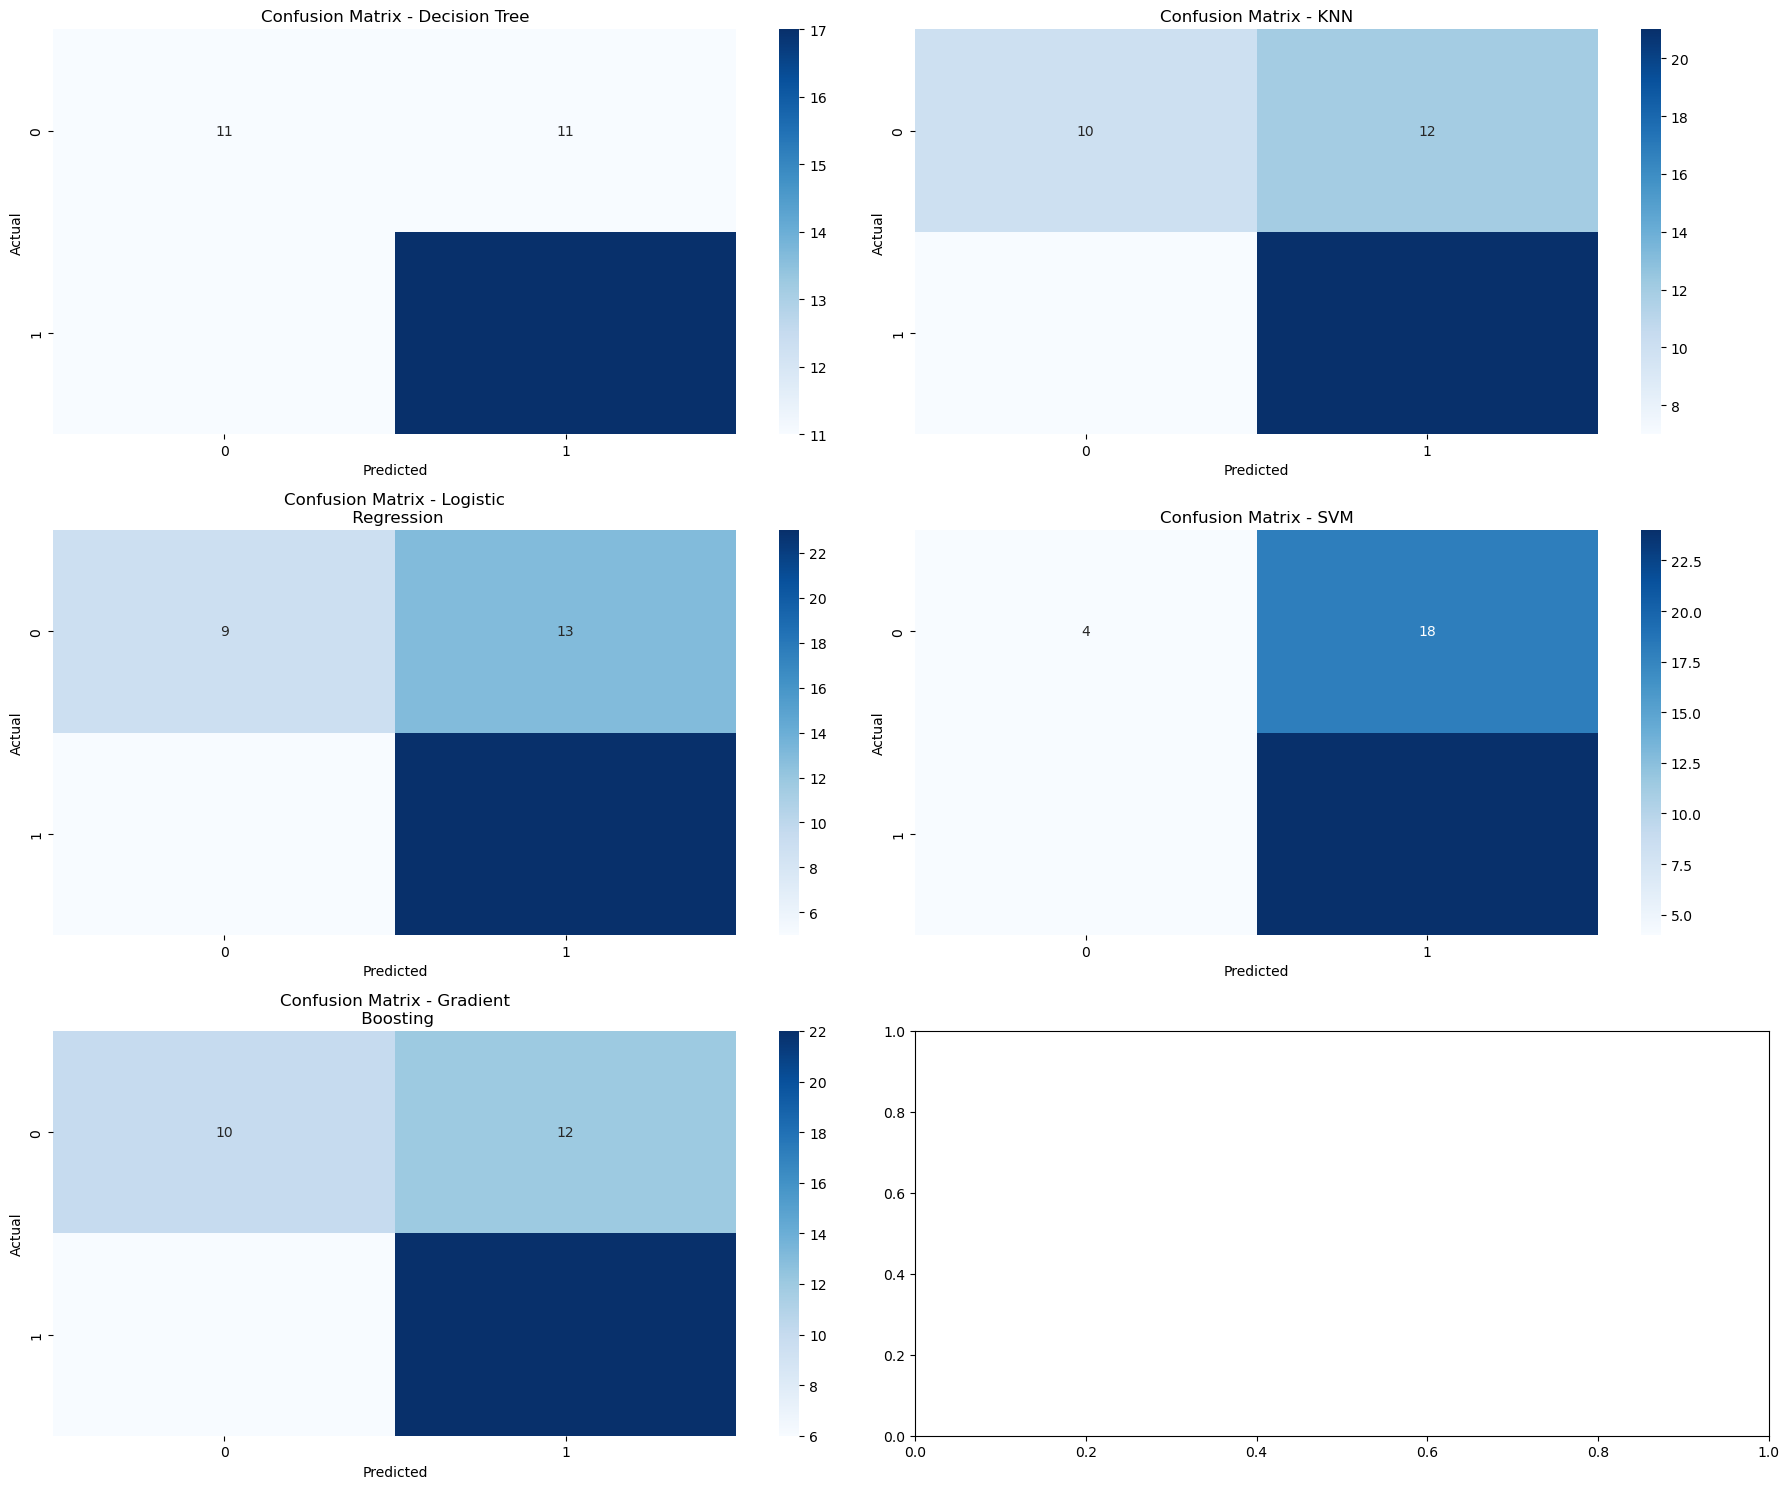

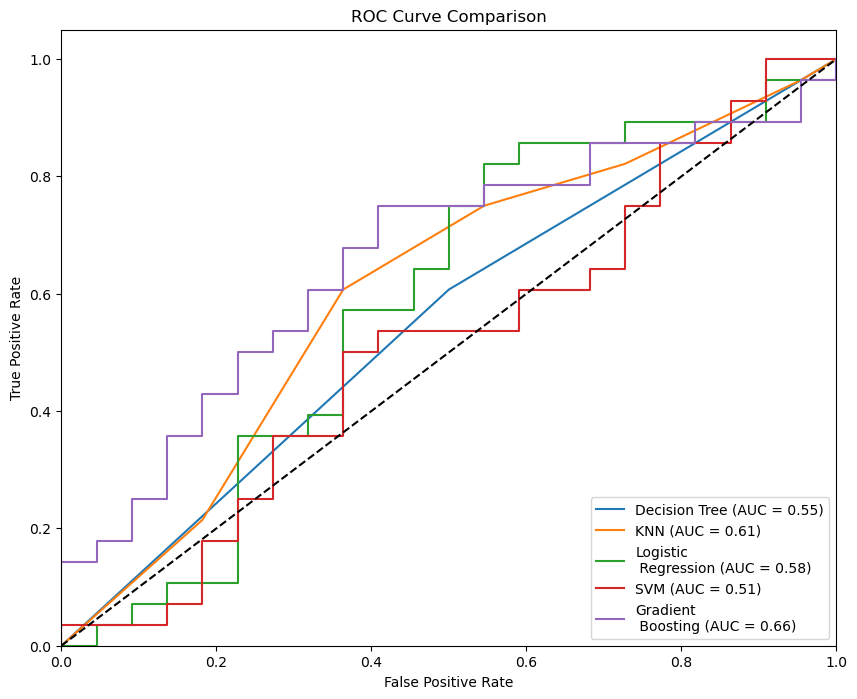

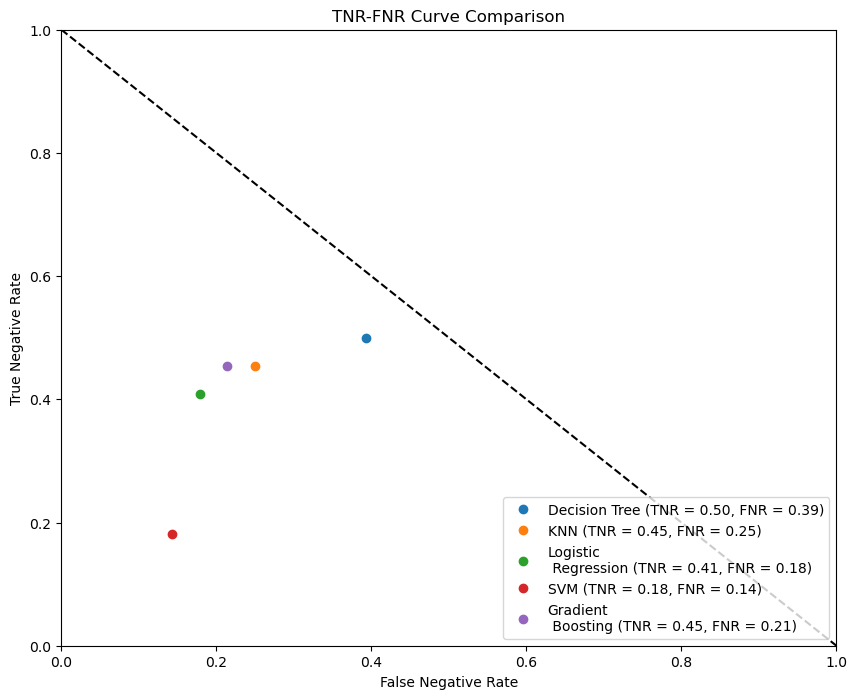

In [71]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

X = df[['Hemoglobin', 'Platelets', 'ALP', 'Iron', 'Creatinine']]
y = df['Class']

# Identificar colunas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Aplicar One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols)

# Dividir o dataset em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Garantir que os dados são contíguos em memória
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

# Criar os modelos
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic\n Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient\n Boosting': GradientBoostingClassifier(random_state=42),
}
# Treinar e avaliar os modelos
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob) if y_prob is not None else (None, None, None)
    roc_auc = auc(fpr, tpr) if y_prob is not None else None
    
    # Calculando TNR e FNR
    tn, fp, fn, tp = conf_matrix.ravel()
    tnr = tn / (tn + fp)  # True Negative Rate
    fnr = fn / (fn + tp)  # False Negative Rate
    
    # TNR-FNR curve
    tnr_fnr = (tnr, fnr)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'conf_matrix': conf_matrix,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'tnr_fnr': tnr_fnr,
    }

# Comparação de Acurácia
accuracy_data = {name: results[name]['accuracy'] for name in results.keys()}
accuracy_df = pd.DataFrame.from_dict(accuracy_data, orient='index', columns=['Accuracy'])
print(accuracy_df)

# Plotting accuracy
sns.barplot(x=accuracy_df.index, y='Accuracy', data=accuracy_df)
plt.title('Accuracy Comparison')
plt.show()

# Comparação do Relatório de Classificação
classification_reports = {name: pd.DataFrame(results[name]['report']).transpose() for name in results.keys()}

for name, report in classification_reports.items():
    print(f'Classification Report for {name}:\n', report)

# Matriz de Confusão
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['conf_matrix'], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC Curve e AUC
plt.figure(figsize=(10, 8))

for name, result in results.items():
    if result['roc_auc'] is not None:
        plt.plot(result['fpr'], result['tpr'], label=f'{name} (AUC = {result["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

# TNR-FNR Curve
plt.figure(figsize=(10, 8))

for name, result in results.items():
    tnr, fnr = result['tnr_fnr']
    plt.plot(fnr, tnr, 'o', label=f'{name} (TNR = {tnr:.2f}, FNR = {fnr:.2f})')

plt.plot([0, 1], [1, 0], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Negative Rate')
plt.ylabel('True Negative Rate')
plt.title('TNR-FNR Curve Comparison')
plt.legend(loc='lower right')
plt.show()


**Apenas com as 10 melhores variáveis, de acordo com o sistema de pontos:**

                       Accuracy
Decision Tree              0.54
KNN                        0.62
Logistic\n Regression      0.64
SVM                        0.56
Gradient\n Boosting        0.62


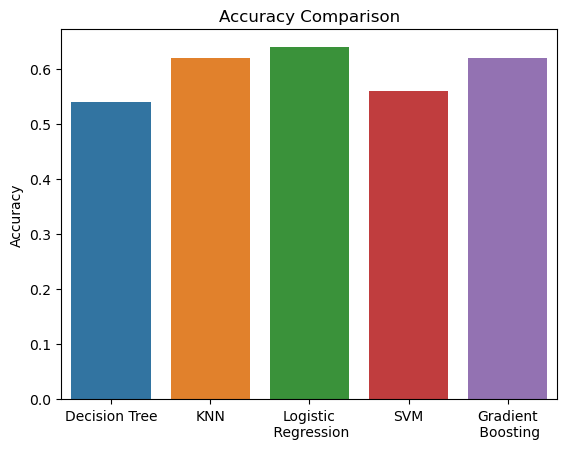

Classification Report for Decision Tree:
               precision    recall  f1-score  support
0              0.481481  0.590909  0.530612    22.00
1              0.608696  0.500000  0.549020    28.00
accuracy       0.540000  0.540000  0.540000     0.54
macro avg      0.545089  0.545455  0.539816    50.00
weighted avg   0.552721  0.540000  0.540920    50.00
Classification Report for KNN:
               precision    recall  f1-score  support
0              0.588235  0.454545  0.512821    22.00
1              0.636364  0.750000  0.688525    28.00
accuracy       0.620000  0.620000  0.620000     0.62
macro avg      0.612299  0.602273  0.600673    50.00
weighted avg   0.615187  0.620000  0.611215    50.00
Classification Report for Logistic
 Regression:
               precision    recall  f1-score  support
0              0.642857  0.409091  0.500000    22.00
1              0.638889  0.821429  0.718750    28.00
accuracy       0.640000  0.640000  0.640000     0.64
macro avg      0.640873  0.61

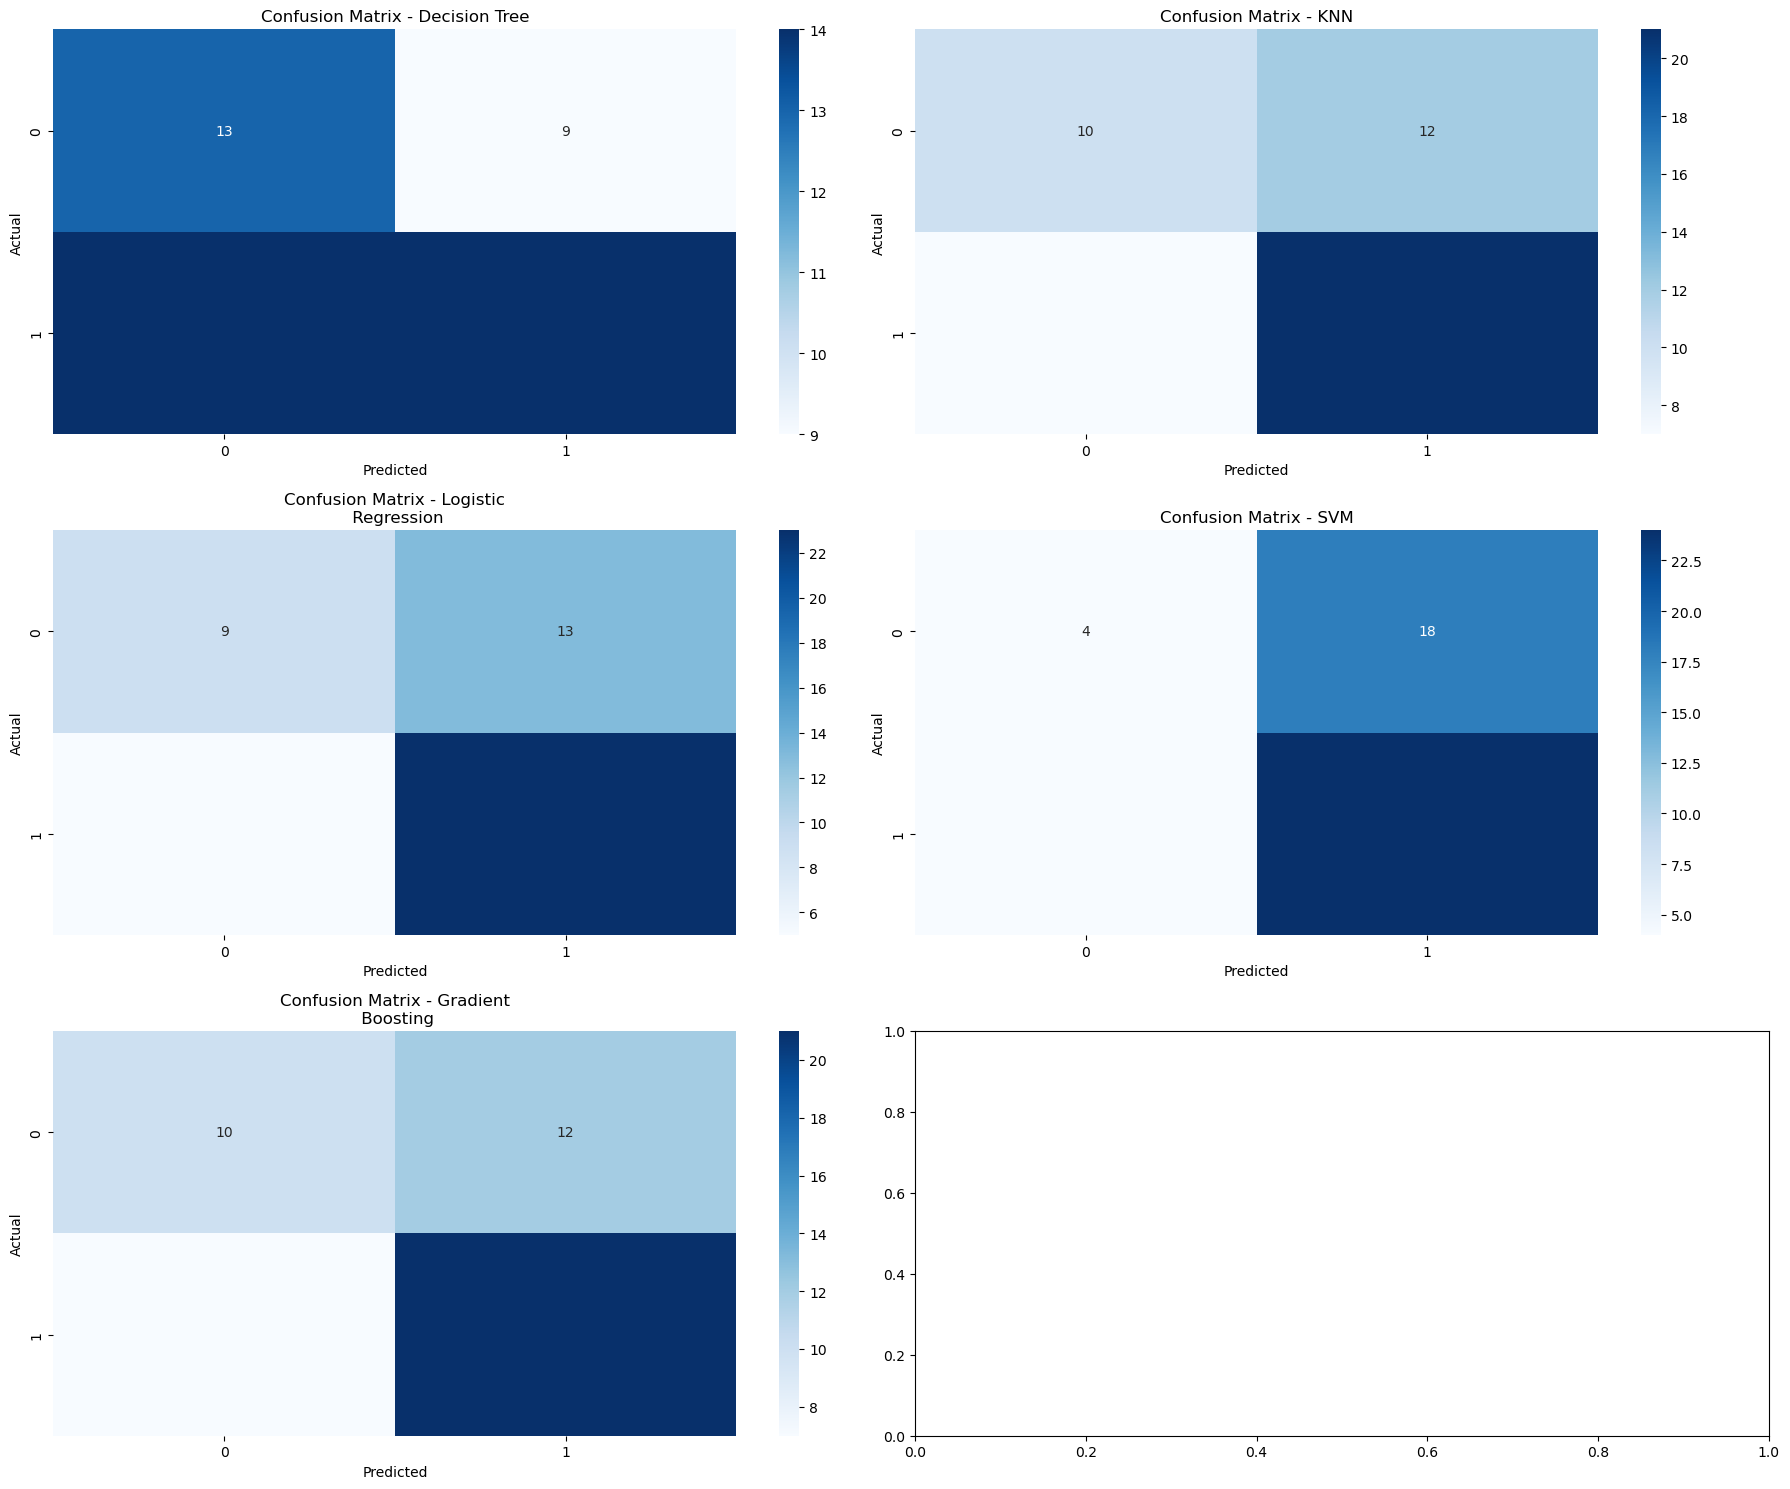

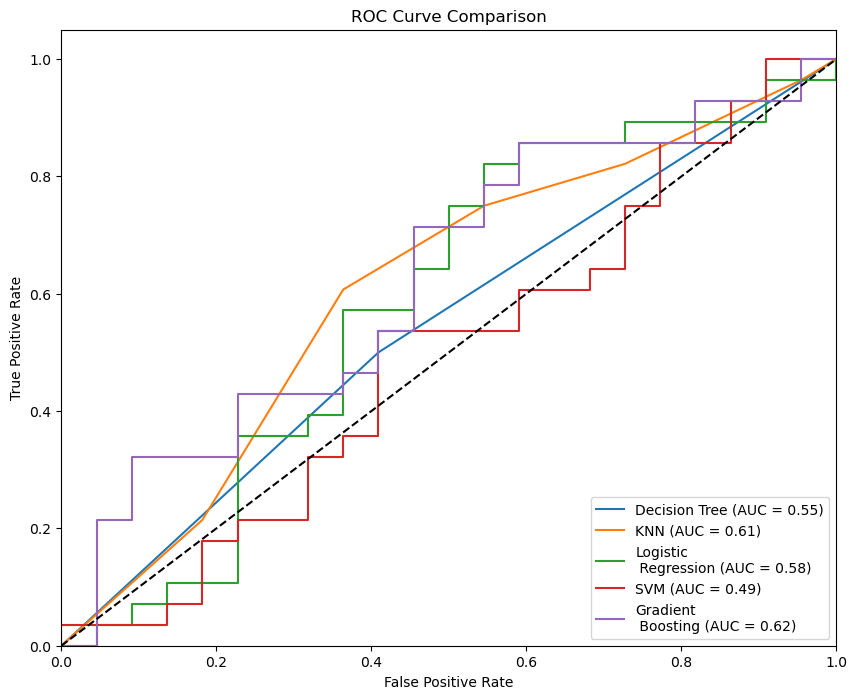

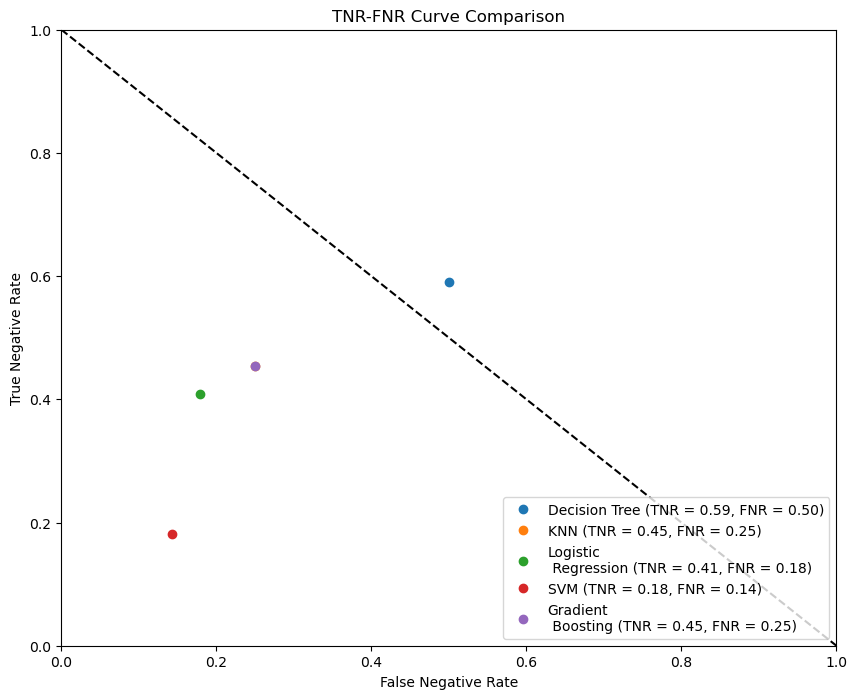

In [72]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

X = df[['Hemoglobin', 'Platelets', 'ALP', 'Iron', 'Creatinine', 'PVT', ' Albumin', 'Ascites', 'Symptoms', 'Diabetes']]
y = df['Class']

categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Aplicar One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols)

# Dividir o dataset em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Garantir que os dados são contíguos em memória
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

# Criar os modelos
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic\n Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient\n Boosting': GradientBoostingClassifier(random_state=42),
}
# Treinar e avaliar os modelos
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob) if y_prob is not None else (None, None, None)
    roc_auc = auc(fpr, tpr) if y_prob is not None else None
    
    # Calculando TNR e FNR
    tn, fp, fn, tp = conf_matrix.ravel()
    tnr = tn / (tn + fp)  # True Negative Rate
    fnr = fn / (fn + tp)  # False Negative Rate
    
    # TNR-FNR curve
    tnr_fnr = (tnr, fnr)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'conf_matrix': conf_matrix,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'tnr_fnr': tnr_fnr,
    }

# Comparação de Acurácia
accuracy_data = {name: results[name]['accuracy'] for name in results.keys()}
accuracy_df = pd.DataFrame.from_dict(accuracy_data, orient='index', columns=['Accuracy'])
print(accuracy_df)

# Plotting accuracy
sns.barplot(x=accuracy_df.index, y='Accuracy', data=accuracy_df)
plt.title('Accuracy Comparison')
plt.show()

# Comparação do Relatório de Classificação
classification_reports = {name: pd.DataFrame(results[name]['report']).transpose() for name in results.keys()}

for name, report in classification_reports.items():
    print(f'Classification Report for {name}:\n', report)

# Matriz de Confusão
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['conf_matrix'], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC Curve e AUC
plt.figure(figsize=(10, 8))

for name, result in results.items():
    if result['roc_auc'] is not None:
        plt.plot(result['fpr'], result['tpr'], label=f'{name} (AUC = {result["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

# TNR-FNR Curve
plt.figure(figsize=(10, 8))

for name, result in results.items():
    tnr, fnr = result['tnr_fnr']
    plt.plot(fnr, tnr, 'o', label=f'{name} (TNR = {tnr:.2f}, FNR = {fnr:.2f})')

plt.plot([0, 1], [1, 0], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Negative Rate')
plt.ylabel('True Negative Rate')
plt.title('TNR-FNR Curve Comparison')
plt.legend(loc='lower right')
plt.show()

**Apenas com as variáveis eliminadas, a partir da leitura dos gráficos:**

/home/carolina/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/carolina/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/carolina/anaconda3/envs/datascience/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: Und

                       Accuracy
Decision Tree              0.54
KNN                        0.56
Logistic\n Regression      0.64
SVM                        0.56
Gradient\n Boosting        0.54


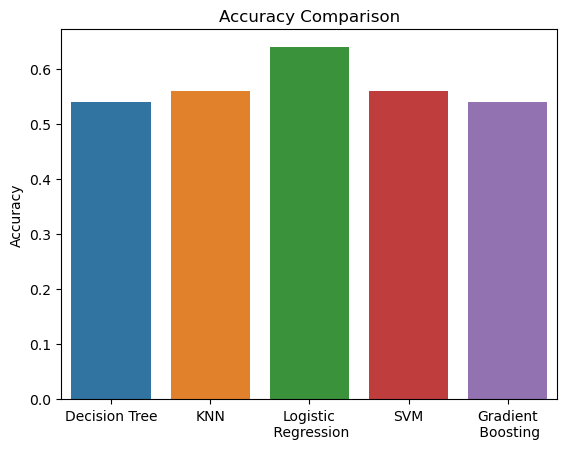

Classification Report for Decision Tree:
               precision    recall  f1-score  support
0              0.454545  0.227273  0.303030    22.00
1              0.564103  0.785714  0.656716    28.00
accuracy       0.540000  0.540000  0.540000     0.54
macro avg      0.509324  0.506494  0.479873    50.00
weighted avg   0.515897  0.540000  0.501095    50.00
Classification Report for KNN:
               precision    recall  f1-score  support
0                0.5000  0.227273  0.312500    22.00
1                0.5750  0.821429  0.676471    28.00
accuracy         0.5600  0.560000  0.560000     0.56
macro avg        0.5375  0.524351  0.494485    50.00
weighted avg     0.5420  0.560000  0.516324    50.00
Classification Report for Logistic
 Regression:
               precision    recall  f1-score  support
0                0.7000  0.318182  0.437500    22.00
1                0.6250  0.892857  0.735294    28.00
accuracy         0.6400  0.640000  0.640000     0.64
macro avg        0.6625  0.60

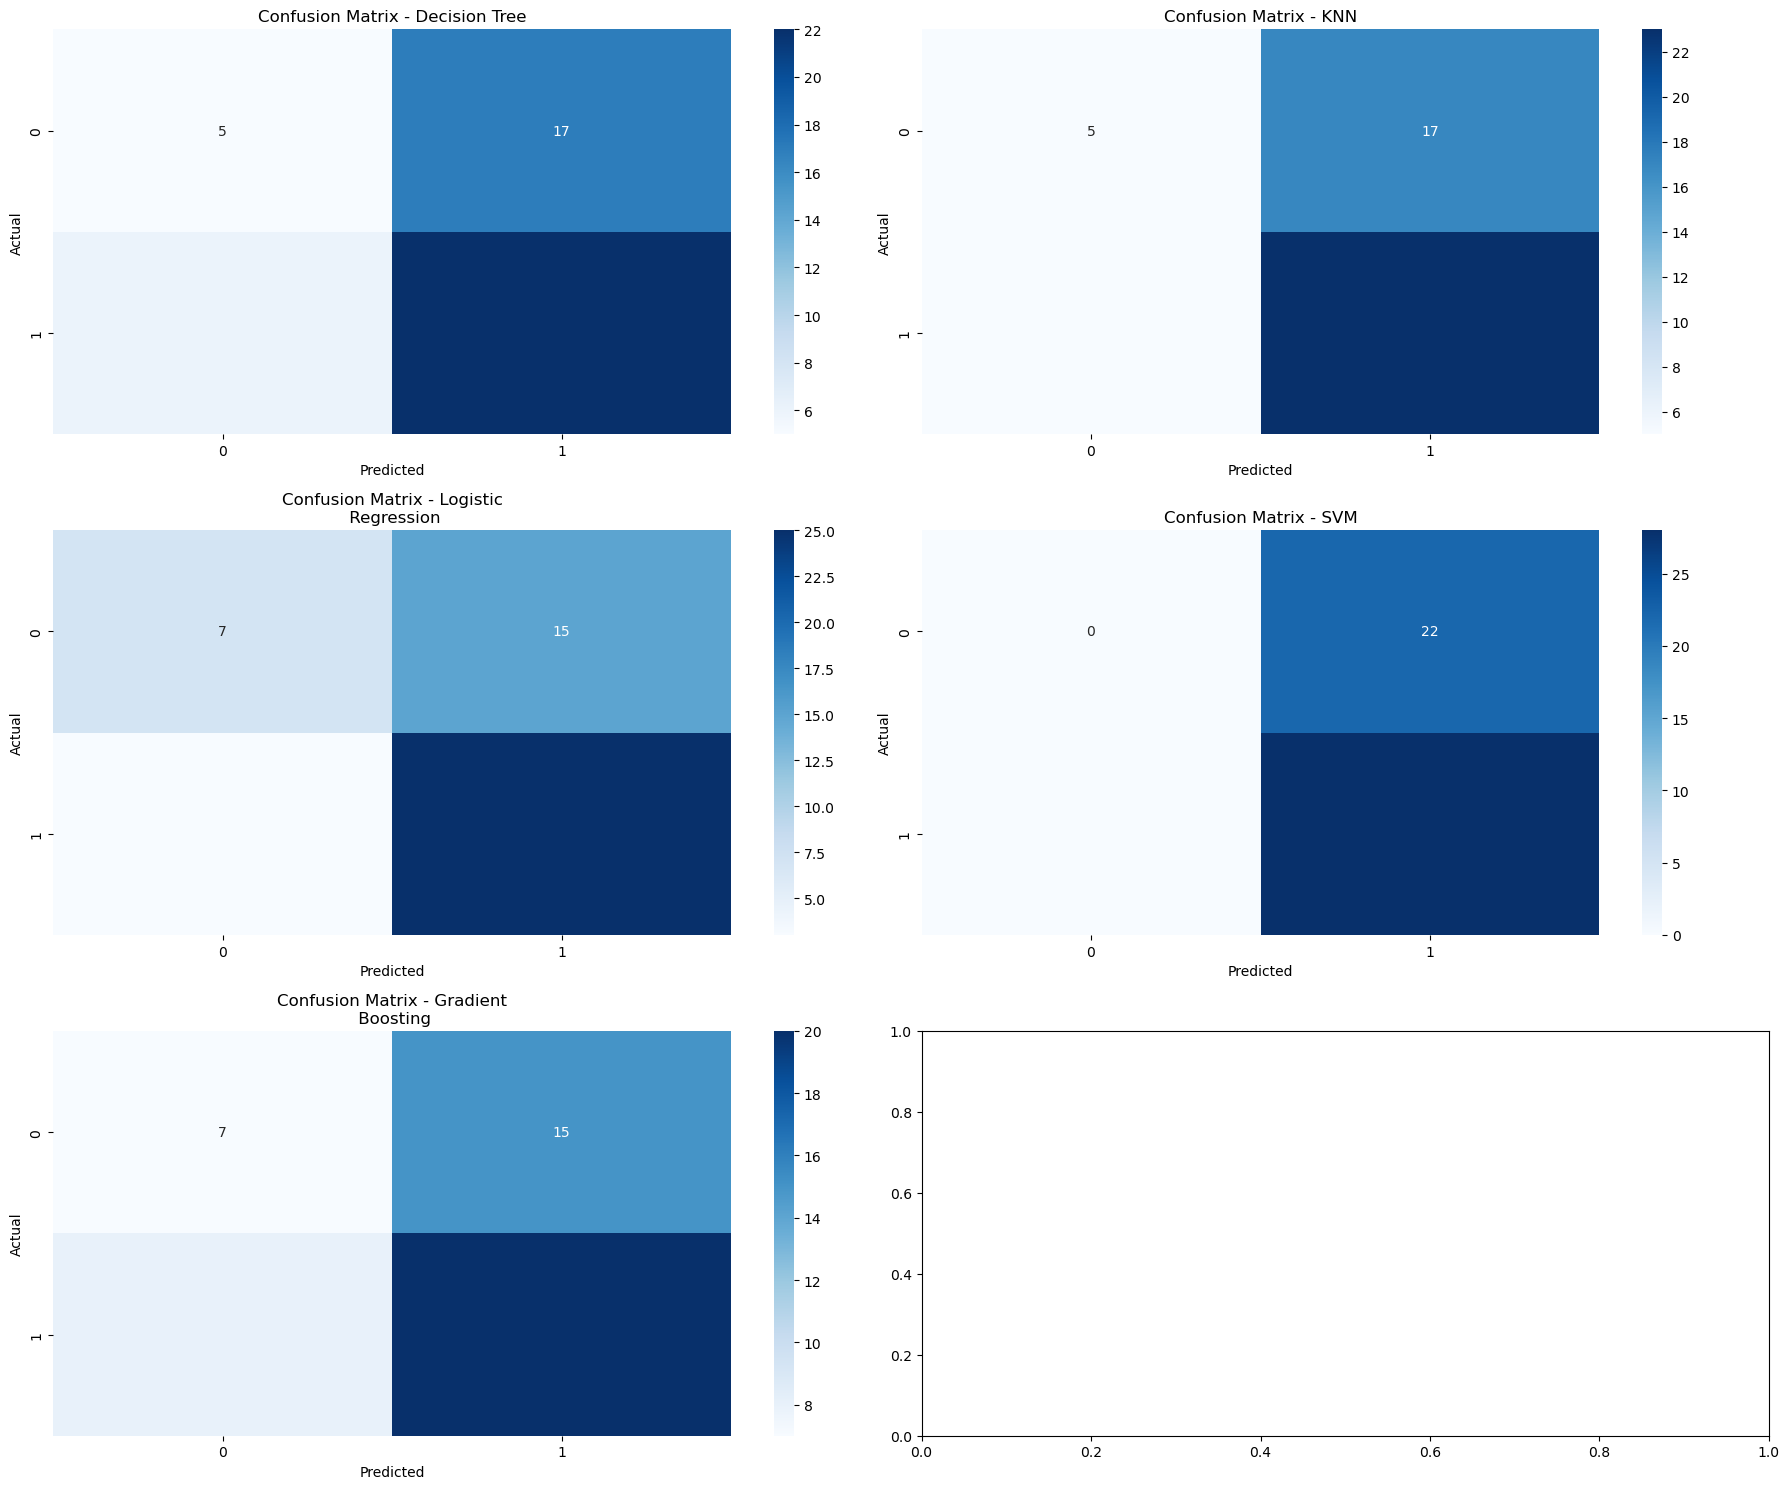

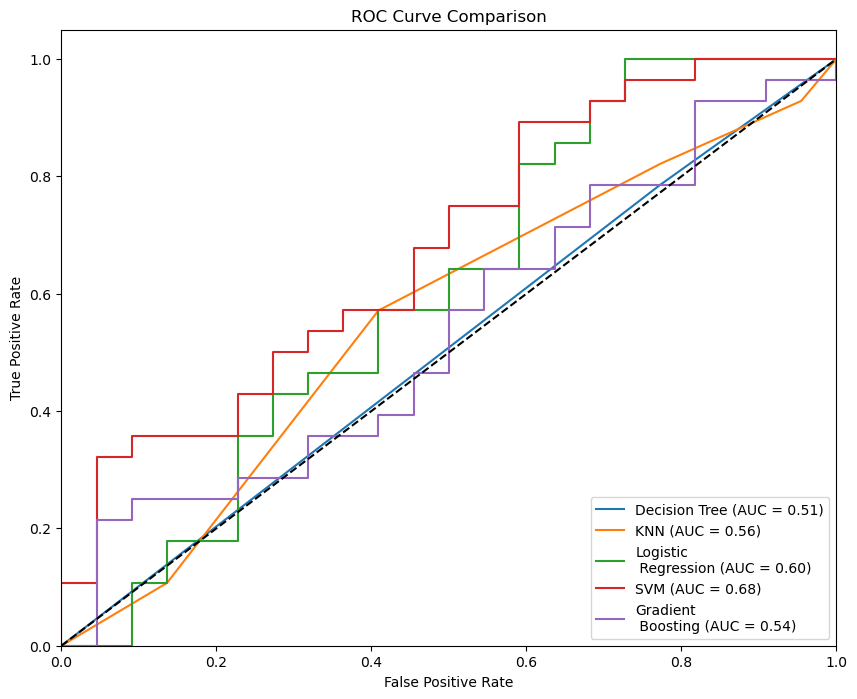

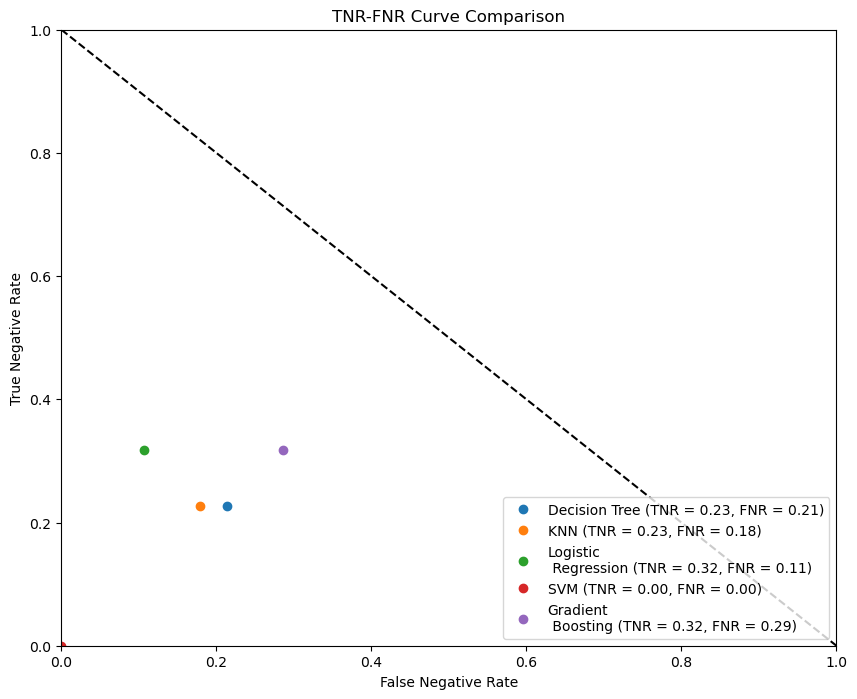

In [73]:


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

X = df[['Symptoms', 'Diabetes', 'HBeAg', 'HIV', 'Endemic', 'Hemochro', 'HCVAb', 'NASH', 'Grams_day', 'INR', 'Total_Bil', 'TP']]
y = df['Class']

# Identificar colunas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Aplicar One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols)

# Dividir o dataset em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Garantir que os dados são contíguos em memória
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

# Criar os modelos
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic\n Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient\n Boosting': GradientBoostingClassifier(random_state=42),
}
# Treinar e avaliar os modelos
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob) if y_prob is not None else (None, None, None)
    roc_auc = auc(fpr, tpr) if y_prob is not None else None
    
    # Calculando TNR e FNR
    tn, fp, fn, tp = conf_matrix.ravel()
    tnr = tn / (tn + fp)  # True Negative Rate
    fnr = fn / (fn + tp)  # False Negative Rate
    
    # TNR-FNR curve
    tnr_fnr = (tnr, fnr)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'conf_matrix': conf_matrix,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'tnr_fnr': tnr_fnr,
    }

# Comparação de Acurácia
accuracy_data = {name: results[name]['accuracy'] for name in results.keys()}
accuracy_df = pd.DataFrame.from_dict(accuracy_data, orient='index', columns=['Accuracy'])
print(accuracy_df)

# Plotting accuracy
sns.barplot(x=accuracy_df.index, y='Accuracy', data=accuracy_df)
plt.title('Accuracy Comparison')
plt.show()

# Comparação do Relatório de Classificação
classification_reports = {name: pd.DataFrame(results[name]['report']).transpose() for name in results.keys()}

for name, report in classification_reports.items():
    print(f'Classification Report for {name}:\n', report)

# Matriz de Confusão
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['conf_matrix'], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC Curve e AUC
plt.figure(figsize=(10, 8))

for name, result in results.items():
    if result['roc_auc'] is not None:
        plt.plot(result['fpr'], result['tpr'], label=f'{name} (AUC = {result["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

# TNR-FNR Curve
plt.figure(figsize=(10, 8))

for name, result in results.items():
    tnr, fnr = result['tnr_fnr']
    plt.plot(fnr, tnr, 'o', label=f'{name} (TNR = {tnr:.2f}, FNR = {fnr:.2f})')

plt.plot([0, 1], [1, 0], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Negative Rate')
plt.ylabel('True Negative Rate')
plt.title('TNR-FNR Curve Comparison')
plt.legend(loc='lower right')
plt.show()
